In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import mplcyberpunk
from matplotlib.patches import Patch
import matplotlib.offsetbox as offsetbox

In [3]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Amateur/FinalAmateurPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

gameId  team       summoner region champion  timestamp  \
0       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   0.000000   
1       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   1.000200   
2       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   0.495733   
3       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   2.000517   
4       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   1.979017   
...                 ...   ...            ...    ...      ...        ...   
838676  EUW1_6283483863   Red   anonymous 56   euw1    Annie  17.139450   
838677  EUW1_6283483863   Red   anonymous 56   euw1    Annie  22.688683   
838678  EUW1_6283483863   Red   anonymous 56   euw1    Annie  22.826867   
838679  EUW1_6283483863   Red   anonymous 56   euw1    Annie  25.901700   
838680  EUW1_6283483863   Red   anonymous 56   euw1    Annie  27.683317   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
0              329.0         650.0    1.0            0.0  ...   
1             6569.0       11391.0    1.0            0.0  ...   
2                NaN           NaN    NaN            NaN  ...   
3             4320.0       12059.0    1.0            0.0  ...   
4             4245.0       13217.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
838676           NaN           NaN    NaN            NaN  ...   
838677           NaN           NaN    NaN            NaN  ...   
838678           NaN           NaN    NaN            NaN  ...   
838679           NaN           NaN    NaN            NaN  ...   
838680           NaN           NaN    NaN            NaN  ...   

        trueDamageTaken  victory       eventType  skillSlot  buildingType  \
0                   0.0    False             NaN        NaN           NaN   
1                   0.0    False             NaN        NaN           NaN   
2                   NaN    False    SkillLevelUp        1.0           NaN   
3                   0.0    False             NaN        NaN           NaN   
4                   NaN    False          Assist        NaN           NaN   
...                 ...      ...             ...        ...           ...   
838676              NaN    False  Item purchased        NaN           NaN   
838677              NaN    False  Item purchased        NaN           NaN   
838678              NaN    False  Item purchased        NaN           NaN   
838679              NaN    False  Item purchased        NaN           NaN   
838680              NaN    False  Item purchased        NaN           NaN   

        lane  monster            itemName     role      rank  
0        NaN      NaN                 NaN  UTILITY  Platinum  
1        NaN      NaN                 NaN  UTILITY  Platinum  
2        NaN      NaN                 NaN  UTILITY  Platinum  
3        NaN      NaN                 NaN  UTILITY  Platinum  
4        NaN      NaN                 NaN  UTILITY  Platinum  
...      ...      ...                 ...      ...       ...  
838676   NaN      NaN           Kindlegem  UTILITY      Gold  
838677   NaN      NaN        Knight's Vow  UTILITY      Gold  
838678   NaN      NaN     Glacial Buckler  UTILITY      Gold  
838679   NaN      NaN           Kindlegem  UTILITY      Gold  
838680   NaN      NaN  Zeke's Convergence  UTILITY      Gold  

[838681 rows x 56 columns]

In [4]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]
jungler_deaths_df

gameId  team       summoner region    champion  timestamp  \
2889    EUW1_6274465314   Red  anonymous 129   euw1      Maokai  11.513217   
2920    EUW1_6274421335   Red  anonymous 129   euw1  MonkeyKing   8.982983   
2934    EUW1_6274421335   Red  anonymous 129   euw1  MonkeyKing  16.199850   
2940    EUW1_6274421335   Red  anonymous 129   euw1  MonkeyKing  19.408433   
2945    EUW1_6274421335   Red  anonymous 129   euw1  MonkeyKing  20.767800   
...                 ...   ...            ...    ...         ...        ...   
642404  EUW1_6289301059  Blue  anonymous 165   euw1        Ekko  16.234150   
642412  EUW1_6289301059  Blue  anonymous 165   euw1        Ekko  19.922367   
642417  EUW1_6289301059  Blue  anonymous 165   euw1        Ekko  21.353700   
642426  EUW1_6289301059  Blue  anonymous 165   euw1        Ekko  23.927567   
642948  EUW1_6289397856   Red  anonymous 172   euw1        Ekko  11.346367   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
2889          6641.0        7209.0    NaN            NaN  ...   
2920          7920.0        7566.0    NaN            NaN  ...   
2934          7563.0       14015.0    NaN            NaN  ...   
2940          9840.0        5767.0    NaN            NaN  ...   
2945          9324.0        3640.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642404        1901.0       12644.0    NaN            NaN  ...   
642412       12026.0       10604.0    NaN            NaN  ...   
642417        7798.0       11952.0    NaN            NaN  ...   
642426       13506.0       13848.0    NaN            NaN  ...   
642948        5424.0       10756.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
2889                NaN    False      Death        NaN           NaN   NaN   
2920                NaN    False      Death        NaN           NaN   NaN   
2934                NaN    False      Death        NaN           NaN   NaN   
2940                NaN    False      Death        NaN           NaN   NaN   
2945                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642404              NaN     True      Death        NaN           NaN   NaN   
642412              NaN     True      Death        NaN           NaN   NaN   
642417              NaN     True      Death        NaN           NaN   NaN   
642426              NaN     True      Death        NaN           NaN   NaN   
642948              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
2889        NaN       NaN  JUNGLE      Gold  
2920        NaN       NaN  JUNGLE      Gold  
2934        NaN       NaN  JUNGLE      Gold  
2940        NaN       NaN  JUNGLE      Gold  
2945        NaN       NaN  JUNGLE      Gold  
...         ...       ...     ...       ...  
642404      NaN       NaN  JUNGLE  Platinum  
642412      NaN       NaN  JUNGLE  Platinum  
642417      NaN       NaN  JUNGLE  Platinum  
642426      NaN       NaN  JUNGLE  Platinum  
642948      NaN       NaN  JUNGLE      Gold  

[11955 rows x 56 columns]

In [5]:
print("This dataset contains {} matches in which the jungler died at least once".format(len(np.unique(jungler_deaths_df["gameId"]))))

This dataset contains 1814 matches in which the jungler died at least once


In [6]:
print("{} players died a total of {} times".format(len(np.unique(jungler_deaths_df["summoner"])), jungler_deaths_df.shape[0]))

34 players died a total of 11955 times


In [7]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

This Dataset contains an average of 6.590407938257993 deaths per game


Champions' winrates

In [8]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["victory"] == True)].copy()

In [9]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [10]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["victory"] == False)].copy()

In [11]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]
    champsWinrates_row["image"] = "/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/images/" + str(row[0]) + "_0.jpg"

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates)
#champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df = champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)
champsWinrates_df

champion  win rate  matches  \
4           Udyr      0.54    221.0   
8           Ekko      0.55    116.0   
11       Belveth      0.55     99.0   
5           Nunu      0.47     85.0   
17         Sylas      0.42     83.0   
21         Diana      0.52     81.0   
10          Kayn      0.57     74.0   
14      MasterYi      0.56     71.0   
6        Sejuani      0.48     67.0   
1         Rengar      0.43     63.0   
25      JarvanIV      0.44     62.0   
7         Maokai      0.47     58.0   
28      Nocturne      0.54     56.0   
16         Viego      0.59     54.0   
13        Lillia      0.58     53.0   
2         LeeSin      0.47     51.0   
22       Warwick      0.60     48.0   
9     MonkeyKing      0.55     47.0   
15           Jax      0.45     44.0   
3          Amumu      0.49     43.0   
0         Singed      0.49     39.0   
12       Shyvana      0.39     36.0   
43        Rammus      0.50     30.0   
23            Vi      0.50     24.0   
35        RekSai      0.42     24.0   
20         Elise      0.43     23.0   
27       Hecarim      0.41     17.0   
34       Evelynn      0.44     16.0   
37           Zac      0.38     16.0   
31  FiddleSticks      0.36     14.0   
38       XinZhao      0.50     12.0   
42       Kindred      0.33      9.0   
33      Volibear      0.12      8.0   
19         Jayce      0.29      7.0   
40   Mordekaiser      0.50      6.0   
45        Khazix      0.17      6.0   
46        Gragas      0.17      6.0   
32       Skarner      0.75      4.0   
36       Trundle      0.25      4.0   
41         Poppy      0.25      4.0   
50         Shaco      0.00      4.0   
18   AurelionSol      1.00      3.0   
44           Zed      0.67      3.0   
48       Nidalee      0.33      3.0   
26        Graves      0.50      2.0   
30         Ivern      0.50      2.0   
39         Talon      0.50      2.0   
55       Taliyah      0.00      2.0   
56      Nautilus      0.00      2.0   
24         Teemo      1.00      1.0   
29          Sion      1.00      1.0   
47       Morgana      1.00      1.0   
49          Zeri      1.00      1.0   
51         Kaisa      0.00      1.0   
52       DrMundo      0.00      1.0   
53      Malphite      0.00      1.0   
54    Tryndamere      0.00      1.0   
57      Kassadin      0.00      1.0   
58         Garen      0.00      1.0   

                                                image  
4   /home/bambito9/Esports-Data-Analysis/API Reque...  
8   /home/bambito9/Esports-Data-Analysis/API Reque...  
11  /home/bambito9/Esports-Data-Analysis/API Reque...  
5   /home/bambito9/Esports-Data-Analysis/API Reque...  
17  /home/bambito9/Esports-Data-Analysis/API Reque...  
21  /home/bambito9/Esports-Data-Analysis/API Reque...  
10  /home/bambito9/Esports-Data-Analysis/API Reque...  
14  /home/bambito9/Esports-Data-Analysis/API Reque...  
6   /home/bambito9/Esports-Data-Analysis/API Reque...  
1   /home/bambito9/Esports-Data-Analysis/API Reque...  
25  /home/bambito9/Esports-Data-Analysis/API Reque...  
7   /home/bambito9/Esports-Data-Analysis/API Reque...  
28  /home/bambito9/Esports-Data-Analysis/API Reque...  
16  /home/bambito9/Esports-Data-Analysis/API Reque...  
13  /home/bambito9/Esports-Data-Analysis/API Reque...  
2   /home/bambito9/Esports-Data-Analysis/API Reque...  
22  /home/bambito9/Esports-Data-Analysis/API Reque...  
9   /home/bambito9/Esports-Data-Analysis/API Reque...  
15  /home/bambito9/Esports-Data-Analysis/API Reque...  
3   /home/bambito9/Esports-Data-Analysis/API Reque...  
0   /home/bambito9/Esports-Data-Analysis/API Reque...  
12  /home/bambito9/Esports-Data-Analysis/API Reque...  
43  /home/bambito9/Esports-Data-Analysis/API Reque...  
23  /home/bambito9/Esports-Data-Analysis/API Reque...  
35  /home/bambito9/Esports-Data-Analysis/API Reque...  
20  /home/bambito9/Esports-Data-Analysis/API Reque...  
27  /home/bambito9/Esports-Data-Analysis/API Reque...  
34  /home/bambito9/Esports-Data-Analysis/API Reque...  
37  /home/bambito9/Esports-Data-Analysis/AP

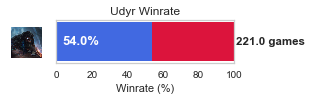

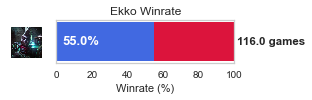

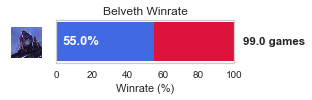

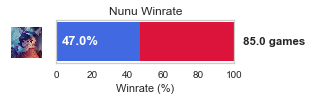

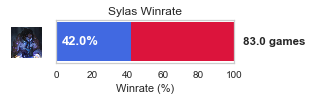

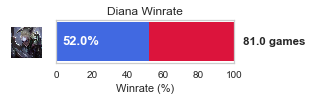

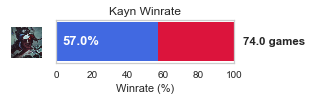

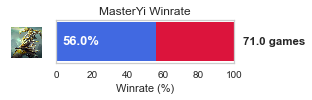

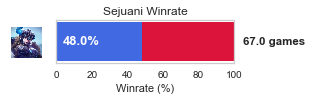

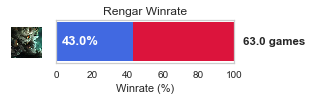

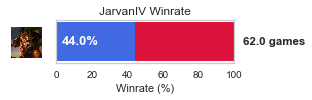

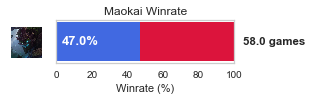

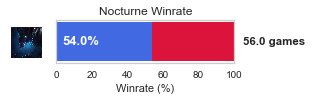

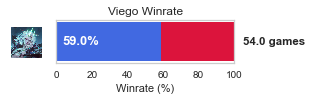

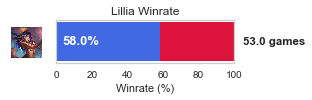

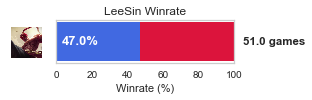

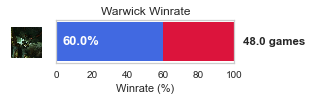

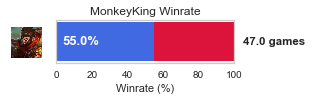

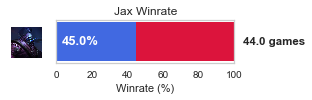

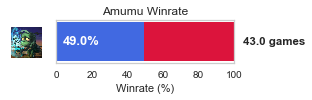

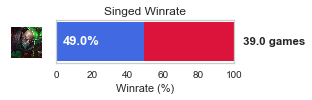

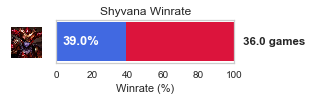

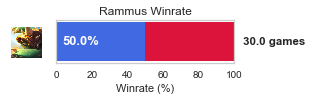

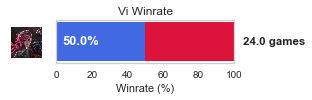

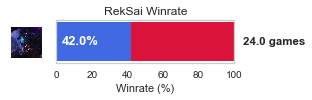

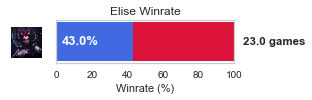

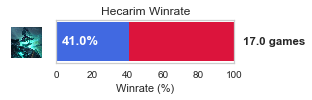

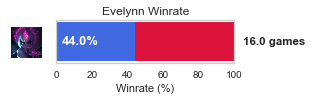

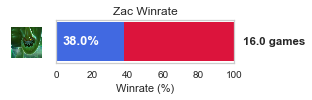

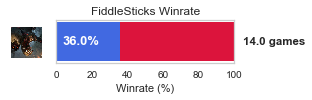

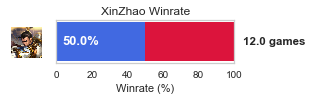

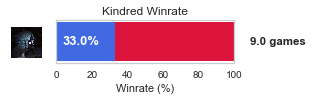

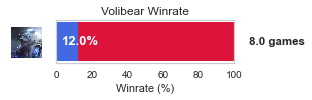

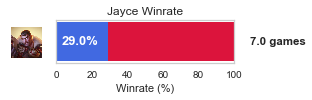

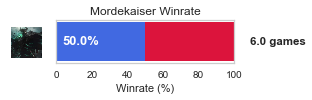

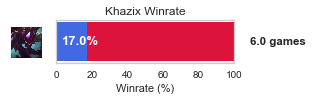

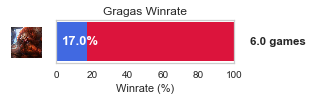

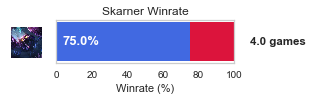

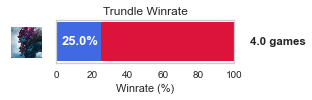

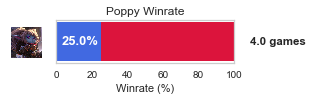

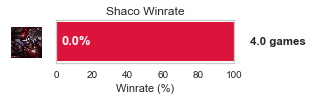

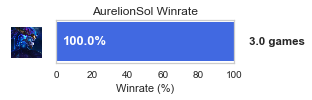

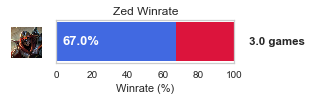

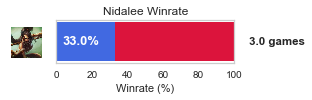

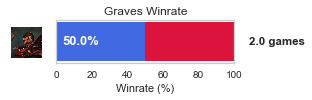

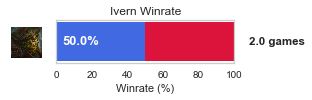

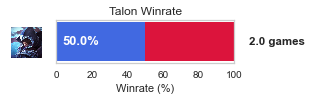

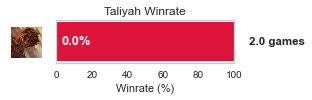

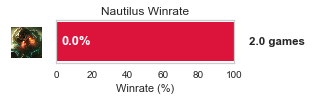

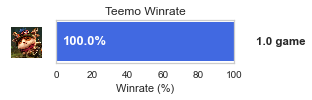

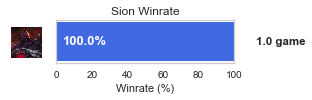

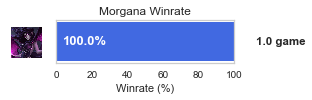

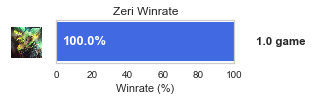

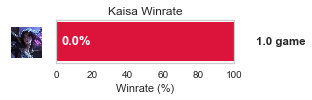

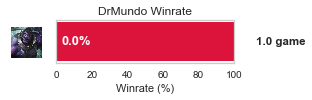

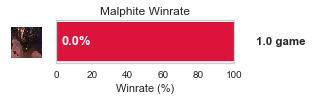

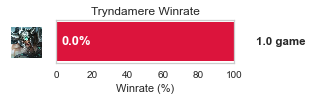

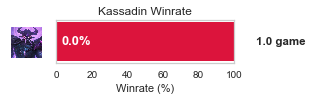

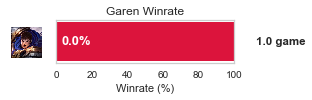

In [12]:
# Create a separate plot for each champion
for champion_name, winrate, champion_image, games_played in zip(champsWinrates_df["champion"], champsWinrates_df["win rate"], champsWinrates_df["image"], champsWinrates_df["matches"]):
    fig, ax = plt.subplots(figsize=(5, 1.5))

    # Adding the second color until the limit of x-axis (100)
    ax.barh([champion_name], [100], left=[winrate], color="crimson")

    # Plotting the winrate data
    ax.barh([champion_name], [winrate*100], color = "royalblue")


    # Set x-axis limits
    ax.set_xlim(0, 100)

    # Adding champion image to the y-axis tick label
    imagebox = offsetbox.OffsetImage(plt.imread(champion_image), zoom=0.08)  # Adjust the zoom value for image size
    #ab = offsetbox.AnnotationBbox(imagebox, (0, 0), frameon=False)
    ab = offsetbox.AnnotationBbox(imagebox, (-30, 20),xycoords='axes points', frameon=False)

    
    ax.add_artist(ab)

    # Set y-axis tick labels to champion name
    ax.set_yticks([])

    # Increase spacing between y-axis tick labels
    #ax.yaxis.set_tick_params(pad=50, labelsize=8)  # Adjust the pad and labelsize values


    # Set plot title and labels
    plt.title(f"{champion_name} Winrate")
    plt.xlabel("Winrate (%)")
    plt.ylabel("")

    # Add winrate value as annotation on the bar
    ax.annotate(f'{winrate*100:.1f}%', xy=(winrate, 0), xytext=(5, 0), textcoords='offset points', va='center', color = "white", fontweight = "bold", fontsize = 13)

    if(games_played > 1):
        # Add number of games played to the right of the plot
        ax.text(140, 0, f'{games_played} games', ha='right', va='center', fontweight = "bold", fontsize = 11.5)
    else:
        # Add number of games played to the right of the plot
        ax.text(140, 0, f'{games_played} game', ha='right', va='center', fontweight = "bold", fontsize = 11.5)

    # Remove the grid
    ax.grid(False)

    # Display the plot
    plt.tight_layout()
    plt.show()

In [13]:
blueSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
blueSide_jungler_deaths_df

gameId  team       summoner region champion  timestamp  \
3383    EUW1_6272896782  Blue  anonymous 129   euw1   LeeSin   6.302467   
3396    EUW1_6272896782  Blue  anonymous 129   euw1   LeeSin  13.837467   
3406    EUW1_6272896782  Blue  anonymous 129   euw1   LeeSin  18.453517   
3417    EUW1_6272896782  Blue  anonymous 129   euw1   LeeSin  22.972600   
3425    EUW1_6272896782  Blue  anonymous 129   euw1   LeeSin  26.447450   
...                 ...   ...            ...    ...      ...        ...   
642390  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko   9.020917   
642404  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  16.234150   
642412  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  19.922367   
642417  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  21.353700   
642426  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  23.927567   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
3383          7678.0        7550.0    NaN            NaN  ...   
3396          4684.0        8960.0    NaN            NaN  ...   
3406          7188.0       11508.0    NaN            NaN  ...   
3417          6200.0       10302.0    NaN            NaN  ...   
3425          7050.0        3032.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642390       13136.0        1998.0    NaN            NaN  ...   
642404        1901.0       12644.0    NaN            NaN  ...   
642412       12026.0       10604.0    NaN            NaN  ...   
642417        7798.0       11952.0    NaN            NaN  ...   
642426       13506.0       13848.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
3383                NaN    False      Death        NaN           NaN   NaN   
3396                NaN    False      Death        NaN           NaN   NaN   
3406                NaN    False      Death        NaN           NaN   NaN   
3417                NaN    False      Death        NaN           NaN   NaN   
3425                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642390              NaN     True      Death        NaN           NaN   NaN   
642404              NaN     True      Death        NaN           NaN   NaN   
642412              NaN     True      Death        NaN           NaN   NaN   
642417              NaN     True      Death        NaN           NaN   NaN   
642426              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
3383        NaN       NaN  JUNGLE      Gold  
3396        NaN       NaN  JUNGLE      Gold  
3406        NaN       NaN  JUNGLE      Gold  
3417        NaN       NaN  JUNGLE      Gold  
3425        NaN       NaN  JUNGLE      Gold  
...         ...       ...     ...       ...  
642390      NaN       NaN  JUNGLE  Platinum  
642404      NaN       NaN  JUNGLE  Platinum  
642412      NaN       NaN  JUNGLE  Platinum  
642417      NaN       NaN  JUNGLE  Platinum  
642426      NaN       NaN  JUNGLE  Platinum  

[5691 rows x 56 columns]

In [14]:
gamesBlueSide = len(np.unique(blueSide_jungler_deaths_df["gameId"]))
gamesBlueSide

874

In [15]:
players_df = np.unique(blueSide_jungler_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_jungler_deaths_df[blueSide_jungler_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 106 played 39 matches
anonymous 114 played 18 matches
anonymous 115 played 28 matches
anonymous 118 played 13 matches
anonymous 129 played 9 matches
anonymous 141 played 14 matches
anonymous 15 played 22 matches
anonymous 153 played 10 matches
anonymous 161 played 33 matches
anonymous 165 played 31 matches
anonymous 172 played 35 matches
anonymous 173 played 23 matches
anonymous 179 played 13 matches
anonymous 2 played 18 matches
anonymous 21 played 22 matches
anonymous 22 played 31 matches
anonymous 29 played 27 matches
anonymous 3 played 9 matches
anonymous 34 played 39 matches
anonymous 36 played 14 matches
anonymous 37 played 23 matches
anonymous 44 played 26 matches
anonymous 65 played 23 matches
anonymous 66 played 44 matches
anonymous 68 played 31 matches
anonymous 71 played 23 matches
anonymous 78 played 37 matches
anonymous 79 played 25 matches
anonymous 8 played 41 matches
anonymous 81 played 38 matches
anonymous 90 played 24 matches
anonymous 93 played 34 matches
a

In [16]:
print("Blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSide_jungler_deaths_df["gameId"]))))

Blue side contains 874 matches in which the jungler died at least once


In [17]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_jungler_deaths_df["summoner"])), blueSide_jungler_deaths_df.shape[0]))

34 players died a total of 5691 times on the blue side


In [18]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

gameId team       summoner region    champion  timestamp  \
2889    EUW1_6274465314  Red  anonymous 129   euw1      Maokai  11.513217   
2920    EUW1_6274421335  Red  anonymous 129   euw1  MonkeyKing   8.982983   
2934    EUW1_6274421335  Red  anonymous 129   euw1  MonkeyKing  16.199850   
2940    EUW1_6274421335  Red  anonymous 129   euw1  MonkeyKing  19.408433   
2945    EUW1_6274421335  Red  anonymous 129   euw1  MonkeyKing  20.767800   
...                 ...  ...            ...    ...         ...        ...   
642193  EUW1_6289606636  Red  anonymous 165   euw1       Elise  13.974000   
642197  EUW1_6289606636  Red  anonymous 165   euw1       Elise  15.285900   
642214  EUW1_6289606636  Red  anonymous 165   euw1       Elise  22.387483   
642223  EUW1_6289606636  Red  anonymous 165   euw1       Elise  25.254867   
642948  EUW1_6289397856  Red  anonymous 172   euw1        Ekko  11.346367   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
2889          6641.0        7209.0    NaN            NaN  ...   
2920          7920.0        7566.0    NaN            NaN  ...   
2934          7563.0       14015.0    NaN            NaN  ...   
2940          9840.0        5767.0    NaN            NaN  ...   
2945          9324.0        3640.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642193        9367.0        7246.0    NaN            NaN  ...   
642197        9388.0        2367.0    NaN            NaN  ...   
642214        8022.0         758.0    NaN            NaN  ...   
642223        4321.0        1702.0    NaN            NaN  ...   
642948        5424.0       10756.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
2889                NaN    False      Death        NaN           NaN   NaN   
2920                NaN    False      Death        NaN           NaN   NaN   
2934                NaN    False      Death        NaN           NaN   NaN   
2940                NaN    False      Death        NaN           NaN   NaN   
2945                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642193              NaN     True      Death        NaN           NaN   NaN   
642197              NaN     True      Death        NaN           NaN   NaN   
642214              NaN     True      Death        NaN           NaN   NaN   
642223              NaN     True      Death        NaN           NaN   NaN   
642948              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
2889        NaN       NaN  JUNGLE      Gold  
2920        NaN       NaN  JUNGLE      Gold  
2934        NaN       NaN  JUNGLE      Gold  
2940        NaN       NaN  JUNGLE      Gold  
2945        NaN       NaN  JUNGLE      Gold  
...         ...       ...     ...       ...  
642193      NaN       NaN  JUNGLE  Platinum  
642197      NaN       NaN  JUNGLE  Platinum  
642214      NaN       NaN  JUNGLE  Platinum  
642223      NaN       NaN  JUNGLE  Platinum  
642948      NaN       NaN  JUNGLE      Gold  

[6264 rows x 56 columns]

In [19]:
gamesRedSide = len(np.unique(redSide_jungler_deaths_df["gameId"]))
gamesRedSide

940

In [20]:
redSideVictory_jungler_deaths_df = redSide_jungler_deaths_df[redSide_jungler_deaths_df["victory"] == True]
blueSideVictory_jungler_deaths_df = blueSide_jungler_deaths_df[blueSide_jungler_deaths_df["victory"] == True]

winsRedSide = len(np.unique(redSideVictory_jungler_deaths_df["gameId"]))
winsBlueSide = len(np.unique(blueSideVictory_jungler_deaths_df["gameId"]))

print("Red Team Victories: {}".format(winsRedSide))
print("Blue Team Victories: {}".format(winsBlueSide))

Red Team Victories: 459
Blue Team Victories: 443


In [21]:
players_df = np.unique(redSide_jungler_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_jungler_deaths_df[redSide_jungler_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 106 played 27 matches
anonymous 114 played 17 matches
anonymous 115 played 24 matches
anonymous 118 played 7 matches
anonymous 129 played 12 matches
anonymous 141 played 13 matches
anonymous 15 played 20 matches
anonymous 153 played 15 matches
anonymous 161 played 26 matches
anonymous 165 played 42 matches
anonymous 172 played 41 matches
anonymous 173 played 17 matches
anonymous 179 played 9 matches
anonymous 2 played 22 matches
anonymous 21 played 21 matches
anonymous 22 played 43 matches
anonymous 29 played 30 matches
anonymous 3 played 10 matches
anonymous 34 played 42 matches
anonymous 36 played 17 matches
anonymous 37 played 31 matches
anonymous 44 played 28 matches
anonymous 65 played 19 matches
anonymous 66 played 57 matches
anonymous 68 played 21 matches
anonymous 71 played 21 matches
anonymous 78 played 27 matches
anonymous 79 played 43 matches
anonymous 8 played 51 matches
anonymous 81 played 51 matches
anonymous 90 played 26 matches
anonymous 93 played 45 matches
a

In [22]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 940 matches in which the jungler died at least once


In [23]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

34 players died a total of 6264 times on the red side


function to visualize the results

In [24]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Jungler Players' Deaths in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Jungler Players' Deaths in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [25]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [26]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [27]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [28]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.ylabel('Deaths')
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [29]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:", y = 1.05)
    
    plt.show()

function that returns a radar plot with champion's deaths in each cluster:

In [30]:
def radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors):

    radar_df = champs_deaths_df_0.merge(champs_deaths_df_1, how="outer")
    radar_df = radar_df.merge(champs_deaths_df_2, how="outer")
    radar_df = pd.pivot_table(radar_df, index='cluster', columns='champion', values='deaths', aggfunc='sum', fill_value=0)

    radar_list = radar_df.values.tolist()
    radar_labels = radar_df.keys()
    radar_labels = radar_labels.tolist()

    cluster_0 = [*radar_list[0], radar_list[0][0]]
    cluster_1 = [*radar_list[1], radar_list[1][0]]
    cluster_2 = [*radar_list[2], radar_list[2][0]]
    champs = [*radar_labels, radar_labels[0]]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(champs))

    with plt.style.context('cyberpunk'):
        fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))

        ax.plot(label_loc, cluster_0, lw=2, color = cluster_colors[0])
        ax.plot(label_loc, cluster_1, lw=2, color = cluster_colors[1])
        ax.plot(label_loc, cluster_2, lw=2, color = cluster_colors[2])

        ax.fill(label_loc, cluster_0, alpha=0.3, color = cluster_colors[0])
        ax.fill(label_loc, cluster_1, alpha=0.3, color = cluster_colors[1])
        ax.fill(label_loc, cluster_2, alpha=0.3, color = "gold")

        lines, labels = plt.thetagrids(np.degrees(label_loc), labels=champs)

        ax.tick_params(axis='both', which='major', pad=30, labelsize=15)

        ax.spines['polar'].set_linewidth(3)
        
        edge_color = (1, 1, 1, 0.2) 
        ax.spines['polar'].set_color(edge_color) 
        
        ax.grid(color='white', alpha=0.3)
        
        ax.set_ylim(0, 60)
        
        # Create custom legend handles
        cluster_0_legend = Patch(facecolor=cluster_colors[0], alpha=0.5, label='Cluster 0')
        cluster_1_legend = Patch(facecolor=cluster_colors[1], alpha=0.5, label='Cluster 1')
        cluster_2_legend = Patch(facecolor=cluster_colors[2], alpha=0.5, label='Cluster 2')
        
        # Add a legend with custom position and handles
        ax.legend(handles=[cluster_0_legend, cluster_1_legend, cluster_2_legend],
                bbox_to_anchor=(1.3, 0.2), fontsize=20, 
                frameon=True)


        plt.show()

---
### Iron Players

#### Clustering Red Team Victory

In [31]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

gameId team      summoner region champion  timestamp  \
94713   EUW1_6283747670  Red   anonymous 2   euw1   Rammus   4.360700   
94718   EUW1_6283747670  Red   anonymous 2   euw1   Rammus   7.853883   
94725   EUW1_6283747670  Red   anonymous 2   euw1   Rammus  10.479500   
94729   EUW1_6283747670  Red   anonymous 2   euw1   Rammus  12.930233   
94732   EUW1_6283747670  Red   anonymous 2   euw1   Rammus  14.751167   
...                 ...  ...           ...    ...      ...        ...   
622381  EUW1_6289184463  Red  anonymous 15   euw1  Hecarim  10.132933   
622383  EUW1_6289184463  Red  anonymous 15   euw1  Hecarim  11.951633   
622388  EUW1_6289184463  Red  anonymous 15   euw1  Hecarim  13.824533   
622407  EUW1_6289184463  Red  anonymous 15   euw1  Hecarim  22.048467   
622413  EUW1_6289184463  Red  anonymous 15   euw1  Hecarim  25.705817   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
94713         4013.0        9949.0    NaN            NaN  ...   
94718         4379.0       13680.0    NaN            NaN  ...   
94725        13254.0        3690.0    NaN            NaN  ...   
94729         3624.0       13393.0    NaN            NaN  ...   
94732        10017.0        4683.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
622381        1243.0       11082.0    NaN            NaN  ...   
622383        8302.0        2158.0    NaN            NaN  ...   
622388        9767.0        4849.0    NaN            NaN  ...   
622407        8478.0       13486.0    NaN            NaN  ...   
622413        7716.0       13620.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
94713               NaN     True      Death        NaN           NaN   NaN   
94718               NaN     True      Death        NaN           NaN   NaN   
94725               NaN     True      Death        NaN           NaN   NaN   
94729               NaN     True      Death        NaN           NaN   NaN   
94732               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
622381              NaN     True      Death        NaN           NaN   NaN   
622383              NaN     True      Death        NaN           NaN   NaN   
622388              NaN     True      Death        NaN           NaN   NaN   
622407              NaN     True      Death        NaN           NaN   NaN   
622413              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
94713       NaN       NaN  JUNGLE  Iron  
94718       NaN       NaN  JUNGLE  Iron  
94725       NaN       NaN  JUNGLE  Iron  
94729       NaN       NaN  JUNGLE  Iron  
94732       NaN       NaN  JUNGLE  Iron  
...         ...       ...     ...   ...  
622381      NaN       NaN  JUNGLE  Iron  
622383      NaN       NaN  JUNGLE  Iron  
622388      NaN       NaN  JUNGLE  Iron  
622407      NaN       NaN  JUNGLE  Iron  
622413      NaN       NaN  JUNGLE  Iron  

[291 rows x 56 columns]

In [32]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)].copy()

In [33]:
redSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [34]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

57

In [35]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

55.33980582524271

In [36]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

4.645593869731801

In [37]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 15 won 13 matches on the red side
anonymous 15 has an average of 3.923076923076923 deaths per game when winning on the red side

anonymous 2 won 13 matches on the red side
anonymous 2 has an average of 7.615384615384615 deaths per game when winning on the red side

anonymous 3 won 5 matches on the red side
anonymous 3 has an average of 4.8 deaths per game when winning on the red side

anonymous 8 won 26 matches on the red side
anonymous 8 has an average of 4.5 deaths per game when winning on the red side



In [38]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 57 matches in which the jungler died at least once
4 players died a total of 291 times on the red side
Victory games on red side contains an average of 5.105263157894737 deaths per game


In [39]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
94713         4013.0        9949.0   4.360700
94718         4379.0       13680.0   7.853883
94725        13254.0        3690.0  10.479500
94729         3624.0       13393.0  12.930233
94732        10017.0        4683.0  14.751167
...              ...           ...        ...
622381        1243.0       11082.0  10.132933
622383        8302.0        2158.0  11.951633
622388        9767.0        4849.0  13.824533
622407        8478.0       13486.0  22.048467
622413        7716.0       13620.0  25.705817

[291 rows x 3 columns]

Time discretization

In [40]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [41]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [42]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [43]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [44]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
94713      -1.080319      0.994810         -1
94718      -0.969010      2.118753         -1
94725       1.730089     -0.890678         -1
94729      -1.198623      2.032296         -1
94732       0.745641     -0.591543         -1
...              ...           ...        ...
622381     -1.922742      1.336120         -1
622383      0.224068     -1.352185         -1
622388      0.669610     -0.541536         -1
622407      0.277594      2.060312          0
622413      0.045852      2.100679          1

[291 rows x 3 columns]

In [45]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3367759596085087
Silhouette score for k=3: 0.336756309515573
Silhouette score for k=4: 0.3316663520548193
Silhouette score for k=5: 0.3183328551738125
Silhouette score for k=6: 0.33195481502836244
Silhouette score for k=7: 0.33700925478708
Silhouette score for k=8: 0.34353022952294193
Silhouette score for k=9: 0.3549383368189613
Silhouette score for k=10: 0.3664551547698309
Silhouette score for k=11: 0.36559804199720797
Silhouette score for k=12: 0.3619444462641695
Silhouette score for k=13: 0.3883278142977041
Silhouette score for k=14: 0.3724627053565594
Silhouette score for k=15: 0.391143380103027


K-Means with k = 3

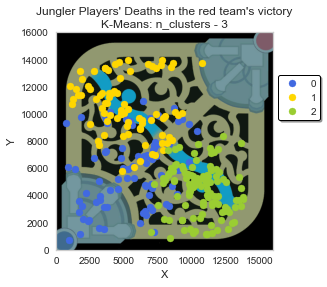

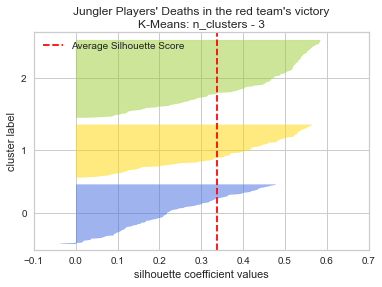

Silhouette score: 0.336756309515573
2    119
0     91
1     81
Name: cluster, dtype: int64

Inertia: 340.4638472418287

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5638.340659   6084.967033   0.637363
1        1   5216.950617  10524.308642  -0.641975
2        2  10637.151261   4436.789916  -0.302521

In [46]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [47]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2418.017216   2685.482609   0.480761
1        1   2255.661803   2121.076507   0.528418
2        2   1573.264575   1734.971285   0.692755

In [48]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           10407.0             734.0           10920.0   
1        1           10772.0            1070.0           13999.0   
2        2           13743.0            6966.0            8408.0   

   min coordinate_y  max timestamp  min timestamp  
0             746.0              1              0  
1            5772.0              1             -1  
2             841.0              1             -1

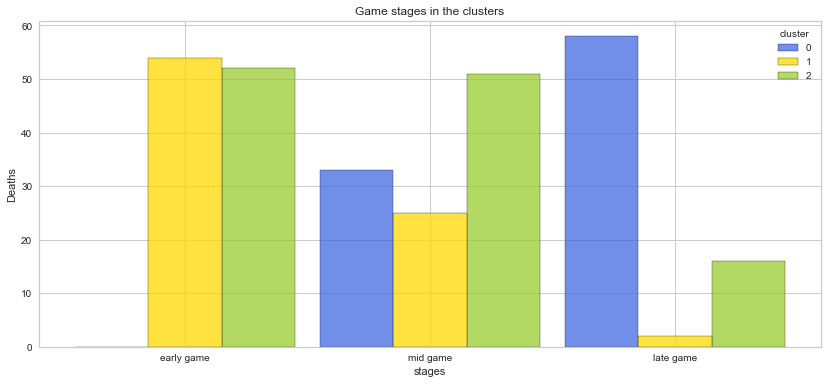

In [49]:
stagesPerClusterV2(redSideVictory_df, colors)

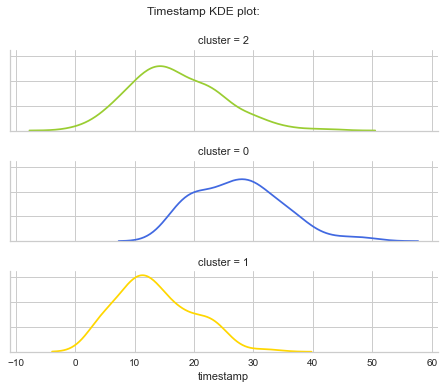

In [50]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [51]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Udyr           25
Rammus          8
Nocturne        7
Kayn            5
Warwick         4
XinZhao         3
Amumu           1
Volibear        1
MasterYi        1
Kindred         1
Hecarim         1

Deaths with each champion:

In [52]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Udyr        116
Rammus       58
Nocturne     51
Kayn         21
MasterYi     13
Warwick      10
Amumu         7
XinZhao       7
Hecarim       5
Kindred       2
Volibear      1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [53]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 11 champions when they won on the red side

Cluster 0 - died with 8 champions:
 ['Amumu' 'Kayn' 'Kindred' 'MasterYi' 'Nocturne' 'Rammus' 'Udyr' 'Warwick']
Udyr        40
Rammus      17
Nocturne    17
MasterYi     6
Kayn         5
Warwick      4
Amumu        1
Kindred      1
Name: champion, dtype: int64

Cluster 1 - died with 10 champions:
 ['Amumu' 'Hecarim' 'Kayn' 'MasterYi' 'Nocturne' 'Rammus' 'Udyr' 'Volibear'
 'Warwick' 'XinZhao']
Udyr        33
Rammus      17
Kayn        12
Nocturne     5
MasterYi     3
Warwick      3
Hecarim      3
Amumu        2
XinZhao      2
Volibear     1
Name: champion, dtype: int64

Cluster 2 - died with 10 champions:
 ['Amumu' 'Hecarim' 'Kayn' 'Kindred' 'MasterYi' 'Nocturne' 'Rammus' 'Udyr'
 'Warwick' 'XinZhao']
Udyr        43
Nocturne    29
Rammus      24
XinZhao      5
MasterYi     4
Amumu        4
Kayn         4
Warwick      3
Hecarim      2
Kindred      1
Name: champion, dtype: int64



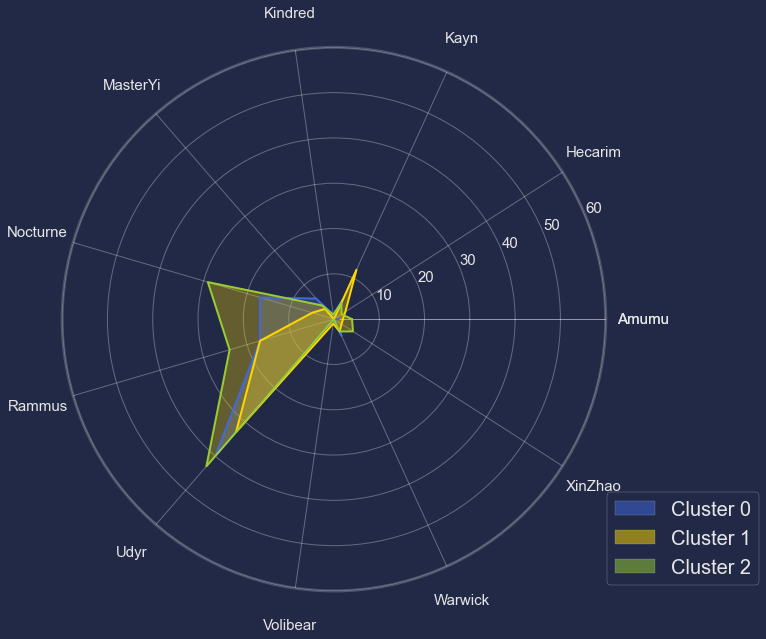

In [54]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
#### Clustering Red Team Defeat

In [55]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team      summoner region champion  timestamp  \
95062   EUW1_6283290818  Red   anonymous 2   euw1   Rammus   5.743183   
95069   EUW1_6283290818  Red   anonymous 2   euw1   Rammus   8.553800   
95084   EUW1_6283290818  Red   anonymous 2   euw1   Rammus  15.355967   
95089   EUW1_6283290818  Red   anonymous 2   euw1   Rammus  17.015133   
95093   EUW1_6283290818  Red   anonymous 2   euw1   Rammus  19.633500   
...                 ...  ...           ...    ...      ...        ...   
574115  EUW1_6287909560  Red  anonymous 15   euw1     Kayn  27.914667   
574119  EUW1_6287909560  Red  anonymous 15   euw1     Kayn  29.295417   
574122  EUW1_6287909560  Red  anonymous 15   euw1     Kayn  30.456033   
574129  EUW1_6287909560  Red  anonymous 15   euw1     Kayn  33.017100   
574134  EUW1_6287909560  Red  anonymous 15   euw1     Kayn  35.915900   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
95062        10336.0        3183.0    NaN            NaN  ...   
95069         9388.0        5391.0    NaN            NaN  ...   
95084        11948.0        3921.0    NaN            NaN  ...   
95089        10714.0       10775.0    NaN            NaN  ...   
95093         3043.0       11560.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
574115        5331.0       12187.0    NaN            NaN  ...   
574119        9032.0        4461.0    NaN            NaN  ...   
574122       10374.0       10419.0    NaN            NaN  ...   
574129        9901.0       12128.0    NaN            NaN  ...   
574134       11122.0        7441.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
95062               NaN    False      Death        NaN           NaN   NaN   
95069               NaN    False      Death        NaN           NaN   NaN   
95084               NaN    False      Death        NaN           NaN   NaN   
95089               NaN    False      Death        NaN           NaN   NaN   
95093               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
574115              NaN    False      Death        NaN           NaN   NaN   
574119              NaN    False      Death        NaN           NaN   NaN   
574122              NaN    False      Death        NaN           NaN   NaN   
574129              NaN    False      Death        NaN           NaN   NaN   
574134              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
95062       NaN       NaN  JUNGLE  Iron  
95069       NaN       NaN  JUNGLE  Iron  
95084       NaN       NaN  JUNGLE  Iron  
95089       NaN       NaN  JUNGLE  Iron  
95093       NaN       NaN  JUNGLE  Iron  
...         ...       ...     ...   ...  
574115      NaN       NaN  JUNGLE  Iron  
574119      NaN       NaN  JUNGLE  Iron  
574122      NaN       NaN  JUNGLE  Iron  
574129      NaN       NaN  JUNGLE  Iron  
574134      NaN       NaN  JUNGLE  Iron  

[388 rows x 56 columns]

In [56]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)].copy()

In [57]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 15 lost 7 matches on the red side
anonymous 15 has an average of 9.0 deaths per game when losing on the red side

anonymous 2 lost 9 matches on the red side
anonymous 2 has an average of 10.0 deaths per game when losing on the red side

anonymous 3 lost 5 matches on the red side
anonymous 3 has an average of 12.0 deaths per game when losing on the red side

anonymous 8 lost 25 matches on the red side
anonymous 8 has an average of 7.0 deaths per game when losing on the red side



In [58]:
print("Defeat games on red side contains {} matches in which the bottom died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 46 matches in which the bottom died at least once
4 players died a total of 388 times on the red side
Defeat games on red side contains an average of 8.434782608695652 deaths per game


In [59]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
95062        10336.0        3183.0   5.743183
95069         9388.0        5391.0   8.553800
95084        11948.0        3921.0  15.355967
95089        10714.0       10775.0  17.015133
95093         3043.0       11560.0  19.633500
...              ...           ...        ...
574115        5331.0       12187.0  27.914667
574119        9032.0        4461.0  29.295417
574122       10374.0       10419.0  30.456033
574129        9901.0       12128.0  33.017100
574134       11122.0        7441.0  35.915900

[388 rows x 3 columns]

Time discretization

In [60]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [61]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [62]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [63]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [64]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
95062       0.373285     -1.457552         -1
95069       0.058678     -0.763422         -1
95084       0.908250     -1.225546          0
95089       0.498730      0.929150          0
95093      -2.047001      1.175931          0
...              ...           ...        ...
574115     -1.287696      1.373041          1
574119     -0.059466     -1.055786          1
574122      0.385896      0.817234          1
574129      0.228924      1.354493          1
574134      0.634130     -0.118962          1

[388 rows x 3 columns]

In [65]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.29593065400724466
Silhouette score for k=3: 0.33617863231015005
Silhouette score for k=4: 0.3042262066503865
Silhouette score for k=5: 0.3085128465514724
Silhouette score for k=6: 0.3188275901737299
Silhouette score for k=7: 0.3241493345458904
Silhouette score for k=8: 0.32542775299909094
Silhouette score for k=9: 0.32882058384835694
Silhouette score for k=10: 0.34693779971963257
Silhouette score for k=11: 0.3374073057527104
Silhouette score for k=12: 0.34659639269920123
Silhouette score for k=13: 0.3460716017436339
Silhouette score for k=14: 0.3584960018183616
Silhouette score for k=15: 0.355050608926283
Silhouette score for k=16: 0.36128454874011345
Silhouette score for k=17: 0.36280064625722264
Silhouette score for k=18: 0.37458979476341164
Silhouette score for k=19: 0.3661115297450865
Silhouette score for k=20: 0.3741022287659758
Silhouette score for k=25: 0.3774483975664381


K-Means with k = 3

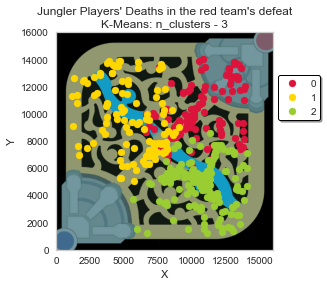

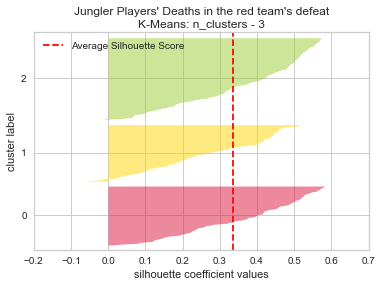

Silhouette score: 0.33617863231015005
2    161
0    116
1    111
Name: cluster, dtype: int64

Inertia: 471.0436286019194

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10567.603448  10170.775862   0.689655
1        1   5560.378378   9582.027027  -0.405405
2        2  10750.913043   4910.043478  -0.304348

In [66]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "yellowgreen"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [67]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2052.276948   1973.854474   0.480908
1        1   2046.634328   2446.653904   0.676216
2        2   1753.249357   1691.389268   0.696428

In [68]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13892.0            6606.0           14061.0   
1        1            9074.0            1158.0           13920.0   
2        2           14088.0            5635.0            8569.0   

   min coordinate_y  max timestamp  min timestamp  
0            6162.0              1             -1  
1            5086.0              1             -1  
2            1202.0              1             -1

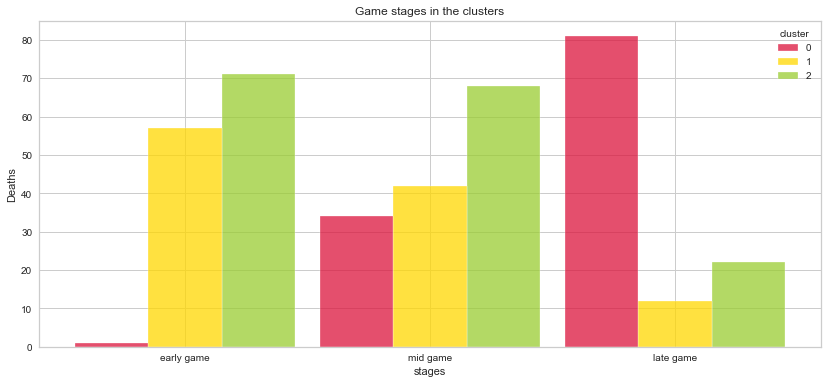

In [69]:
stagesPerClusterV2(redSideDefeat_df, colors)

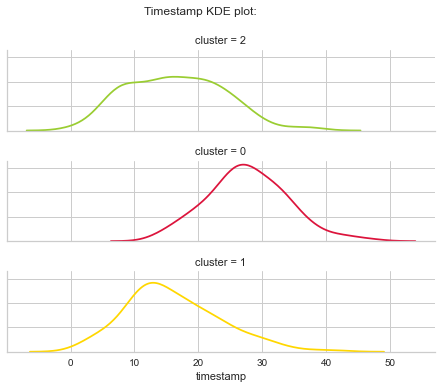

In [70]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [71]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Udyr           22
Kayn            7
Nocturne        4
Rammus          4
Vi              2
Warwick         2
MasterYi        2
Volibear        1
JarvanIV        1
Rengar          1

Deaths with each champion:

In [72]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Udyr        159
Kayn         81
Rammus       38
Nocturne     34
MasterYi     21
JarvanIV     15
Warwick      13
Rengar       11
Vi           11
Volibear      5
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [73]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 10 champions when they won on the red side

Cluster 0 - died with 9 champions:
 ['JarvanIV' 'Kayn' 'MasterYi' 'Nocturne' 'Rammus' 'Rengar' 'Udyr' 'Vi'
 'Warwick']
Udyr        53
Kayn        22
Rammus      10
Nocturne     9
MasterYi     6
Vi           5
Warwick      5
JarvanIV     4
Rengar       2
Name: champion, dtype: int64

Cluster 1 - died with 10 champions:
 ['JarvanIV' 'Kayn' 'MasterYi' 'Nocturne' 'Rammus' 'Rengar' 'Udyr' 'Vi'
 'Volibear' 'Warwick']
Udyr        43
Kayn        29
Rammus       9
Nocturne     7
MasterYi     7
JarvanIV     4
Volibear     4
Rengar       3
Warwick      3
Vi           2
Name: champion, dtype: int64

Cluster 2 - died with 10 champions:
 ['JarvanIV' 'Kayn' 'MasterYi' 'Nocturne' 'Rammus' 'Rengar' 'Udyr' 'Vi'
 'Volibear' 'Warwick']
Udyr        63
Kayn        30
Rammus      19
Nocturne    18
MasterYi     8
JarvanIV     7
Rengar       6
Warwick      5
Vi           4
Volibear     1
Name: champion, dtype: int64



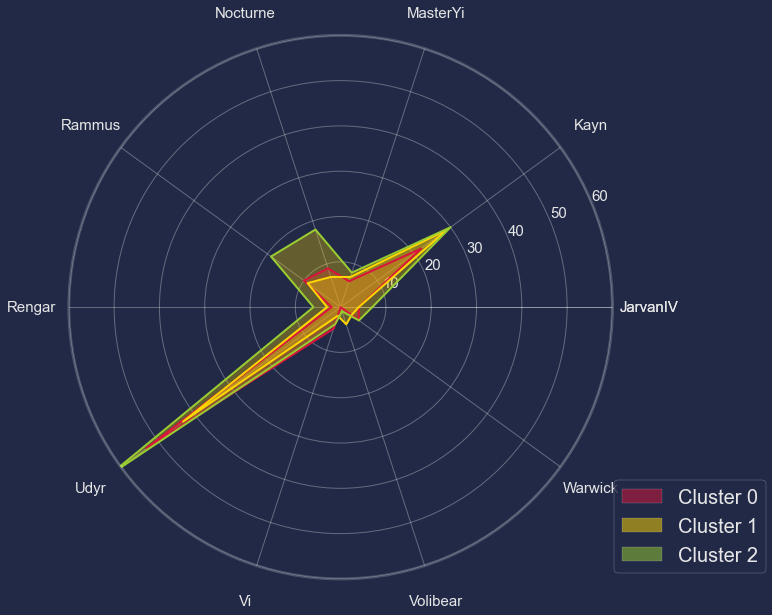

In [74]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
#### Clustering Blue Team Victory

In [75]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team      summoner region champion  timestamp  \
94802   EUW1_6283688741  Blue   anonymous 2   euw1   Rammus   4.391617   
94809   EUW1_6283688741  Blue   anonymous 2   euw1   Rammus   8.655550   
94818   EUW1_6283688741  Blue   anonymous 2   euw1   Rammus  12.164733   
94821   EUW1_6283688741  Blue   anonymous 2   euw1   Rammus  14.185683   
94834   EUW1_6283688741  Blue   anonymous 2   euw1   Rammus  21.036700   
...                 ...   ...           ...    ...      ...        ...   
622320  EUW1_6289240770  Blue  anonymous 15   euw1    Diana   3.903300   
622325  EUW1_6289240770  Blue  anonymous 15   euw1    Diana   6.093767   
622336  EUW1_6289240770  Blue  anonymous 15   euw1    Diana  12.308633   
622341  EUW1_6289240770  Blue  anonymous 15   euw1    Diana  15.346233   
622345  EUW1_6289240770  Blue  anonymous 15   euw1    Diana  17.908350   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
94802         2804.0        9735.0    NaN            NaN  ...   
94809         2839.0       11648.0    NaN            NaN  ...   
94818         9908.0        4673.0    NaN            NaN  ...   
94821         9350.0        5646.0    NaN            NaN  ...   
94834         9091.0        8971.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
622320        4762.0        9216.0    NaN            NaN  ...   
622325        6790.0        4573.0    NaN            NaN  ...   
622336        7730.0        5780.0    NaN            NaN  ...   
622341        8475.0        5382.0    NaN            NaN  ...   
622345        1866.0       11426.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
94802               NaN     True      Death        NaN           NaN   NaN   
94809               NaN     True      Death        NaN           NaN   NaN   
94818               NaN     True      Death        NaN           NaN   NaN   
94821               NaN     True      Death        NaN           NaN   NaN   
94834               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
622320              NaN     True      Death        NaN           NaN   NaN   
622325              NaN     True      Death        NaN           NaN   NaN   
622336              NaN     True      Death        NaN           NaN   NaN   
622341              NaN     True      Death        NaN           NaN   NaN   
622345              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
94802       NaN       NaN  JUNGLE  Iron  
94809       NaN       NaN  JUNGLE  Iron  
94818       NaN       NaN  JUNGLE  Iron  
94821       NaN       NaN  JUNGLE  Iron  
94834       NaN       NaN  JUNGLE  Iron  
...         ...       ...     ...   ...  
622320      NaN       NaN  JUNGLE  Iron  
622325      NaN       NaN  JUNGLE  Iron  
622336      NaN       NaN  JUNGLE  Iron  
622341      NaN       NaN  JUNGLE  Iron  
622345      NaN       NaN  JUNGLE  Iron  

[230 rows x 56 columns]

In [76]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)].copy()

In [77]:
blueSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [78]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

42

In [79]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

46.666666666666664

In [80]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

4.041468986118433

In [81]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 15 won 14 matches on the blue side
anonymous 15 has an average of 6.0 deaths per game when winning on the blue side

anonymous 2 won 9 matches on the blue side
anonymous 2 has an average of 7.555555555555555 deaths per game when winning on the blue side

anonymous 3 won 5 matches on the blue side
anonymous 3 has an average of 4.6 deaths per game when winning on the blue side

anonymous 8 won 14 matches on the blue side
anonymous 8 has an average of 3.9285714285714284 deaths per game when winning on the blue side



In [82]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 42 matches in which the jungler died at least once
4 players died a total of 230 times on the blue side
Victory games on blue side contains an average of 5.476190476190476 deaths per game


In [83]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
94802         2804.0        9735.0   4.391617
94809         2839.0       11648.0   8.655550
94818         9908.0        4673.0  12.164733
94821         9350.0        5646.0  14.185683
94834         9091.0        8971.0  21.036700
...              ...           ...        ...
622320        4762.0        9216.0   3.903300
622325        6790.0        4573.0   6.093767
622336        7730.0        5780.0  12.308633
622341        8475.0        5382.0  15.346233
622345        1866.0       11426.0  17.908350

[230 rows x 3 columns]

Time discretization

In [84]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [85]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [86]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [87]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [88]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
94802      -1.609186      0.704167         -1
94809      -1.598495      1.311869         -1
94818       0.560680     -0.903877         -1
94821       0.390243     -0.594784         -1
94834       0.311133      0.461468          0
...              ...           ...        ...
622320     -1.011129      0.539297         -1
622325     -0.391691     -0.935644         -1
622336     -0.104574     -0.552216         -1
622341      0.122981     -0.678649          0
622345     -1.895691      1.241347          0

[230 rows x 3 columns]

In [89]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3547573777196614
Silhouette score for k=3: 0.3467891905723775
Silhouette score for k=4: 0.369203989814251
Silhouette score for k=5: 0.33847014447870005
Silhouette score for k=6: 0.3178698684838162
Silhouette score for k=7: 0.3311743059776673
Silhouette score for k=8: 0.33989985271103584
Silhouette score for k=9: 0.34508555259548207
Silhouette score for k=10: 0.343813159317689
Silhouette score for k=11: 0.3756434064275458
Silhouette score for k=12: 0.3693923125310901
Silhouette score for k=13: 0.36007973904175833
Silhouette score for k=14: 0.3903435844596942
Silhouette score for k=15: 0.38819175889939833
Silhouette score for k=16: 0.3947547476664764
Silhouette score for k=17: 0.40125885897982305
Silhouette score for k=18: 0.39555119328346444
Silhouette score for k=19: 0.3967882551977254
Silhouette score for k=20: 0.3976912360010236
Silhouette score for k=25: 0.427105973565253


K-Means with k = 3

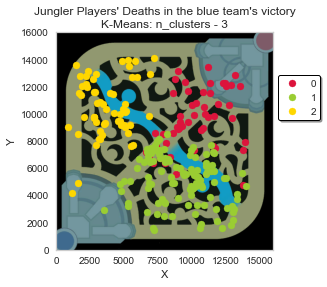

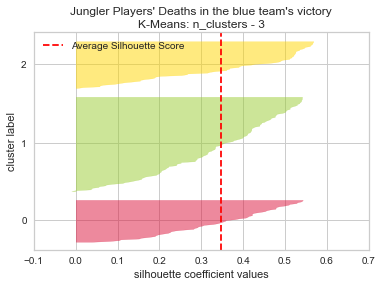

Silhouette score: 0.3467891905723775
1    118
2     59
0     53
Name: cluster, dtype: int64

Inertia: 271.12688011454196

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10210.641509   9529.698113   0.509434
1        1   9266.627119   5125.576271  -0.508475
2        2   3763.033898  10497.033898  -0.203390

In [90]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "yellowgreen", "gold"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [91]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1978.843278   2162.714364   0.499911
1        1   2273.597399   1728.993552   0.620904
2        2   1548.662222   2119.445514   0.776338

In [92]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13884.0            6624.0           13476.0   
1        1           13965.0            3517.0            8506.0   
2        2            7212.0             886.0           14084.0   

   min coordinate_y  max timestamp  min timestamp  
0            4778.0              1              0  
1            1464.0              1             -1  
2            4148.0              1             -1

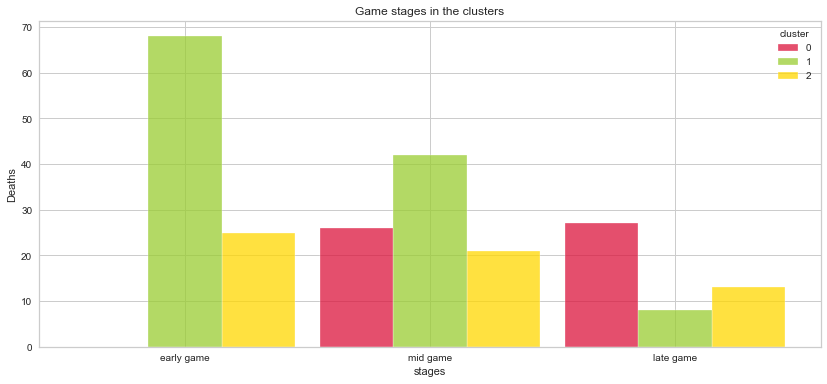

In [93]:
stagesPerClusterV2(blueSideVictory_df, colors)

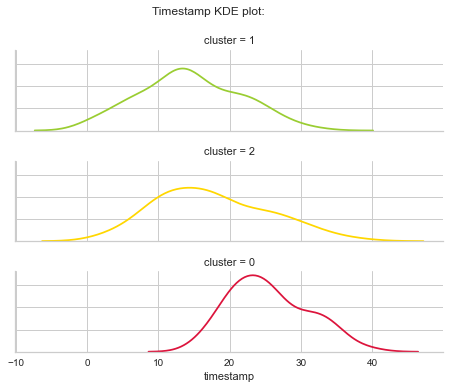

In [94]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [95]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Udyr              14
Kayn               8
Warwick            8
Rammus             5
Teemo              1
AurelionSol        1
Jax                1
XinZhao            1
Rengar             1
Nocturne           1
Diana              1

Deaths with each champion:

In [96]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Warwick        57
Udyr           55
Kayn           42
Rammus         30
Rengar         14
Jax             9
Teemo           5
XinZhao         5
Diana           5
AurelionSol     4
Nocturne        4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [97]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 11 champions when they won on the red side

Cluster 0 - died with 8 champions:
 ['AurelionSol' 'Jax' 'Kayn' 'Rammus' 'Rengar' 'Teemo' 'Udyr' 'Warwick']
Udyr           19
Warwick        14
Kayn            9
Rammus          6
Jax             2
Rengar          1
AurelionSol     1
Teemo           1
Name: champion, dtype: int64

Cluster 1 - died with 11 champions:
 ['AurelionSol' 'Diana' 'Jax' 'Kayn' 'Nocturne' 'Rammus' 'Rengar' 'Teemo'
 'Udyr' 'Warwick' 'XinZhao']
Warwick        28
Kayn           27
Udyr           23
Rammus         13
Rengar          7
Jax             6
Teemo           4
XinZhao         3
Diana           3
AurelionSol     2
Nocturne        2
Name: champion, dtype: int64

Cluster 2 - died with 10 champions:
 ['AurelionSol' 'Diana' 'Jax' 'Kayn' 'Nocturne' 'Rammus' 'Rengar' 'Udyr'
 'Warwick' 'XinZhao']
Warwick        15
Udyr           13
Rammus         11
Rengar          6
Kayn            6
Nocturne        2
XinZhao         2
Diana           2
Jax      

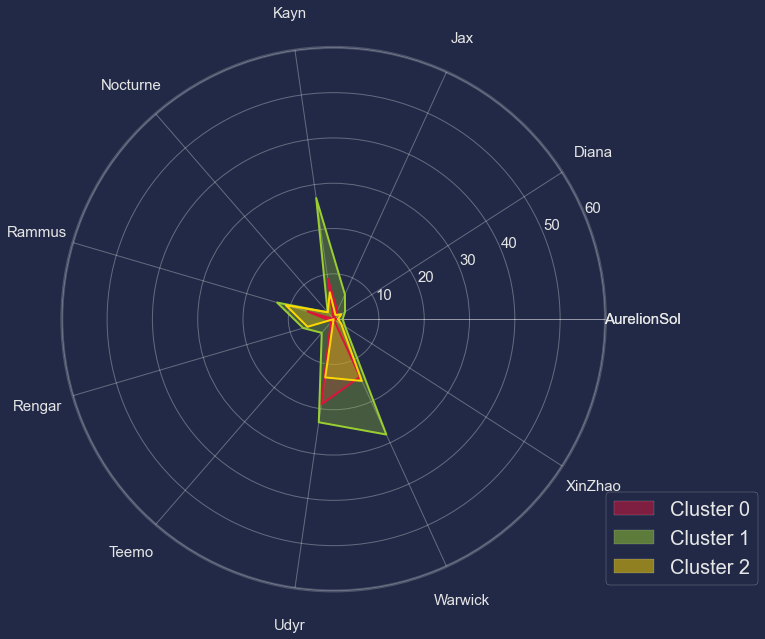

In [98]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
#### Clustering Blue Team Defeat

In [99]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team      summoner region champion  timestamp  \
95485   EUW1_6282035753  Blue   anonymous 2   euw1   Rammus   9.073450   
95490   EUW1_6282035753  Blue   anonymous 2   euw1   Rammus  11.900233   
95496   EUW1_6282035753  Blue   anonymous 2   euw1   Rammus  14.919033   
95501   EUW1_6282035753  Blue   anonymous 2   euw1   Rammus  17.620967   
95507   EUW1_6282035753  Blue   anonymous 2   euw1   Rammus  21.362000   
...                 ...   ...           ...    ...      ...        ...   
622292  EUW1_6289281212  Blue  anonymous 15   euw1    Diana  19.362017   
622296  EUW1_6289281212  Blue  anonymous 15   euw1    Diana  21.252483   
622298  EUW1_6289281212  Blue  anonymous 15   euw1    Diana  22.657883   
622300  EUW1_6289281212  Blue  anonymous 15   euw1    Diana  24.003167   
622308  EUW1_6289281212  Blue  anonymous 15   euw1    Diana  26.944517   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
95485        11026.0        4340.0    NaN            NaN  ...   
95490         4847.0       10308.0    NaN            NaN  ...   
95496        10384.0        4903.0    NaN            NaN  ...   
95501         2451.0        9100.0    NaN            NaN  ...   
95507         8796.0        8737.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
622292        9915.0        5212.0    NaN            NaN  ...   
622296        4156.0        3901.0    NaN            NaN  ...   
622298        4397.0       10048.0    NaN            NaN  ...   
622300        1438.0        8400.0    NaN            NaN  ...   
622308        6078.0        3878.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
95485               NaN    False      Death        NaN           NaN   NaN   
95490               NaN    False      Death        NaN           NaN   NaN   
95496               NaN    False      Death        NaN           NaN   NaN   
95501               NaN    False      Death        NaN           NaN   NaN   
95507               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
622292              NaN    False      Death        NaN           NaN   NaN   
622296              NaN    False      Death        NaN           NaN   NaN   
622298              NaN    False      Death        NaN           NaN   NaN   
622300              NaN    False      Death        NaN           NaN   NaN   
622308              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
95485       NaN       NaN  JUNGLE  Iron  
95490       NaN       NaN  JUNGLE  Iron  
95496       NaN       NaN  JUNGLE  Iron  
95501       NaN       NaN  JUNGLE  Iron  
95507       NaN       NaN  JUNGLE  Iron  
...         ...       ...     ...   ...  
622292      NaN       NaN  JUNGLE  Iron  
622296      NaN       NaN  JUNGLE  Iron  
622298      NaN       NaN  JUNGLE  Iron  
622300      NaN       NaN  JUNGLE  Iron  
622308      NaN       NaN  JUNGLE  Iron  

[372 rows x 56 columns]

In [100]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)].copy()

In [101]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 15 lost 8 matches on the blue side
anonymous 15 has an average of 9.375 deaths per game when losing on the blue side

anonymous 2 lost 9 matches on the blue side
anonymous 2 has an average of 10.444444444444445 deaths per game when losing on the blue side

anonymous 3 lost 4 matches on the blue side
anonymous 3 has an average of 7.5 deaths per game when losing on the blue side

anonymous 8 lost 27 matches on the blue side
anonymous 8 has an average of 6.407407407407407 deaths per game when losing on the blue side



In [102]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 48 matches in which the jungler died at least once
4 players died a total of 372 times on the blue side
Defeat games on blue side contains an average of 7.75 deaths per game


In [103]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
95485        11026.0        4340.0   9.073450
95490         4847.0       10308.0  11.900233
95496        10384.0        4903.0  14.919033
95501         2451.0        9100.0  17.620967
95507         8796.0        8737.0  21.362000
...              ...           ...        ...
622292        9915.0        5212.0  19.362017
622296        4156.0        3901.0  21.252483
622298        4397.0       10048.0  22.657883
622300        1438.0        8400.0  24.003167
622308        6078.0        3878.0  26.944517

[372 rows x 3 columns]

Time discretization

In [104]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [105]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [106]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [107]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [108]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
95485       1.275315     -0.655128         -1
95490      -0.545114      1.322162         -1
95496       1.086172     -0.468598         -1
95501      -1.251013      0.921933          0
95507       0.618323      0.801666          0
...              ...           ...        ...
622292      0.947997     -0.366221          0
622296     -0.748693     -0.800576          0
622298     -0.677691      1.236020          0
622300     -1.549458      0.690012          0
622308     -0.182442     -0.808196          1

[372 rows x 3 columns]

In [109]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3431619867773628
Silhouette score for k=3: 0.32047409534059723
Silhouette score for k=4: 0.32148282468993056
Silhouette score for k=5: 0.3229495418497039
Silhouette score for k=6: 0.3461646456040386
Silhouette score for k=7: 0.34217380969363825
Silhouette score for k=8: 0.3429493279170999
Silhouette score for k=9: 0.3522732625315596
Silhouette score for k=10: 0.3527377651805458
Silhouette score for k=11: 0.3590447623884433
Silhouette score for k=12: 0.3752610208987127
Silhouette score for k=13: 0.3596185329658658
Silhouette score for k=14: 0.38225926451166087
Silhouette score for k=15: 0.37577372875660886
Silhouette score for k=16: 0.38850621450196593
Silhouette score for k=17: 0.3904581692766418
Silhouette score for k=18: 0.37064464936495267
Silhouette score for k=19: 0.38088360835095025
Silhouette score for k=20: 0.39680564495304516
Silhouette score for k=25: 0.40356349017293014


K-Means with k = 3

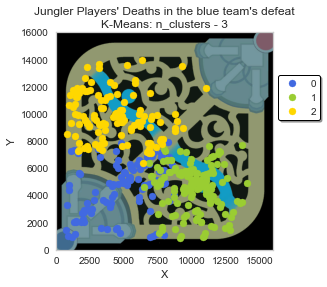

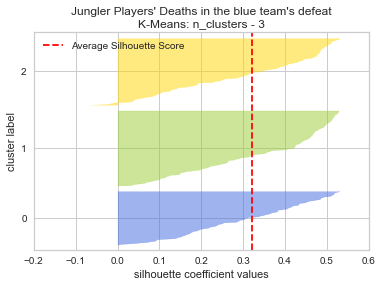

Silhouette score: 0.32047409534059723
1    143
2    127
0    102
Name: cluster, dtype: int64

Inertia: 444.0315456989286

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4808.764706   4575.901961   0.588235
1        1  10113.146853   4527.272727  -0.195804
2        2   4367.755906   9731.606299  -0.283465

In [110]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "yellowgreen", "gold"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [111]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2284.517786   1942.897944   0.492153
1        1   1632.248695   1659.795679   0.740995
2        2   2263.988341   1688.089966   0.792660

In [112]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            8700.0             708.0            7944.0   
1        1           14057.0            6476.0            7702.0   
2        2           11068.0             846.0           13968.0   

   min coordinate_y  max timestamp  min timestamp  
0             906.0              1              0  
1             851.0              1             -1  
2            6352.0              1             -1

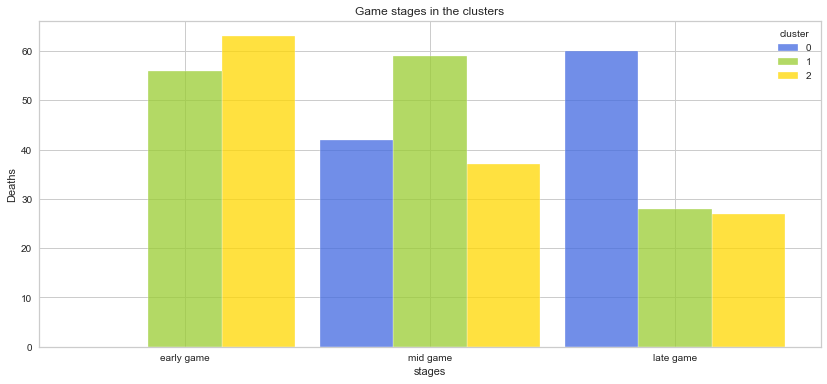

In [113]:
stagesPerClusterV2(blueSideDefeat_df, colors)

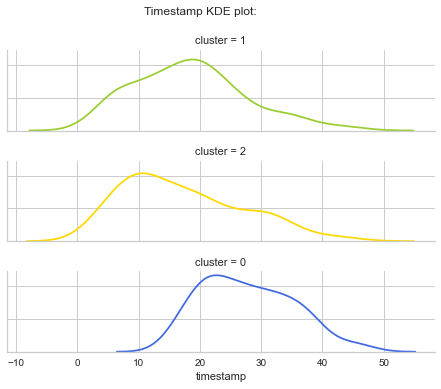

In [114]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [115]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Udyr             21
Kayn              5
Rammus            5
Volibear          4
MasterYi          2
Warwick           2
Amumu             1
Nocturne          1
Jax               1
Vi                1
Rengar            1
Kindred           1
MonkeyKing        1
Shaco             1
Diana             1

Deaths with each champion:

In [116]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Udyr          130
Rammus         44
Kayn           43
Volibear       28
Warwick        19
Jax            14
MasterYi       14
Amumu          12
Kindred        12
Shaco          12
Rengar         10
MonkeyKing     10
Diana          10
Nocturne        9
Vi              5
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [117]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 15 champions when they won on the red side

Cluster 0 - died with 15 champions:
 ['Amumu' 'Diana' 'Jax' 'Kayn' 'Kindred' 'MasterYi' 'MonkeyKing' 'Nocturne'
 'Rammus' 'Rengar' 'Shaco' 'Udyr' 'Vi' 'Volibear' 'Warwick']
Udyr          36
Rammus         9
Kayn           8
Volibear       8
Jax            6
Warwick        6
MonkeyKing     5
Nocturne       4
Kindred        4
Rengar         3
Amumu          3
MasterYi       3
Shaco          3
Vi             2
Diana          2
Name: champion, dtype: int64

Cluster 1 - died with 14 champions:
 ['Amumu' 'Diana' 'Jax' 'Kayn' 'Kindred' 'MasterYi' 'MonkeyKing' 'Nocturne'
 'Rammus' 'Rengar' 'Shaco' 'Udyr' 'Volibear' 'Warwick']
Udyr          43
Rammus        23
Kayn          23
MasterYi       9
Warwick        8
Volibear       7
Amumu          5
Shaco          5
Jax            4
Kindred        4
Rengar         3
Nocturne       3
MonkeyKing     3
Diana          3
Name: champion, dtype: int64

Cluster 2 - died with 15 champions:
 ['

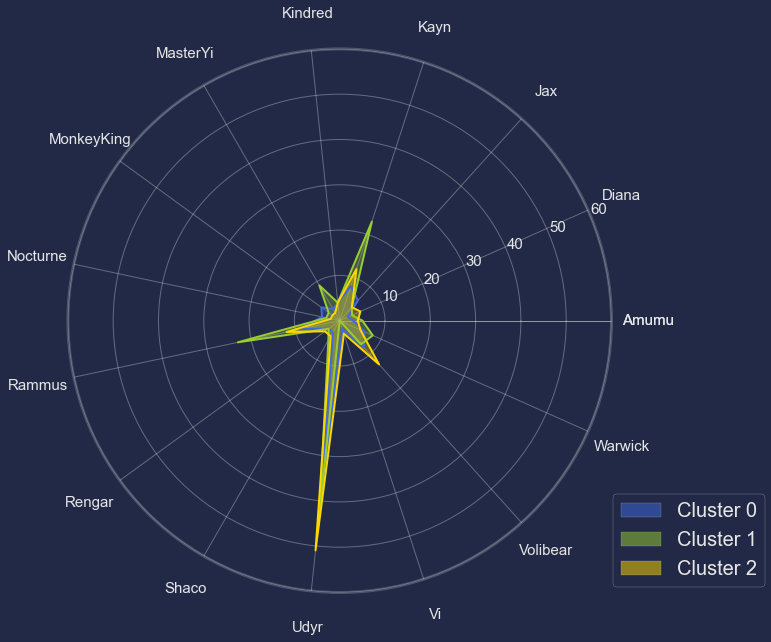

In [118]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
### Bronze Players

#### Clustering Red Team Victory

In [119]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
372184  EUW1_6283905822  Red   anonymous 90   euw1     Ekko   7.078783   
372195  EUW1_6283905822  Red   anonymous 90   euw1     Ekko  12.289433   
372199  EUW1_6283905822  Red   anonymous 90   euw1     Ekko  14.554433   
372203  EUW1_6283905822  Red   anonymous 90   euw1     Ekko  16.656883   
372223  EUW1_6283905822  Red   anonymous 90   euw1     Ekko  24.174450   
...                 ...  ...            ...    ...      ...        ...   
634748  EUW1_6289946255  Red   anonymous 96   euw1  Warwick  36.318733   
634755  EUW1_6289946255  Red   anonymous 96   euw1  Warwick  41.341317   
636766  EUW1_6289787125  Red  anonymous 106   euw1     Nunu  18.784133   
636941  EUW1_6289630475  Red  anonymous 106   euw1     Nunu  10.592500   
636945  EUW1_6289630475  Red  anonymous 106   euw1     Nunu  11.950400   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
372184        9979.0        4901.0    NaN            NaN  ...   
372195       10151.0        8627.0    NaN            NaN  ...   
372199       12146.0        8856.0    NaN            NaN  ...   
372203        3140.0        8185.0    NaN            NaN  ...   
372223        9712.0        2603.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
634748        1984.0        2082.0    NaN            NaN  ...   
634755        2136.0        3477.0    NaN            NaN  ...   
636766       11652.0        3421.0    NaN            NaN  ...   
636941        5350.0        9110.0    NaN            NaN  ...   
636945        3477.0        9967.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
372184              NaN     True      Death        NaN           NaN   NaN   
372195              NaN     True      Death        NaN           NaN   NaN   
372199              NaN     True      Death        NaN           NaN   NaN   
372203              NaN     True      Death        NaN           NaN   NaN   
372223              NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
634748              NaN     True      Death        NaN           NaN   NaN   
634755              NaN     True      Death        NaN           NaN   NaN   
636766              NaN     True      Death        NaN           NaN   NaN   
636941              NaN     True      Death        NaN           NaN   NaN   
636945              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
372184      NaN       NaN  JUNGLE  Bronze  
372195      NaN       NaN  JUNGLE  Bronze  
372199      NaN       NaN  JUNGLE  Bronze  
372203      NaN       NaN  JUNGLE  Bronze  
372223      NaN       NaN  JUNGLE  Bronze  
...         ...       ...     ...     ...  
634748      NaN       NaN  JUNGLE  Bronze  
634755      NaN       NaN  JUNGLE  Bronze  
636766      NaN       NaN  JUNGLE  Bronze  
636941      NaN       NaN  JUNGLE  Bronze  
636945      NaN       NaN  JUNGLE  Bronze  

[591 rows x 56 columns]

In [120]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)].copy()

In [121]:
redSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [122]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

113

In [123]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

53.55450236966824

In [124]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

9.434865900383143

In [125]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 106 won 16 matches on the red side
anonymous 106 has an average of 4.25 deaths per game when winning on the red side

anonymous 114 won 7 matches on the red side
anonymous 114 has an average of 5.428571428571429 deaths per game when winning on the red side

anonymous 115 won 10 matches on the red side
anonymous 115 has an average of 7.2 deaths per game when winning on the red side

anonymous 118 won 2 matches on the red side
anonymous 118 has an average of 3.5 deaths per game when winning on the red side

anonymous 90 won 15 matches on the red side
anonymous 90 has an average of 5.8 deaths per game when winning on the red side

anonymous 93 won 30 matches on the red side
anonymous 93 has an average of 5.066666666666666 deaths per game when winning on the red side

anonymous 94 won 9 matches on the red side
anonymous 94 has an average of 4.111111111111111 deaths per game when winning on the red side

anonymous 96 won 24 matches on the red side
anonymous 96 has an average of 5.

In [126]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 113 matches in which the jungler died at least once
8 players died a total of 591 times on the red side
Victory games on red side contains an average of 5.230088495575221 deaths per game


In [127]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
372184        9979.0        4901.0   7.078783
372195       10151.0        8627.0  12.289433
372199       12146.0        8856.0  14.554433
372203        3140.0        8185.0  16.656883
372223        9712.0        2603.0  24.174450
...              ...           ...        ...
634748        1984.0        2082.0  36.318733
634755        2136.0        3477.0  41.341317
636766       11652.0        3421.0  18.784133
636941        5350.0        9110.0  10.592500
636945        3477.0        9967.0  11.950400

[591 rows x 3 columns]

Time discretization

In [128]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [129]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [130]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [131]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [132]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
372184      0.815935     -0.427266         -1
372195      0.865757      0.709374         -1
372199      1.443635      0.779232         -1
372203     -1.165072      0.574539          0
372223      0.738595     -1.128285          0
...              ...           ...        ...
634748     -1.499923     -1.287219          1
634755     -1.455894     -0.861666          1
636766      1.300541     -0.878749          0
636941     -0.524916      0.856716         -1
636945     -1.067456      1.118149         -1

[591 rows x 3 columns]

In [133]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.2877354098263629
Silhouette score for k=3: 0.339723273382984
Silhouette score for k=4: 0.33677508276106277
Silhouette score for k=5: 0.32179896408429587
Silhouette score for k=6: 0.3178244940060389
Silhouette score for k=7: 0.320555385249128
Silhouette score for k=8: 0.3214636582921885
Silhouette score for k=9: 0.325415375633125
Silhouette score for k=10: 0.31834934792361524
Silhouette score for k=11: 0.3250551205176328
Silhouette score for k=12: 0.33770930031425417
Silhouette score for k=13: 0.335390943714934
Silhouette score for k=14: 0.3442093390010288
Silhouette score for k=15: 0.34856523533592704
Silhouette score for k=16: 0.35321785020336444
Silhouette score for k=17: 0.36494406211884817
Silhouette score for k=18: 0.37872687945060557
Silhouette score for k=19: 0.38041400397913233
Silhouette score for k=20: 0.3691985529108159
Silhouette score for k=25: 0.3724606906844037


K-Means with k = 3

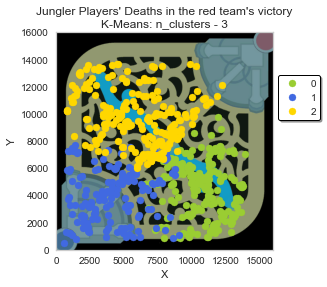

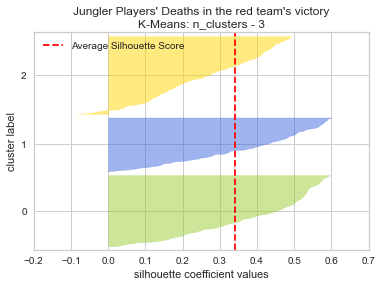

Silhouette score: 0.339723273382984
2    226
0    208
1    157
Name: cluster, dtype: int64

Inertia: 701.38060995926

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10664.971154   4377.677885  -0.413462
1        1   4155.662420   4053.636943   0.541401
2        2   6026.920354   9633.960177  -0.252212

In [134]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "royalblue", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [135]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1652.639829   1940.473933   0.673832
1        1   2208.478929   1937.391848   0.510906
2        2   2530.671205   2001.498331   0.730571

In [136]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13916.0            6568.0            9783.0   
1        1            9070.0             610.0            7704.0   
2        2           12242.0             785.0           13675.0   

   min coordinate_y  max timestamp  min timestamp  
0             846.0              1             -1  
1             524.0              1             -1  
2            6048.0              1             -1

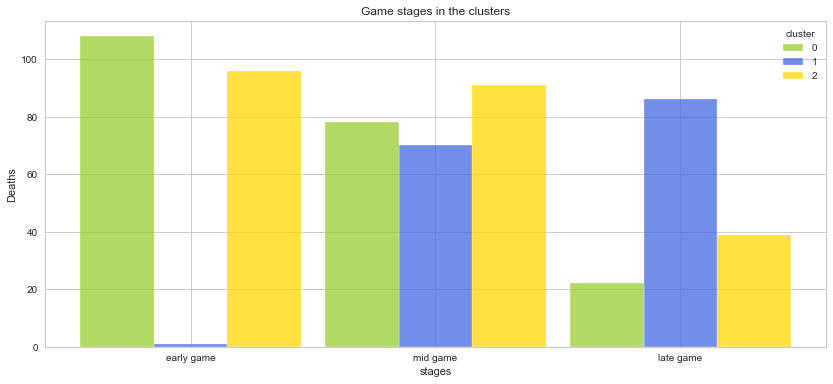

In [137]:
stagesPerClusterV2(redSideVictory_df, colors)

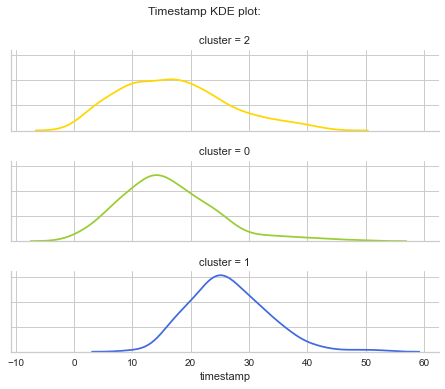

In [138]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [139]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Udyr              30
Nunu              20
Lillia            12
Ekko              10
Warwick            8
Sylas              8
RekSai             5
Amumu              2
Shyvana            2
Viego              2
Kayn               2
Jayce              1
Diana              1
MonkeyKing         1
Kindred            1
Vi                 1
Mordekaiser        1
Elise              1
Belveth            1
Rengar             1
Zac                1
AurelionSol        1
Jax                1

Deaths with each champion:

In [140]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Udyr           152
Nunu            85
Lillia          83
Ekko            61
Warwick         55
Sylas           32
RekSai          18
Kayn            13
Shyvana         12
Viego           12
Amumu            9
Elise            8
Mordekaiser      8
Jax              7
Vi               6
Diana            6
Rengar           5
MonkeyKing       4
AurelionSol      4
Jayce            3
Zac              3
Kindred          3
Belveth          2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [141]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 23 champions when they won on the red side

Cluster 0 - died with 21 champions:
 ['Amumu' 'AurelionSol' 'Diana' 'Ekko' 'Elise' 'Jax' 'Jayce' 'Kayn'
 'Kindred' 'Lillia' 'Mordekaiser' 'Nunu' 'RekSai' 'Rengar' 'Shyvana'
 'Sylas' 'Udyr' 'Vi' 'Viego' 'Warwick' 'Zac']
Udyr           56
Lillia         30
Nunu           29
Ekko           24
Warwick        16
Sylas           8
Shyvana         6
Amumu           6
RekSai          5
Mordekaiser     4
Kayn            4
Kindred         3
Elise           3
Viego           3
Jayce           2
Diana           2
AurelionSol     2
Jax             2
Zac             1
Vi              1
Rengar          1
Name: champion, dtype: int64

Cluster 1 - died with 19 champions:
 ['Amumu' 'Belveth' 'Diana' 'Ekko' 'Elise' 'Jax' 'Kayn' 'Lillia'
 'MonkeyKing' 'Mordekaiser' 'Nunu' 'RekSai' 'Rengar' 'Shyvana' 'Sylas'
 'Udyr' 'Vi' 'Viego' 'Warwick']
Udyr           39
Warwick        23
Nunu           21
Lillia         20
Ekko           14
Sylas       

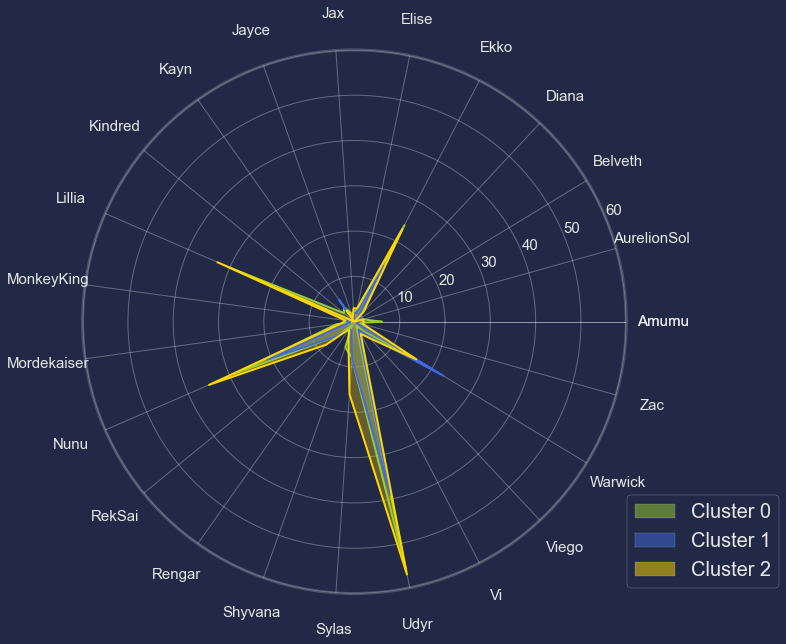

In [142]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
#### Clustering Red Team Defeat

In [143]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team      summoner region champion  timestamp  \
372047  EUW1_6284317555  Red  anonymous 90   euw1    Amumu  12.141350   
372050  EUW1_6284317555  Red  anonymous 90   euw1    Amumu  14.361850   
372057  EUW1_6284317555  Red  anonymous 90   euw1    Amumu  16.785033   
372061  EUW1_6284317555  Red  anonymous 90   euw1    Amumu  18.858500   
372069  EUW1_6284317555  Red  anonymous 90   euw1    Amumu  22.271050   
...                 ...  ...           ...    ...      ...        ...   
634911  EUW1_6289869790  Red  anonymous 96   euw1   RekSai  17.717683   
634914  EUW1_6289869790  Red  anonymous 96   euw1   RekSai  19.854733   
634925  EUW1_6289869790  Red  anonymous 96   euw1   RekSai  25.795133   
634930  EUW1_6289869790  Red  anonymous 96   euw1   RekSai  28.544500   
634937  EUW1_6289869790  Red  anonymous 96   euw1   RekSai  31.493167   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
372047        3804.0       13366.0    NaN            NaN  ...   
372050       13161.0        4171.0    NaN            NaN  ...   
372057        8246.0        8589.0    NaN            NaN  ...   
372061        7632.0       13411.0    NaN            NaN  ...   
372069       12950.0       11298.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
634911       11808.0        1369.0    NaN            NaN  ...   
634914       10349.0        5300.0    NaN            NaN  ...   
634925        6004.0        7263.0    NaN            NaN  ...   
634930        8150.0        7954.0    NaN            NaN  ...   
634937       11732.0       11910.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
372047              NaN    False      Death        NaN           NaN   NaN   
372050              NaN    False      Death        NaN           NaN   NaN   
372057              NaN    False      Death        NaN           NaN   NaN   
372061              NaN    False      Death        NaN           NaN   NaN   
372069              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
634911              NaN    False      Death        NaN           NaN   NaN   
634914              NaN    False      Death        NaN           NaN   NaN   
634925              NaN    False      Death        NaN           NaN   NaN   
634930              NaN    False      Death        NaN           NaN   NaN   
634937              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
372047      NaN       NaN  JUNGLE  Bronze  
372050      NaN       NaN  JUNGLE  Bronze  
372057      NaN       NaN  JUNGLE  Bronze  
372061      NaN       NaN  JUNGLE  Bronze  
372069      NaN       NaN  JUNGLE  Bronze  
...         ...       ...     ...     ...  
634911      NaN       NaN  JUNGLE  Bronze  
634914      NaN       NaN  JUNGLE  Bronze  
634925      NaN       NaN  JUNGLE  Bronze  
634930      NaN       NaN  JUNGLE  Bronze  
634937      NaN       NaN  JUNGLE  Bronze  

[899 rows x 56 columns]

In [144]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)].copy()

In [145]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 106 lost 11 matches on the red side
anonymous 106 has an average of 8.363636363636363 deaths per game when losing on the red side

anonymous 114 lost 10 matches on the red side
anonymous 114 has an average of 9.8 deaths per game when losing on the red side

anonymous 115 lost 14 matches on the red side
anonymous 115 has an average of 9.5 deaths per game when losing on the red side

anonymous 118 lost 5 matches on the red side
anonymous 118 has an average of 6.6 deaths per game when losing on the red side

anonymous 90 lost 11 matches on the red side
anonymous 90 has an average of 9.181818181818182 deaths per game when losing on the red side

anonymous 93 lost 15 matches on the red side
anonymous 93 has an average of 9.266666666666667 deaths per game when losing on the red side

anonymous 94 lost 12 matches on the red side
anonymous 94 has an average of 8.25 deaths per game when losing on the red side

anonymous 96 lost 20 matches on the red side
anonymous 96 has an average of

In [146]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 98 matches in which the jungler died at least once
8 players died a total of 899 times on the red side
Defeat games on red side contains an average of 9.173469387755102 deaths per game


In [147]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
372047        3804.0       13366.0  12.141350
372050       13161.0        4171.0  14.361850
372057        8246.0        8589.0  16.785033
372061        7632.0       13411.0  18.858500
372069       12950.0       11298.0  22.271050
...              ...           ...        ...
634911       11808.0        1369.0  17.717683
634914       10349.0        5300.0  19.854733
634925        6004.0        7263.0  25.795133
634930        8150.0        7954.0  28.544500
634937       11732.0       11910.0  31.493167

[899 rows x 3 columns]

Time discretization

In [148]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [149]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [150]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [151]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [152]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
372047     -1.414509      1.603372         -1
372050      1.417228     -1.093950         -1
372057     -0.070213      0.202055          0
372061     -0.256030      1.616573          0
372069      1.353373      0.996731          0
...              ...           ...        ...
634911      1.007766     -1.915907          0
634914      0.566224     -0.762761          0
634925     -0.748716     -0.186922          1
634930     -0.099266      0.015780          1
634937      0.984766      1.176259          1

[899 rows x 3 columns]

In [153]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.29775200645780286
Silhouette score for k=3: 0.33041465594628805
Silhouette score for k=4: 0.3504060864680877
Silhouette score for k=5: 0.3312891921365699
Silhouette score for k=6: 0.32794380162873976
Silhouette score for k=7: 0.3253754503154273
Silhouette score for k=8: 0.3252773953807668
Silhouette score for k=9: 0.3304138703924965
Silhouette score for k=10: 0.3260628071758341
Silhouette score for k=11: 0.34670587036460976
Silhouette score for k=12: 0.3542661780564491
Silhouette score for k=13: 0.35253259045714624
Silhouette score for k=14: 0.34774307959878165
Silhouette score for k=15: 0.3513277957048499
Silhouette score for k=16: 0.359758863903838
Silhouette score for k=17: 0.3653742050549399
Silhouette score for k=18: 0.36643365269923034
Silhouette score for k=19: 0.3799689629044288
Silhouette score for k=20: 0.3802355347082584
Silhouette score for k=25: 0.38302084018987814


K-Means with k = 3

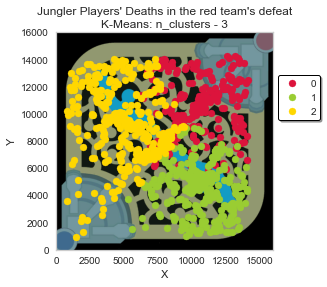

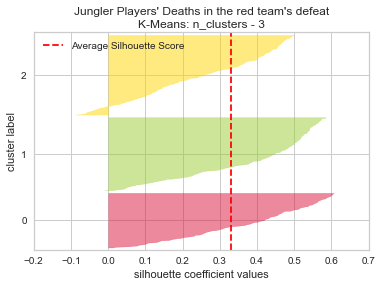

Silhouette score: 0.33041465594628805
2    345
1    317
0    237
Name: cluster, dtype: int64

Inertia: 1105.4433833569442

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10545.860759  10443.206751   0.691983
1        1  10591.094637   4491.157729  -0.337539
2        2   5115.889855   9285.646377  -0.255072

In [154]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "yellowgreen", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [155]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2004.342047   2168.478769   0.461674
1        1   1817.315062   1764.185801   0.703491
2        2   2076.847388   2674.183252   0.733373

In [156]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14121.0            6247.0           14263.0   
1        1           14056.0            5305.0            8942.0   
2        2            9452.0             808.0           14059.0   

   min coordinate_y  max timestamp  min timestamp  
0            5870.0              1              0  
1            1029.0              1             -1  
2             920.0              1             -1

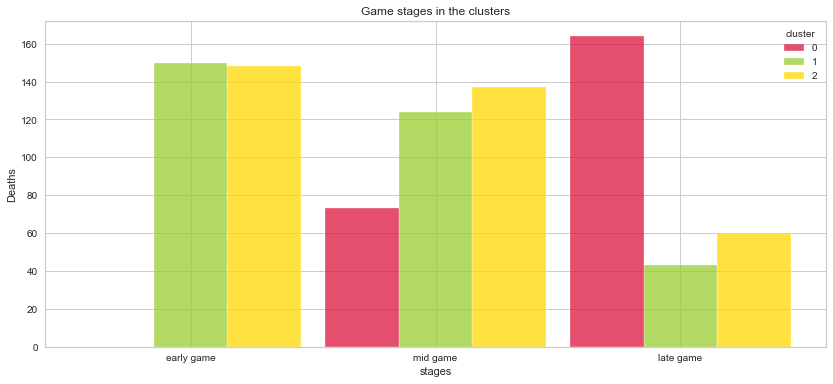

In [157]:
stagesPerClusterV2(redSideDefeat_df, colors)

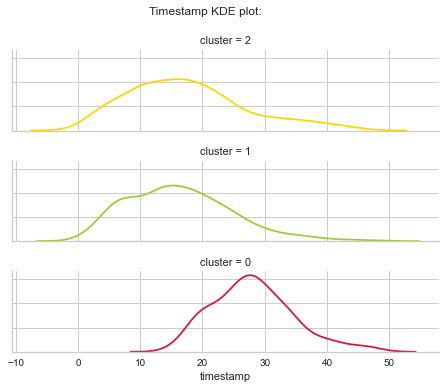

In [158]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [159]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Udyr             14
Nunu             13
Warwick          10
Sylas            10
Lillia            7
RekSai            6
Viego             5
Shyvana           4
Elise             4
Jayce             3
Diana             2
Vi                2
Amumu             2
MasterYi          2
Kindred           2
Ekko              2
Shaco             1
Malphite          1
Poppy             1
Trundle           1
Gragas            1
Sejuani           1
MonkeyKing        1
Kayn              1
Hecarim           1
Jax               1

Deaths with each champion:

In [160]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Udyr          134
Nunu          117
Warwick        97
Sylas          82
Lillia         77
RekSai         65
Viego          60
Elise          36
Shyvana        33
Vi             25
Jayce          19
Diana          17
Kindred        15
Ekko           13
Gragas         12
Jax            12
MasterYi       11
Amumu          11
Kayn           10
Poppy          10
Trundle         9
MonkeyKing      9
Malphite        9
Sejuani         7
Shaco           5
Hecarim         4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [161]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 26 champions when they won on the red side

Cluster 0 - died with 24 champions:
 ['Amumu' 'Diana' 'Ekko' 'Elise' 'Gragas' 'Hecarim' 'Jax' 'Jayce' 'Kayn'
 'Kindred' 'Lillia' 'MasterYi' 'MonkeyKing' 'Nunu' 'Poppy' 'RekSai'
 'Sejuani' 'Shaco' 'Shyvana' 'Sylas' 'Udyr' 'Vi' 'Viego' 'Warwick']
Udyr          40
Nunu          34
Lillia        22
Viego         21
Sylas         17
RekSai        16
Warwick       12
Shyvana       11
Elise         10
Vi             7
Diana          5
Jayce          5
Kayn           4
Gragas         4
Amumu          4
MasterYi       4
Ekko           4
Sejuani        3
Poppy          3
Kindred        3
Shaco          2
MonkeyKing     2
Hecarim        2
Jax            2
Name: champion, dtype: int64

Cluster 1 - died with 25 champions:
 ['Amumu' 'Diana' 'Ekko' 'Elise' 'Gragas' 'Hecarim' 'Jax' 'Jayce' 'Kayn'
 'Kindred' 'Lillia' 'Malphite' 'MasterYi' 'MonkeyKing' 'Nunu' 'Poppy'
 'RekSai' 'Shaco' 'Shyvana' 'Sylas' 'Trundle' 'Udyr' 'Vi' 'Viego'
 'War

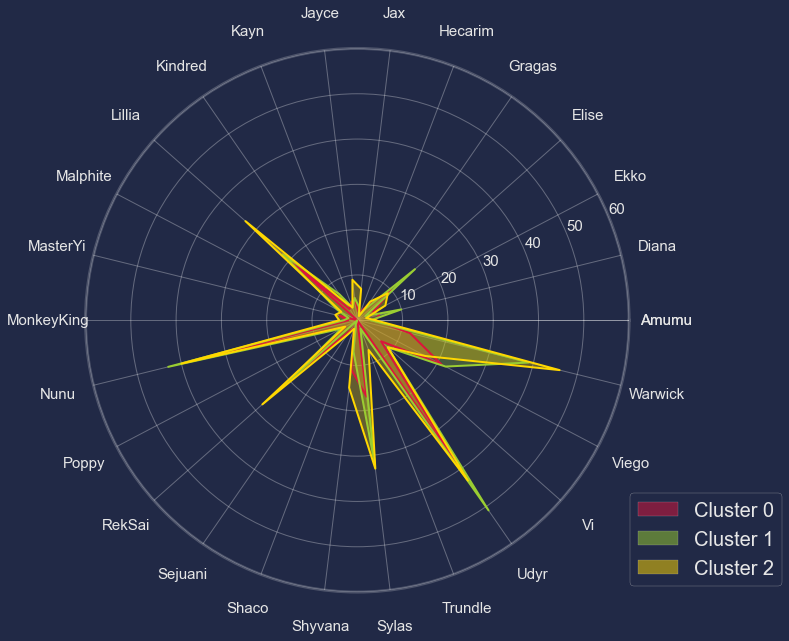

In [162]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
#### Clustering Blue Team Victory

In [163]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
372150  EUW1_6284009857  Blue   anonymous 90   euw1     Ekko   4.730233   
372298  EUW1_6283839433  Blue   anonymous 90   euw1     Ekko  24.178050   
372304  EUW1_6283839433  Blue   anonymous 90   euw1     Ekko  26.720333   
372486  EUW1_6281849341  Blue   anonymous 90   euw1  Warwick   5.276000   
372513  EUW1_6281849341  Blue   anonymous 90   euw1  Warwick  17.927250   
...                 ...   ...            ...    ...      ...        ...   
635096  EUW1_6289546912  Blue   anonymous 96   euw1   Lillia  10.174250   
635120  EUW1_6289546912  Blue   anonymous 96   euw1   Lillia  20.091150   
635132  EUW1_6289546912  Blue   anonymous 96   euw1   Lillia  24.333783   
636854  EUW1_6289726244  Blue  anonymous 106   euw1     Nunu  27.150767   
637016  EUW1_6289551233  Blue  anonymous 106   euw1     Nunu  24.825167   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
372150        6473.0       11304.0    NaN            NaN  ...   
372298        9661.0       12131.0    NaN            NaN  ...   
372304       13232.0       11589.0    NaN            NaN  ...   
372486        5001.0       12338.0    NaN            NaN  ...   
372513        8871.0        8407.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
635096        7659.0        8198.0    NaN            NaN  ...   
635120       11563.0        9754.0    NaN            NaN  ...   
635132       12626.0       10566.0    NaN            NaN  ...   
636854       11951.0        7218.0    NaN            NaN  ...   
637016        9593.0        9763.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
372150              NaN     True      Death        NaN           NaN   NaN   
372298              NaN     True      Death        NaN           NaN   NaN   
372304              NaN     True      Death        NaN           NaN   NaN   
372486              NaN     True      Death        NaN           NaN   NaN   
372513              NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
635096              NaN     True      Death        NaN           NaN   NaN   
635120              NaN     True      Death        NaN           NaN   NaN   
635132              NaN     True      Death        NaN           NaN   NaN   
636854              NaN     True      Death        NaN           NaN   NaN   
637016              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
372150      NaN       NaN  JUNGLE  Bronze  
372298      NaN       NaN  JUNGLE  Bronze  
372304      NaN       NaN  JUNGLE  Bronze  
372486      NaN       NaN  JUNGLE  Bronze  
372513      NaN       NaN  JUNGLE  Bronze  
...         ...       ...     ...     ...  
635096      NaN       NaN  JUNGLE  Bronze  
635120      NaN       NaN  JUNGLE  Bronze  
635132      NaN       NaN  JUNGLE  Bronze  
636854      NaN       NaN  JUNGLE  Bronze  
637016      NaN       NaN  JUNGLE  Bronze  

[482 rows x 56 columns]

In [164]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)].copy()

In [165]:
blueSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [166]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

104

In [167]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

48.82629107981221

In [168]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

8.469513266561238

In [169]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 106 won 17 matches on the blue side
anonymous 106 has an average of 3.7058823529411766 deaths per game when winning on the blue side

anonymous 114 won 10 matches on the blue side
anonymous 114 has an average of 4.2 deaths per game when winning on the blue side

anonymous 115 won 16 matches on the blue side
anonymous 115 has an average of 3.8125 deaths per game when winning on the blue side

anonymous 118 won 7 matches on the blue side
anonymous 118 has an average of 5.0 deaths per game when winning on the blue side

anonymous 90 won 10 matches on the blue side
anonymous 90 has an average of 4.1 deaths per game when winning on the blue side

anonymous 93 won 20 matches on the blue side
anonymous 93 has an average of 5.9 deaths per game when winning on the blue side

anonymous 94 won 7 matches on the blue side
anonymous 94 has an average of 5.571428571428571 deaths per game when winning on the blue side

anonymous 96 won 17 matches on the blue side
anonymous 96 has an average 

In [170]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 104 matches in which the jungler died at least once
8 players died a total of 482 times on the blue side
Victory games on blue side contains an average of 4.634615384615385 deaths per game


In [171]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
372150        6473.0       11304.0   4.730233
372298        9661.0       12131.0  24.178050
372304       13232.0       11589.0  26.720333
372486        5001.0       12338.0   5.276000
372513        8871.0        8407.0  17.927250
...              ...           ...        ...
635096        7659.0        8198.0  10.174250
635120       11563.0        9754.0  20.091150
635132       12626.0       10566.0  24.333783
636854       11951.0        7218.0  27.150767
637016        9593.0        9763.0  24.825167

[482 rows x 3 columns]

Time discretization

In [172]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [173]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [174]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [175]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [176]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
372150     -0.592585      0.952755         -1
372298      0.370656      1.207817          0
372304      1.449619      1.040654          1
372486     -1.037344      1.271660         -1
372513      0.131961      0.059264          0
...              ...           ...        ...
635096     -0.234240     -0.005196         -1
635120      0.945337      0.474705          0
635132      1.266518      0.725141          0
636854      1.062570     -0.307447          1
637016      0.350110      0.477480          0

[482 rows x 3 columns]

In [177]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.30359229644857755
Silhouette score for k=3: 0.3393694250173827
Silhouette score for k=4: 0.3242868427015616
Silhouette score for k=5: 0.3127475361567589
Silhouette score for k=6: 0.3192673722788385
Silhouette score for k=7: 0.31139294143245255
Silhouette score for k=8: 0.2983467957961353
Silhouette score for k=9: 0.32694665253215965
Silhouette score for k=10: 0.321412077736685
Silhouette score for k=11: 0.3378628073846809
Silhouette score for k=12: 0.34036241481288154
Silhouette score for k=13: 0.34742772851051057
Silhouette score for k=14: 0.3422430408065394
Silhouette score for k=15: 0.36101735508272814
Silhouette score for k=16: 0.3583864890550186
Silhouette score for k=17: 0.3537582666859479
Silhouette score for k=18: 0.366931303309874
Silhouette score for k=19: 0.37253613291084664
Silhouette score for k=20: 0.3754029257276007
Silhouette score for k=25: 0.3803655577225022


K-Means with k = 3

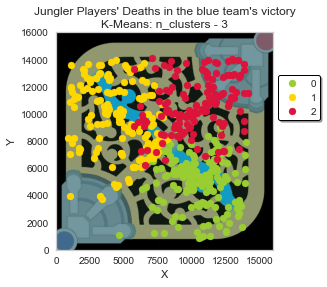

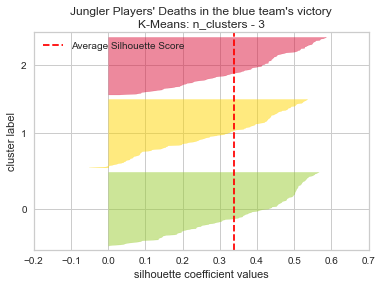

Silhouette score: 0.3393694250173827
0    178
1    165
2    139
Name: cluster, dtype: int64

Inertia: 572.8432179078798

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10467.775281   5000.730337  -0.320225
1        1   4764.460606   9653.278788  -0.454545
2        2  10186.410072  10623.273381   0.633094

In [178]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [179]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1780.456653   1823.391637   0.721839
1        1   2018.596523   2407.604796   0.682727
2        2   2176.124325   1957.100303   0.481961

In [180]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13984.0            4625.0            9040.0   
1        1            8673.0             886.0           13940.0   
2        2           14162.0            5712.0           14080.0   

   min coordinate_y  max timestamp  min timestamp  
0             851.0              1             -1  
1            3718.0              1             -1  
2            6206.0              1              0

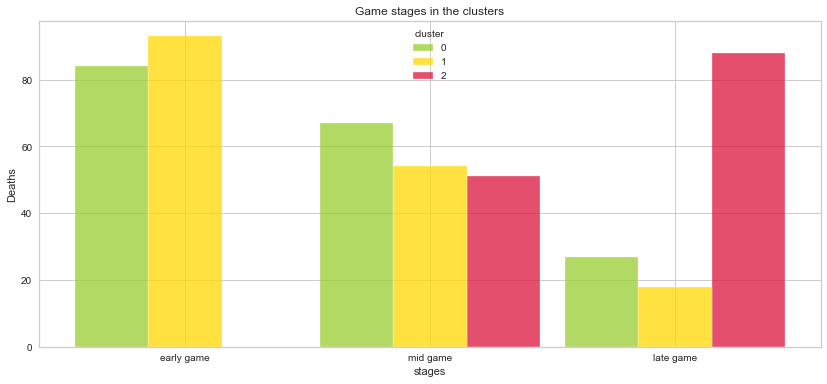

In [181]:
stagesPerClusterV2(blueSideVictory_df, colors)

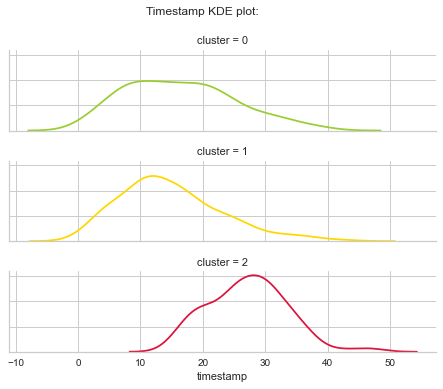

In [182]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [183]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Udyr           18
Nunu           17
Lillia         14
Ekko            7
Sylas           7
Warwick         6
Viego           5
MasterYi        5
RekSai          5
Shyvana         4
Sejuani         3
Elise           3
Vi              3
Rammus          1
Rengar          1
Hecarim         1
Graves          1
Trundle         1
Jayce           1
Nidalee         1

Deaths with each champion:

In [184]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Udyr        103
Nunu         61
Lillia       56
Sylas        41
Warwick      39
RekSai       34
MasterYi     30
Ekko         19
Viego        18
Shyvana      14
Vi           13
Elise        10
Sejuani      10
Rengar        8
Jayce         7
Graves        7
Rammus        5
Nidalee       3
Trundle       2
Hecarim       2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [185]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 20 champions when they won on the red side

Cluster 0 - died with 20 champions:
 ['Ekko' 'Elise' 'Graves' 'Hecarim' 'Jayce' 'Lillia' 'MasterYi' 'Nidalee'
 'Nunu' 'Rammus' 'RekSai' 'Rengar' 'Sejuani' 'Shyvana' 'Sylas' 'Trundle'
 'Udyr' 'Vi' 'Viego' 'Warwick']
Udyr        33
Nunu        19
Sylas       17
Lillia      15
Warwick     14
MasterYi    14
RekSai      13
Shyvana     10
Vi           9
Viego        9
Elise        6
Ekko         4
Graves       4
Jayce        3
Rengar       2
Rammus       2
Nidalee      1
Trundle      1
Sejuani      1
Hecarim      1
Name: champion, dtype: int64

Cluster 1 - died with 19 champions:
 ['Ekko' 'Elise' 'Graves' 'Hecarim' 'Lillia' 'MasterYi' 'Nidalee' 'Nunu'
 'Rammus' 'RekSai' 'Rengar' 'Sejuani' 'Shyvana' 'Sylas' 'Trundle' 'Udyr'
 'Vi' 'Viego' 'Warwick']
Udyr        41
Lillia      27
Nunu        26
Sylas       13
RekSai      13
Warwick     10
Viego        6
MasterYi     6
Rengar       5
Sejuani      4
Shyvana      3
Vi           2
E

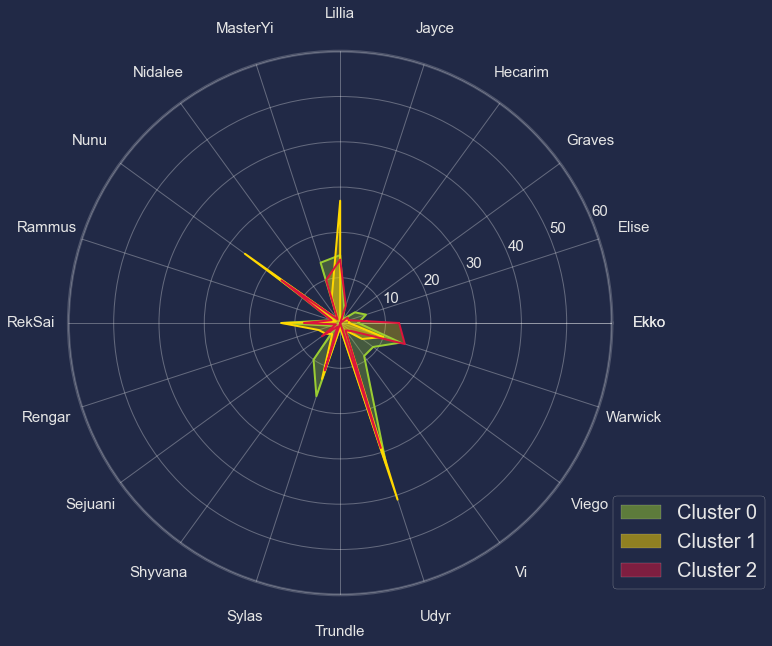

In [186]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
#### Clustering Blue Team Defeat

In [187]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region champion  timestamp  \
372114  EUW1_6284036967  Blue   anonymous 90   euw1     Ekko  15.944050   
372122  EUW1_6284036967  Blue   anonymous 90   euw1     Ekko  20.620883   
372129  EUW1_6284036967  Blue   anonymous 90   euw1     Ekko  24.480483   
372137  EUW1_6284036967  Blue   anonymous 90   euw1     Ekko  28.875567   
373168  EUW1_6280755634  Blue   anonymous 90   euw1   LeeSin   9.254633   
...                 ...   ...            ...    ...      ...        ...   
636723  EUW1_6289840126  Blue  anonymous 106   euw1     Nunu  30.352950   
636905  EUW1_6289671897  Blue  anonymous 106   euw1  Warwick  17.572117   
636910  EUW1_6289671897  Blue  anonymous 106   euw1  Warwick  20.275300   
636914  EUW1_6289671897  Blue  anonymous 106   euw1  Warwick  22.275017   
636918  EUW1_6289671897  Blue  anonymous 106   euw1  Warwick  25.318117   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
372114        4630.0        9924.0    NaN            NaN  ...   
372122        3116.0        9071.0    NaN            NaN  ...   
372129        9663.0        4137.0    NaN            NaN  ...   
372137        4688.0        5044.0    NaN            NaN  ...   
373168        7933.0        7936.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
636723        2704.0        1497.0    NaN            NaN  ...   
636905       10905.0        3597.0    NaN            NaN  ...   
636910        1157.0        7303.0    NaN            NaN  ...   
636914        3669.0        6431.0    NaN            NaN  ...   
636918        2012.0        3986.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
372114              NaN    False      Death        NaN           NaN   NaN   
372122              NaN    False      Death        NaN           NaN   NaN   
372129              NaN    False      Death        NaN           NaN   NaN   
372137              NaN    False      Death        NaN           NaN   NaN   
373168              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
636723              NaN    False      Death        NaN           NaN   NaN   
636905              NaN    False      Death        NaN           NaN   NaN   
636910              NaN    False      Death        NaN           NaN   NaN   
636914              NaN    False      Death        NaN           NaN   NaN   
636918              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
372114      NaN       NaN  JUNGLE  Bronze  
372122      NaN       NaN  JUNGLE  Bronze  
372129      NaN       NaN  JUNGLE  Bronze  
372137      NaN       NaN  JUNGLE  Bronze  
373168      NaN       NaN  JUNGLE  Bronze  
...         ...       ...     ...     ...  
636723      NaN       NaN  JUNGLE  Bronze  
636905      NaN       NaN  JUNGLE  Bronze  
636910      NaN       NaN  JUNGLE  Bronze  
636914      NaN       NaN  JUNGLE  Bronze  
636918      NaN       NaN  JUNGLE  Bronze  

[938 rows x 56 columns]

In [188]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)].copy()

In [189]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 106 lost 22 matches on the blue side
anonymous 106 has an average of 7.5 deaths per game when losing on the blue side

anonymous 114 lost 8 matches on the blue side
anonymous 114 has an average of 9.625 deaths per game when losing on the blue side

anonymous 115 lost 12 matches on the blue side
anonymous 115 has an average of 9.833333333333334 deaths per game when losing on the blue side

anonymous 118 lost 6 matches on the blue side
anonymous 118 has an average of 8.5 deaths per game when losing on the blue side

anonymous 90 lost 14 matches on the blue side
anonymous 90 has an average of 6.428571428571429 deaths per game when losing on the blue side

anonymous 93 lost 14 matches on the blue side
anonymous 93 has an average of 8.785714285714286 deaths per game when losing on the blue side

anonymous 94 lost 10 matches on the blue side
anonymous 94 has an average of 9.2 deaths per game when losing on the blue side

anonymous 96 lost 23 matches on the blue side
anonymous 96 ha

In [190]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 109 matches in which the jungler died at least once
8 players died a total of 938 times on the blue side
Defeat games on blue side contains an average of 8.605504587155963 deaths per game


In [191]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
372114        4630.0        9924.0  15.944050
372122        3116.0        9071.0  20.620883
372129        9663.0        4137.0  24.480483
372137        4688.0        5044.0  28.875567
373168        7933.0        7936.0   9.254633
...              ...           ...        ...
636723        2704.0        1497.0  30.352950
636905       10905.0        3597.0  17.572117
636910        1157.0        7303.0  20.275300
636914        3669.0        6431.0  22.275017
636918        2012.0        3986.0  25.318117

[938 rows x 3 columns]

Time discretization

In [192]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [193]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [194]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [195]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [196]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
372114     -0.665877      1.215929          0
372122     -1.107309      0.942200          0
372129      0.801579     -0.641125          0
372137     -0.648966     -0.350068          1
373168      0.297168      0.577978         -1
...              ...           ...        ...
636723     -1.227434     -1.488304          1
636905      1.163705     -0.814412          0
636910     -1.678488      0.374847          0
636914     -0.946072      0.095022          0
636918     -1.429199     -0.689582          1

[938 rows x 3 columns]

In [197]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3037593953608681
Silhouette score for k=3: 0.32984851958273204
Silhouette score for k=4: 0.3196757774433829
Silhouette score for k=5: 0.31772069744637405
Silhouette score for k=6: 0.3269085656168338
Silhouette score for k=7: 0.3244712257253963
Silhouette score for k=8: 0.314420167323256
Silhouette score for k=9: 0.31934714602775705
Silhouette score for k=10: 0.3305683705142406
Silhouette score for k=11: 0.34352792837083795
Silhouette score for k=12: 0.34423776713864396
Silhouette score for k=13: 0.359563501902241
Silhouette score for k=14: 0.3693132226725276
Silhouette score for k=15: 0.3693439297483868
Silhouette score for k=16: 0.376358882238912
Silhouette score for k=17: 0.3823124868153413
Silhouette score for k=18: 0.3893692556978243
Silhouette score for k=19: 0.39497684081393447
Silhouette score for k=20: 0.3925099825732741
Silhouette score for k=25: 0.39371172183977443


K-Means with k = 3

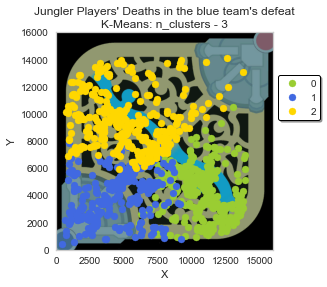

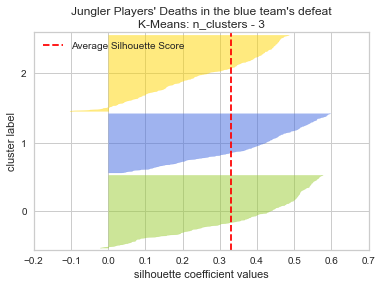

Silhouette score: 0.32984851958273204
2    343
0    328
1    267
Name: cluster, dtype: int64

Inertia: 1124.9581161363562

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10484.920732   4289.201220  -0.350610
1        1   4622.902622   4134.996255   0.625468
2        2   5282.110787   9456.635569  -0.172012

In [198]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "royalblue", "gold"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [199]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1776.074177   1763.246921   0.721364
1        1   2143.523521   1742.554082   0.491679
2        2   2575.375901   1953.076823   0.726129

In [200]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13938.0            5699.0           10536.0   
1        1            9216.0             435.0            7825.0   
2        2           13780.0             774.0           14110.0   

   min coordinate_y  max timestamp  min timestamp  
0             922.0              1             -1  
1             462.0              1             -1  
2            5940.0              1             -1

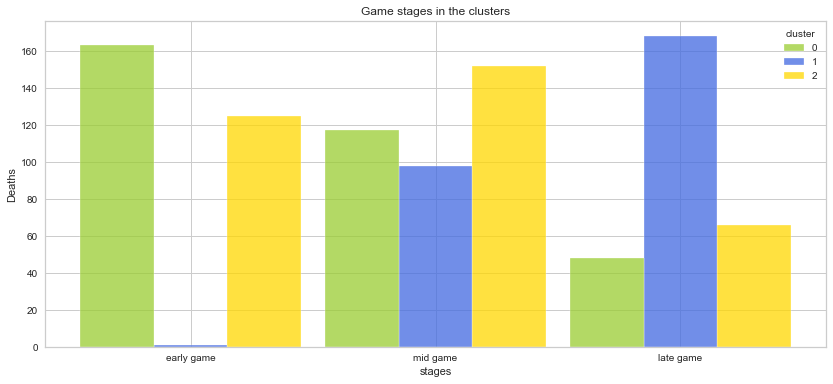

In [201]:
stagesPerClusterV2(blueSideDefeat_df, colors)

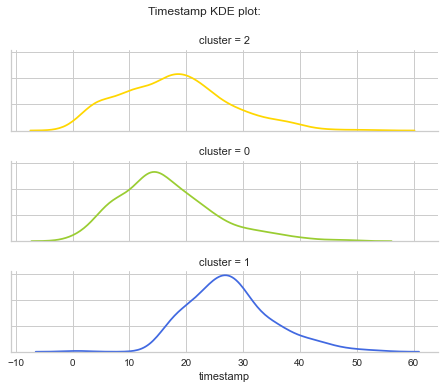

In [202]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [203]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Nunu              24
Lillia            13
Sylas             13
Ekko              11
Udyr               8
RekSai             6
Amumu              4
Viego              3
Warwick            3
Hecarim            3
Kayn               2
Kindred            2
Jayce              2
Elise              2
LeeSin             1
Shyvana            1
Zed                1
Rammus             1
Belveth            1
JarvanIV           1
Volibear           1
Mordekaiser        1
Nidalee            1
MasterYi           1
Shaco              1
XinZhao            1
Rengar             1

Deaths with each champion:

In [204]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Nunu           189
Sylas          126
Lillia         113
Udyr            78
Ekko            74
RekSai          70
Viego           32
Hecarim         27
Amumu           26
Warwick         24
Kayn            18
Kindred         18
Jayce           16
Rengar          13
MasterYi        13
Elise           12
Zed             12
JarvanIV        11
Mordekaiser     11
LeeSin          11
Shaco            9
Rammus           8
Shyvana          8
XinZhao          7
Nidalee          6
Belveth          5
Volibear         1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [205]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 27 champions when they won on the red side

Cluster 0 - died with 26 champions:
 ['Amumu' 'Belveth' 'Ekko' 'Elise' 'Hecarim' 'JarvanIV' 'Jayce' 'Kayn'
 'Kindred' 'LeeSin' 'Lillia' 'MasterYi' 'Mordekaiser' 'Nidalee' 'Nunu'
 'Rammus' 'RekSai' 'Rengar' 'Shaco' 'Shyvana' 'Sylas' 'Udyr' 'Viego'
 'Warwick' 'XinZhao' 'Zed']
Nunu           74
Lillia         43
Sylas          36
RekSai         32
Udyr           23
Ekko           18
Viego          13
Amumu           9
MasterYi        8
Kindred         8
Zed             6
Kayn            6
Mordekaiser     6
Hecarim         5
Jayce           5
Shyvana         5
Warwick         5
Rammus          4
JarvanIV        4
Elise           4
Rengar          3
LeeSin          3
Nidalee         3
Shaco           2
XinZhao         2
Belveth         1
Name: champion, dtype: int64

Cluster 1 - died with 26 champions:
 ['Amumu' 'Belveth' 'Ekko' 'Elise' 'Hecarim' 'JarvanIV' 'Jayce' 'Kayn'
 'Kindred' 'LeeSin' 'Lillia' 'MasterYi' 'Mordekaiser'

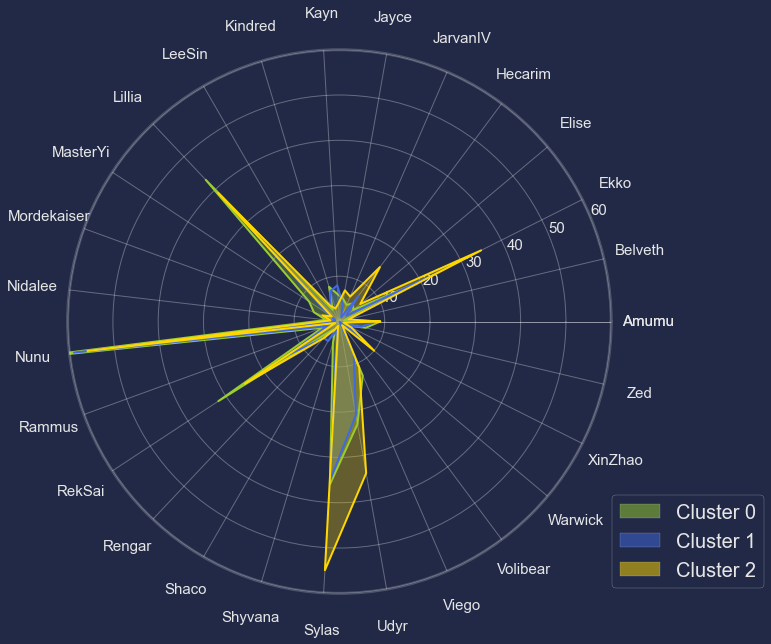

In [206]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
### Silver Players

#### Clustering Red Team Victory

In [207]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
17265   EUW1_6280166048  Red  anonymous 141   euw1    Amumu   9.028450   
17270   EUW1_6280166048  Red  anonymous 141   euw1    Amumu  11.092467   
17279   EUW1_6280166048  Red  anonymous 141   euw1    Amumu  15.345767   
17282   EUW1_6280166048  Red  anonymous 141   euw1    Amumu  16.801517   
17288   EUW1_6280166048  Red  anonymous 141   euw1    Amumu  18.162467   
...                 ...  ...            ...    ...      ...        ...   
632258  EUW1_6287909210  Red   anonymous 81   euw1     Ekko  26.688667   
632262  EUW1_6287909210  Red   anonymous 81   euw1     Ekko  28.164217   
632267  EUW1_6287909210  Red   anonymous 81   euw1     Ekko  30.177883   
632278  EUW1_6287909210  Red   anonymous 81   euw1     Ekko  35.232717   
632285  EUW1_6287909210  Red   anonymous 81   euw1     Ekko  37.092050   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
17265         6654.0        4771.0    NaN            NaN  ...   
17270         2268.0        9910.0    NaN            NaN  ...   
17279         3558.0       10579.0    NaN            NaN  ...   
17282         4941.0        4742.0    NaN            NaN  ...   
17288         8189.0        5163.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
632258        4051.0        2230.0    NaN            NaN  ...   
632262        9910.0        5887.0    NaN            NaN  ...   
632267        4817.0        9158.0    NaN            NaN  ...   
632278        3441.0        2548.0    NaN            NaN  ...   
632285        1876.0        7577.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
17265               NaN     True      Death        NaN           NaN   NaN   
17270               NaN     True      Death        NaN           NaN   NaN   
17279               NaN     True      Death        NaN           NaN   NaN   
17282               NaN     True      Death        NaN           NaN   NaN   
17288               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
632258              NaN     True      Death        NaN           NaN   NaN   
632262              NaN     True      Death        NaN           NaN   NaN   
632267              NaN     True      Death        NaN           NaN   NaN   
632278              NaN     True      Death        NaN           NaN   NaN   
632285              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
17265       NaN       NaN  JUNGLE  Silver  
17270       NaN       NaN  JUNGLE  Silver  
17279       NaN       NaN  JUNGLE  Silver  
17282       NaN       NaN  JUNGLE  Silver  
17288       NaN       NaN  JUNGLE  Silver  
...         ...       ...     ...     ...  
632258      NaN       NaN  JUNGLE  Silver  
632262      NaN       NaN  JUNGLE  Silver  
632267      NaN       NaN  JUNGLE  Silver  
632278      NaN       NaN  JUNGLE  Silver  
632285      NaN       NaN  JUNGLE  Silver  

[674 rows x 56 columns]

In [208]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)].copy()

In [209]:
redSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [210]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

122

In [211]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

48.41269841269841

In [212]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

10.759897828863346

In [213]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 141 won 4 matches on the red side
anonymous 141 has an average of 3.25 deaths per game when winning on the red side

anonymous 65 won 8 matches on the red side
anonymous 65 has an average of 4.875 deaths per game when winning on the red side

anonymous 66 won 34 matches on the red side
anonymous 66 has an average of 5.205882352941177 deaths per game when winning on the red side

anonymous 68 won 9 matches on the red side
anonymous 68 has an average of 8.88888888888889 deaths per game when winning on the red side

anonymous 71 won 11 matches on the red side
anonymous 71 has an average of 6.545454545454546 deaths per game when winning on the red side

anonymous 78 won 14 matches on the red side
anonymous 78 has an average of 2.857142857142857 deaths per game when winning on the red side

anonymous 79 won 17 matches on the red side
anonymous 79 has an average of 5.0588235294117645 deaths per game when winning on the red side

anonymous 81 won 25 matches on the red side
anonymous

In [214]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 122 matches in which the jungler died at least once
8 players died a total of 674 times on the red side
Victory games on red side contains an average of 5.524590163934426 deaths per game


In [215]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
17265         6654.0        4771.0   9.028450
17270         2268.0        9910.0  11.092467
17279         3558.0       10579.0  15.345767
17282         4941.0        4742.0  16.801517
17288         8189.0        5163.0  18.162467
...              ...           ...        ...
632258        4051.0        2230.0  26.688667
632262        9910.0        5887.0  28.164217
632267        4817.0        9158.0  30.177883
632278        3441.0        2548.0  35.232717
632285        1876.0        7577.0  37.092050

[674 rows x 3 columns]

Time discretization

In [216]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [217]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [218]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [219]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [220]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
17265      -0.030039     -0.375056         -1
17270      -1.285148      1.170756         -1
17279      -0.915998      1.371992          0
17282      -0.520235     -0.383780          0
17288       0.409221     -0.257143          0
...              ...           ...        ...
632258     -0.774920     -1.139390          1
632262      0.901707     -0.039363          1
632267     -0.555719      0.944554          1
632278     -0.949479     -1.043735          1
632285     -1.397323      0.468989          1

[674 rows x 3 columns]

In [221]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3221082320349807
Silhouette score for k=3: 0.33882207956274357
Silhouette score for k=4: 0.3369333977719224
Silhouette score for k=5: 0.32166394046329383
Silhouette score for k=6: 0.3272797533331541
Silhouette score for k=7: 0.32332254066459754
Silhouette score for k=8: 0.33120895615137985
Silhouette score for k=9: 0.33831216120659324
Silhouette score for k=10: 0.33217150132748535
Silhouette score for k=11: 0.34571770062553303
Silhouette score for k=12: 0.3505608347264548
Silhouette score for k=13: 0.36314974042444836
Silhouette score for k=14: 0.36670981709512335
Silhouette score for k=15: 0.37693083115944737
Silhouette score for k=16: 0.38364219221978946
Silhouette score for k=17: 0.3763522829446202
Silhouette score for k=18: 0.37666088165790274
Silhouette score for k=19: 0.38008495323581154
Silhouette score for k=20: 0.39122395247234926
Silhouette score for k=25: 0.390848685335339


K-Means with k = 3

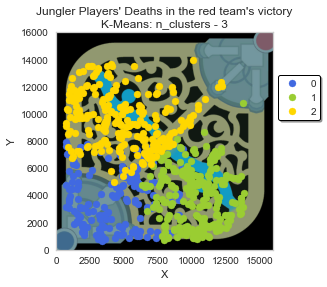

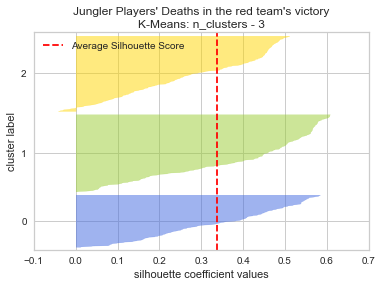

Silhouette score: 0.33882207956274357
1    254
2    248
0    172
Name: cluster, dtype: int64

Inertia: 785.8585648207843

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4412.889535   3967.296512   0.668605
1        1  10198.204724   3984.767717  -0.488189
2        2   4863.649194   9522.310484  -0.221774

In [222]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "yellowgreen", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [223]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2308.158713   2023.151947   0.470715
1        1   1750.289552   1959.320641   0.650453
2        2   2613.702253   1958.361186   0.709391

In [224]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            9322.0             707.0            7906.0   
1        1           13861.0            6348.0           10796.0   
2        2           12221.0             765.0           13984.0   

   min coordinate_y  max timestamp  min timestamp  
0             612.0              1              0  
1             755.0              1             -1  
2            4962.0              1             -1

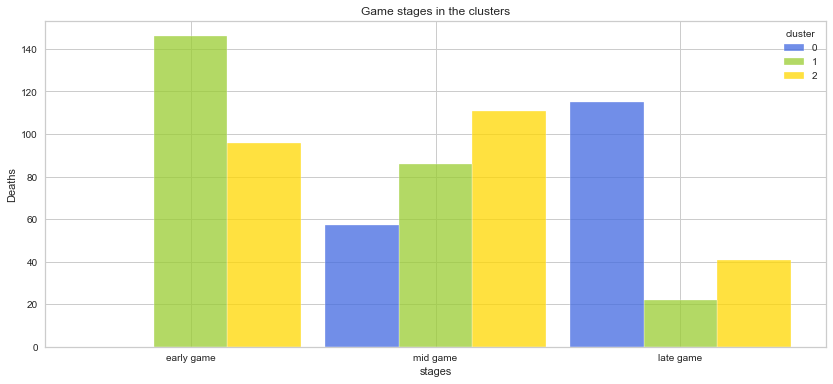

In [225]:
stagesPerClusterV2(redSideVictory_df, colors)

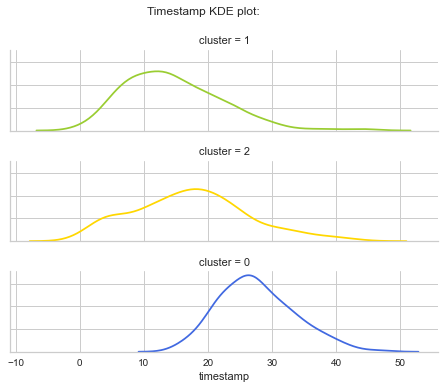

In [226]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [227]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Diana              15
Rengar             12
Ekko               12
Viego              12
MasterYi           12
Belveth            11
LeeSin              9
Jax                 9
Nocturne            7
Amumu               6
Vi                  3
Kayn                3
Shyvana             2
Ivern               1
JarvanIV            1
Warwick             1
Skarner             1
Mordekaiser         1
Rammus              1
FiddleSticks        1
Lillia              1
Zeri                1

Deaths with each champion:

In [228]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Rengar          87
MasterYi        79
Ekko            68
Viego           67
Jax             62
Nocturne        57
Diana           52
Belveth         48
LeeSin          44
Amumu           29
Kayn            21
Vi              17
Zeri             9
Skarner          7
Warwick          7
Shyvana          6
Lillia           4
Ivern            3
Mordekaiser      3
Rammus           2
JarvanIV         1
FiddleSticks     1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [229]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 22 champions when they won on the red side

Cluster 0 - died with 17 champions:
 ['Amumu' 'Belveth' 'Diana' 'Ekko' 'Ivern' 'Jax' 'Kayn' 'LeeSin' 'Lillia'
 'MasterYi' 'Nocturne' 'Rengar' 'Shyvana' 'Skarner' 'Vi' 'Viego' 'Warwick']
Ekko        24
Rengar      22
MasterYi    21
Viego       16
Nocturne    15
Jax         15
Belveth     12
Diana       11
LeeSin      10
Kayn         7
Amumu        5
Warwick      5
Vi           4
Shyvana      2
Skarner      1
Ivern        1
Lillia       1
Name: champion, dtype: int64

Cluster 1 - died with 18 champions:
 ['Amumu' 'Belveth' 'Diana' 'Ekko' 'Ivern' 'JarvanIV' 'Jax' 'Kayn' 'LeeSin'
 'Lillia' 'MasterYi' 'Nocturne' 'Rengar' 'Shyvana' 'Skarner' 'Vi' 'Viego'
 'Zeri']
Rengar      29
Viego       28
Ekko        28
MasterYi    25
Diana       23
Jax         21
Nocturne    21
Belveth     21
LeeSin      18
Amumu       13
Vi           7
Zeri         6
Kayn         5
Skarner      4
Shyvana      2
Ivern        1
JarvanIV     1
Lillia      

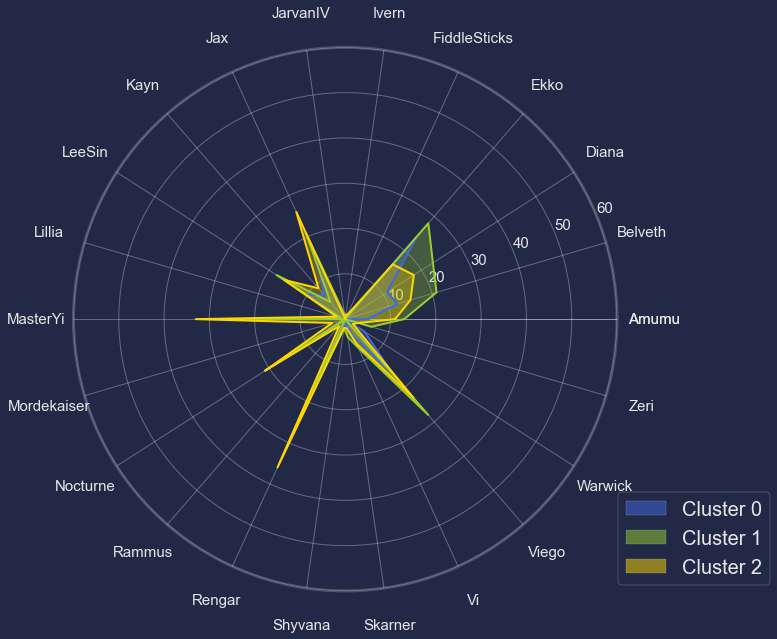

In [230]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
#### Clustering Red Team Defeat

In [231]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region champion  timestamp  \
17312   EUW1_6279782575  Red  anonymous 141   euw1  Shyvana   3.053800   
17323   EUW1_6279782575  Red  anonymous 141   euw1  Shyvana   9.616850   
17332   EUW1_6279782575  Red  anonymous 141   euw1  Shyvana  13.659550   
17336   EUW1_6279782575  Red  anonymous 141   euw1  Shyvana  15.899617   
17340   EUW1_6279782575  Red  anonymous 141   euw1  Shyvana  17.321967   
...                 ...  ...            ...    ...      ...        ...   
632086  EUW1_6289561195  Red   anonymous 79   euw1  Belveth  15.910633   
632092  EUW1_6289561195  Red   anonymous 79   euw1  Belveth  18.105183   
632097  EUW1_6289561195  Red   anonymous 79   euw1  Belveth  20.550417   
632110  EUW1_6289561195  Red   anonymous 79   euw1  Belveth  27.118767   
632114  EUW1_6289561195  Red   anonymous 79   euw1  Belveth  29.811150   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
17312        13182.0        8236.0    NaN            NaN  ...   
17323         8815.0        8261.0    NaN            NaN  ...   
17332        11903.0        1658.0    NaN            NaN  ...   
17336         1149.0       13290.0    NaN            NaN  ...   
17340         8327.0       10101.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
632086        6348.0       10070.0    NaN            NaN  ...   
632092        3845.0       13872.0    NaN            NaN  ...   
632097        7344.0        7952.0    NaN            NaN  ...   
632110        8896.0        8960.0    NaN            NaN  ...   
632114        9350.0       13352.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
17312               NaN    False      Death        NaN           NaN   NaN   
17323               NaN    False      Death        NaN           NaN   NaN   
17332               NaN    False      Death        NaN           NaN   NaN   
17336               NaN    False      Death        NaN           NaN   NaN   
17340               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
632086              NaN    False      Death        NaN           NaN   NaN   
632092              NaN    False      Death        NaN           NaN   NaN   
632097              NaN    False      Death        NaN           NaN   NaN   
632110              NaN    False      Death        NaN           NaN   NaN   
632114              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
17312       NaN       NaN  JUNGLE  Silver  
17323       NaN       NaN  JUNGLE  Silver  
17332       NaN       NaN  JUNGLE  Silver  
17336       NaN       NaN  JUNGLE  Silver  
17340       NaN       NaN  JUNGLE  Silver  
...         ...       ...     ...     ...  
632086      NaN       NaN  JUNGLE  Silver  
632092      NaN       NaN  JUNGLE  Silver  
632097      NaN       NaN  JUNGLE  Silver  
632110      NaN       NaN  JUNGLE  Silver  
632114      NaN       NaN  JUNGLE  Silver  

[1090 rows x 56 columns]

In [232]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)].copy()

In [233]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 141 lost 9 matches on the red side
anonymous 141 has an average of 6.333333333333333 deaths per game when losing on the red side

anonymous 65 lost 11 matches on the red side
anonymous 65 has an average of 8.181818181818182 deaths per game when losing on the red side

anonymous 66 lost 23 matches on the red side
anonymous 66 has an average of 8.869565217391305 deaths per game when losing on the red side

anonymous 68 lost 12 matches on the red side
anonymous 68 has an average of 9.916666666666666 deaths per game when losing on the red side

anonymous 71 lost 10 matches on the red side
anonymous 71 has an average of 11.0 deaths per game when losing on the red side

anonymous 78 lost 13 matches on the red side
anonymous 78 has an average of 5.769230769230769 deaths per game when losing on the red side

anonymous 79 lost 26 matches on the red side
anonymous 79 has an average of 8.73076923076923 deaths per game when losing on the red side

anonymous 81 lost 26 matches on the red 

In [234]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 130 matches in which the jungler died at least once
8 players died a total of 1090 times on the red side
Defeat games on red side contains an average of 8.384615384615385 deaths per game


In [235]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
17312        13182.0        8236.0   3.053800
17323         8815.0        8261.0   9.616850
17332        11903.0        1658.0  13.659550
17336         1149.0       13290.0  15.899617
17340         8327.0       10101.0  17.321967
...              ...           ...        ...
632086        6348.0       10070.0  15.910633
632092        3845.0       13872.0  18.105183
632097        7344.0        7952.0  20.550417
632110        8896.0        8960.0  27.118767
632114        9350.0       13352.0  29.811150

[1090 rows x 3 columns]

Time discretization

In [236]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [237]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [238]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [239]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [240]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
17312       1.411542      0.140109         -1
17323       0.171613      0.147236         -1
17332       1.048394     -1.735235         -1
17336      -2.005007      1.580970          0
17340       0.033054      0.671808          0
...              ...           ...        ...
632086     -0.528847      0.662970          0
632092     -1.239527      1.746894          0
632097     -0.246051      0.059142          0
632110      0.194611      0.346516          1
632114      0.323516      1.598646          1

[1090 rows x 3 columns]

In [241]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3265796019244313
Silhouette score for k=3: 0.3191309905474591
Silhouette score for k=4: 0.32949045116177866
Silhouette score for k=5: 0.31659687485598964
Silhouette score for k=6: 0.3184729893024748
Silhouette score for k=7: 0.3216965324174504
Silhouette score for k=8: 0.3242621653542857
Silhouette score for k=9: 0.32650581662290556
Silhouette score for k=10: 0.3452056297467067
Silhouette score for k=11: 0.35187087811672385
Silhouette score for k=12: 0.35039667190411
Silhouette score for k=13: 0.3514175195168661
Silhouette score for k=14: 0.35484107608827276
Silhouette score for k=15: 0.3593757935354483
Silhouette score for k=16: 0.359255237320038
Silhouette score for k=17: 0.35757829739311286
Silhouette score for k=18: 0.3527586688062601
Silhouette score for k=19: 0.36792667102662097
Silhouette score for k=20: 0.3735545876060997
Silhouette score for k=25: 0.38100096598693217


K-Means with k = 3

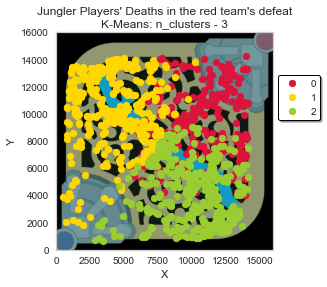

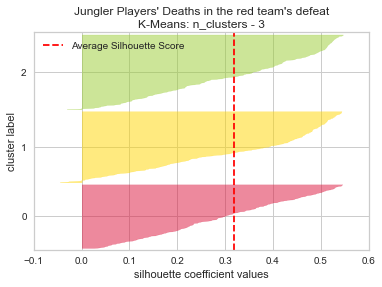

Silhouette score: 0.3191309905474591
2    389
1    370
0    331
Name: cluster, dtype: int64

Inertia: 1343.2672040270163

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10454.498489   8963.830816   0.679758
1        1   4318.572973  10173.624324  -0.208108
2        2  10003.151671   4396.637532  -0.475578

In [242]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "yellowgreen"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [243]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2124.117620   2582.506639   0.466569
1        1   2023.326703   2541.402629   0.722188
2        2   2262.504485   2137.985214   0.635331

In [244]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14153.0            5527.0           14242.0   
1        1           10236.0             530.0           14102.0   
2        2           14142.0            2878.0            9046.0   

   min coordinate_y  max timestamp  min timestamp  
0            4002.0              1              0  
1            1836.0              1             -1  
2             666.0              1             -1

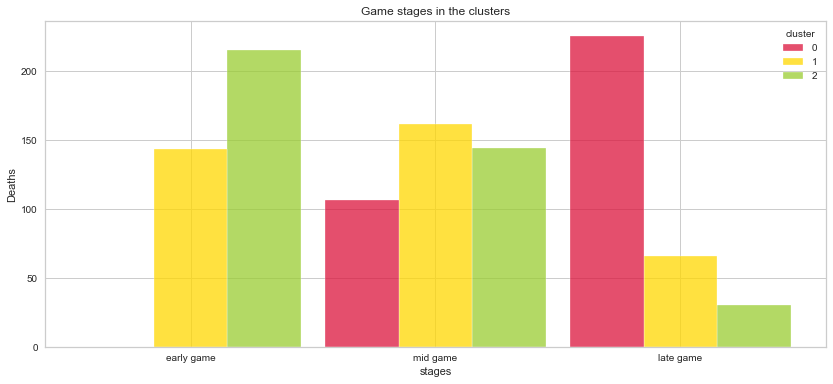

In [245]:
stagesPerClusterV2(redSideDefeat_df, colors)

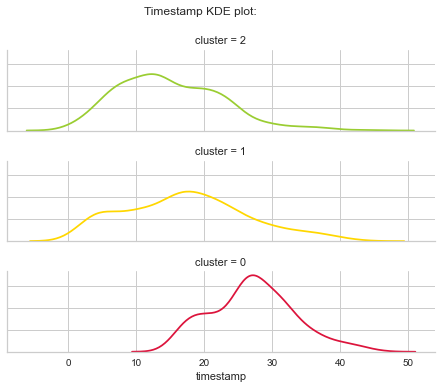

In [246]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [247]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Rengar             16
Diana              15
Ekko               15
MasterYi           12
LeeSin             10
Belveth            10
Jax                 9
Shyvana             7
Nocturne            6
Viego               5
Amumu               5
Khazix              3
Kayn                1
Kindred             1
Nautilus            1
FiddleSticks        1
Garen               1
Evelynn             1
JarvanIV            1
Skarner             1
Graves              1
Vi                  1
Maokai              1
XinZhao             1
Rammus              1
Zac                 1
Hecarim             1
Nunu                1
Volibear            1

Deaths with each champion:

In [248]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Ekko            127
Rengar          124
MasterYi        121
Diana           101
Jax              97
Belveth          81
LeeSin           78
Viego            62
Nocturne         57
Shyvana          39
Amumu            38
Khazix           19
Hecarim          15
Kayn             13
Maokai           13
Graves           12
Nunu             10
Nautilus          9
XinZhao           9
Vi                8
JarvanIV          8
Skarner           8
Evelynn           8
FiddleSticks      8
Volibear          7
Kindred           5
Garen             5
Rammus            4
Zac               4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [249]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 29 champions when they won on the red side

Cluster 0 - died with 28 champions:
 ['Amumu' 'Belveth' 'Diana' 'Ekko' 'Evelynn' 'FiddleSticks' 'Garen'
 'Graves' 'Hecarim' 'JarvanIV' 'Jax' 'Kayn' 'Khazix' 'Kindred' 'LeeSin'
 'Maokai' 'MasterYi' 'Nautilus' 'Nocturne' 'Nunu' 'Rengar' 'Shyvana'
 'Skarner' 'Vi' 'Viego' 'Volibear' 'XinZhao' 'Zac']
Ekko            38
Rengar          36
MasterYi        34
Diana           27
Viego           25
Jax             24
Belveth         23
Nocturne        19
LeeSin          18
Shyvana         12
Amumu           10
Hecarim          8
Graves           7
Maokai           5
Nautilus         5
FiddleSticks     5
Vi               5
Nunu             5
Evelynn          4
Khazix           4
Volibear         3
Kayn             3
JarvanIV         3
Kindred          2
Skarner          2
XinZhao          2
Zac              1
Garen            1
Name: champion, dtype: int64

Cluster 1 - died with 29 champions:
 ['Amumu' 'Belveth' 'Diana' 'Ekko' 'Ev

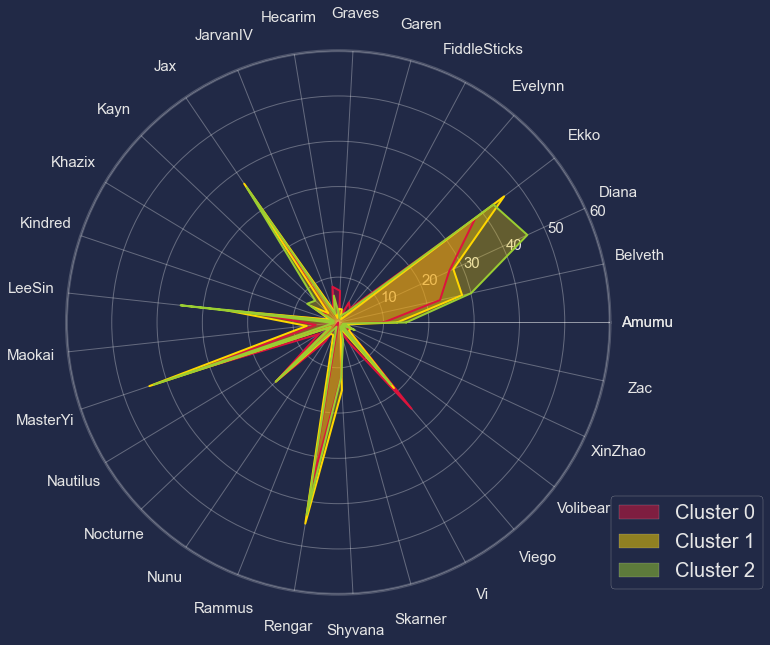

In [250]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
#### Clustering Blue Team Victory

In [251]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
17140   EUW1_6280261762  Blue  anonymous 141   euw1  Shyvana   5.604333   
17153   EUW1_6280261762  Blue  anonymous 141   euw1  Shyvana  11.015033   
17157   EUW1_6280261762  Blue  anonymous 141   euw1  Shyvana  13.092017   
17178   EUW1_6280261762  Blue  anonymous 141   euw1  Shyvana  22.101300   
17625   EUW1_6275084199  Blue  anonymous 141   euw1  Shyvana  13.379250   
...                 ...   ...            ...    ...      ...        ...   
630833  EUW1_6289887205  Blue   anonymous 71   euw1      Jax  34.197283   
630846  EUW1_6289887205  Blue   anonymous 71   euw1      Jax  38.437517   
632137  EUW1_6289489188  Blue   anonymous 79   euw1  Belveth   9.007050   
632161  EUW1_6289489188  Blue   anonymous 79   euw1  Belveth  18.388700   
632188  EUW1_6289489188  Blue   anonymous 79   euw1  Belveth  29.772700   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
17140        11773.0        1720.0    NaN            NaN  ...   
17153        13185.0        3861.0    NaN            NaN  ...   
17157        13342.0        7349.0    NaN            NaN  ...   
17178         7256.0        3824.0    NaN            NaN  ...   
17625         9309.0        4605.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
630833       13980.0        8634.0    NaN            NaN  ...   
630846       12167.0       12853.0    NaN            NaN  ...   
632137        2734.0        9871.0    NaN            NaN  ...   
632161       10202.0        5114.0    NaN            NaN  ...   
632188       12041.0        4946.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
17140               NaN     True      Death        NaN           NaN   NaN   
17153               NaN     True      Death        NaN           NaN   NaN   
17157               NaN     True      Death        NaN           NaN   NaN   
17178               NaN     True      Death        NaN           NaN   NaN   
17625               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
630833              NaN     True      Death        NaN           NaN   NaN   
630846              NaN     True      Death        NaN           NaN   NaN   
632137              NaN     True      Death        NaN           NaN   NaN   
632161              NaN     True      Death        NaN           NaN   NaN   
632188              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
17140       NaN       NaN  JUNGLE  Silver  
17153       NaN       NaN  JUNGLE  Silver  
17157       NaN       NaN  JUNGLE  Silver  
17178       NaN       NaN  JUNGLE  Silver  
17625       NaN       NaN  JUNGLE  Silver  
...         ...       ...     ...     ...  
630833      NaN       NaN  JUNGLE  Silver  
630846      NaN       NaN  JUNGLE  Silver  
632137      NaN       NaN  JUNGLE  Silver  
632161      NaN       NaN  JUNGLE  Silver  
632188      NaN       NaN  JUNGLE  Silver  

[659 rows x 56 columns]

In [252]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)].copy()

In [253]:
blueSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [254]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

124

In [255]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

52.76595744680851

In [256]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

11.579687225443683

In [257]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 141 won 5 matches on the blue side
anonymous 141 has an average of 3.4 deaths per game when winning on the blue side

anonymous 65 won 15 matches on the blue side
anonymous 65 has an average of 5.666666666666667 deaths per game when winning on the blue side

anonymous 66 won 24 matches on the blue side
anonymous 66 has an average of 5.875 deaths per game when winning on the blue side

anonymous 68 won 16 matches on the blue side
anonymous 68 has an average of 5.3125 deaths per game when winning on the blue side

anonymous 71 won 12 matches on the blue side
anonymous 71 has an average of 6.5 deaths per game when winning on the blue side

anonymous 78 won 20 matches on the blue side
anonymous 78 has an average of 3.45 deaths per game when winning on the blue side

anonymous 79 won 12 matches on the blue side
anonymous 79 has an average of 5.583333333333333 deaths per game when winning on the blue side

anonymous 81 won 20 matches on the blue side
anonymous 81 has an average of 

In [258]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 124 matches in which the jungler died at least once
8 players died a total of 659 times on the blue side
Victory games on blue side contains an average of 5.314516129032258 deaths per game


In [259]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
17140        11773.0        1720.0   5.604333
17153        13185.0        3861.0  11.015033
17157        13342.0        7349.0  13.092017
17178         7256.0        3824.0  22.101300
17625         9309.0        4605.0  13.379250
...              ...           ...        ...
630833       13980.0        8634.0  34.197283
630846       12167.0       12853.0  38.437517
632137        2734.0        9871.0   9.007050
632161       10202.0        5114.0  18.388700
632188       12041.0        4946.0  29.772700

[659 rows x 3 columns]

Time discretization

In [260]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [261]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [262]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [263]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [264]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
17140       0.812532     -1.824626         -1
17153       1.210579     -1.200476         -1
17157       1.254838     -0.183645         -1
17178      -0.460824     -1.211262          0
17625       0.117923     -0.983583         -1
...              ...           ...        ...
630833      1.434692      0.190961          1
630846      0.923602      1.420895          1
632137     -1.735589      0.551574         -1
632161      0.369663     -0.835198          0
632188      0.888082     -0.884174          1

[659 rows x 3 columns]

In [265]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.31749805302343975
Silhouette score for k=3: 0.3672621289452788
Silhouette score for k=4: 0.3353819482360453
Silhouette score for k=5: 0.3293250613466339
Silhouette score for k=6: 0.33648972893485957
Silhouette score for k=7: 0.32580720722718504
Silhouette score for k=8: 0.318880053935048
Silhouette score for k=9: 0.3280665997194525
Silhouette score for k=10: 0.3172615848520061
Silhouette score for k=11: 0.3307916376751615
Silhouette score for k=12: 0.358575891723082
Silhouette score for k=13: 0.3313710233217956
Silhouette score for k=14: 0.3678112923578887
Silhouette score for k=15: 0.3692081920210976
Silhouette score for k=16: 0.3680900419159798
Silhouette score for k=17: 0.3827265268296088
Silhouette score for k=18: 0.38454969494935054
Silhouette score for k=19: 0.3813647437855093
Silhouette score for k=20: 0.38539994692448803
Silhouette score for k=25: 0.3924296483965837


K-Means with k = 3

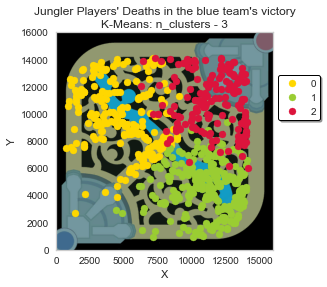

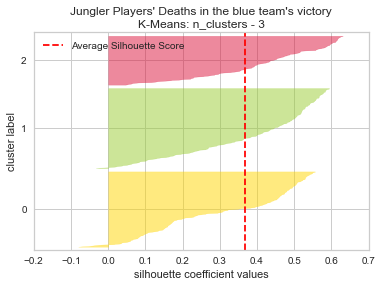

Silhouette score: 0.3672621289452788
1    258
0    243
2    158
Name: cluster, dtype: int64

Inertia: 733.0905918555694

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5080.613169   9692.337449  -0.382716
1        1  10942.713178   4611.755814  -0.360465
2        2  11399.715190  10842.145570   0.664557

In [266]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [267]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2160.889966   2360.427303   0.677102
1        1   1908.699940   1782.965737   0.719272
2        2   1963.784312   2022.583452   0.472145

In [268]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            9083.0             751.0           14082.0   
1        1           14033.0            4435.0            9406.0   
2        2           14103.0            6224.0           14117.0   

   min coordinate_y  max timestamp  min timestamp  
0            2711.0              1             -1  
1             960.0              1             -1  
2            6011.0              1              0

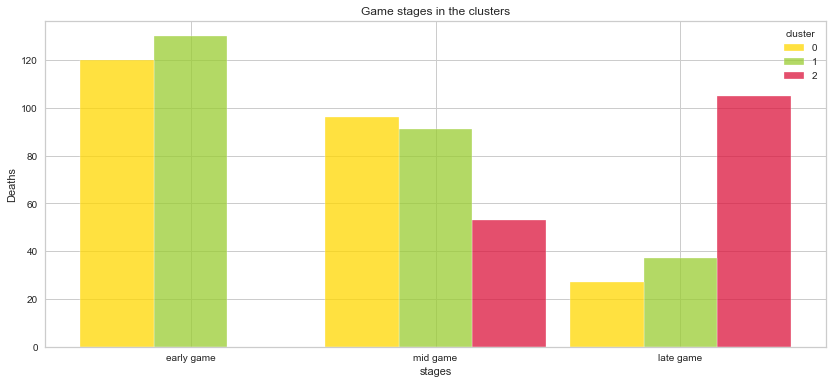

In [269]:
stagesPerClusterV2(blueSideVictory_df, colors)

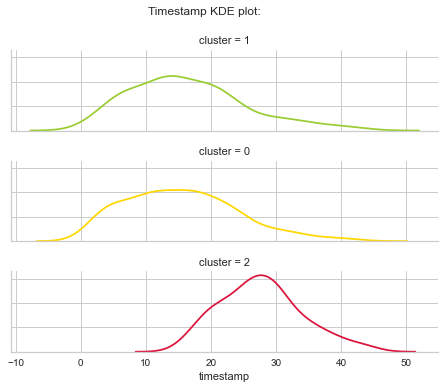

In [270]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [271]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Diana          23
Nocturne       13
Rengar         11
Ekko           11
MasterYi       11
LeeSin         11
Jax             7
Belveth         7
Viego           6
Shyvana         5
Amumu           4
Kayn            4
Hecarim         3
Skarner         2
Kindred         1
Warwick         1
JarvanIV        1
Evelynn         1
Khazix          1
Morgana         1

Deaths with each champion:

In [272]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Diana       100
Rengar       74
Nocturne     65
MasterYi     65
LeeSin       55
Ekko         50
Viego        39
Jax          37
Belveth      34
Kayn         33
Hecarim      25
Amumu        20
Shyvana      17
Skarner      16
Warwick       8
Morgana       7
Kindred       7
Evelynn       4
JarvanIV      2
Khazix        1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [273]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 20 champions when they won on the red side

Cluster 0 - died with 20 champions:
 ['Amumu' 'Belveth' 'Diana' 'Ekko' 'Evelynn' 'Hecarim' 'JarvanIV' 'Jax'
 'Kayn' 'Khazix' 'Kindred' 'LeeSin' 'MasterYi' 'Morgana' 'Nocturne'
 'Rengar' 'Shyvana' 'Skarner' 'Viego' 'Warwick']
Diana       36
MasterYi    30
Nocturne    27
Rengar      25
LeeSin      18
Ekko        16
Belveth     14
Hecarim     14
Kayn        11
Viego       10
Jax         10
Skarner      8
Amumu        5
Morgana      5
Shyvana      5
Kindred      5
JarvanIV     1
Warwick      1
Evelynn      1
Khazix       1
Name: champion, dtype: int64

Cluster 1 - died with 19 champions:
 ['Amumu' 'Belveth' 'Diana' 'Ekko' 'Evelynn' 'Hecarim' 'JarvanIV' 'Jax'
 'Kayn' 'Kindred' 'LeeSin' 'MasterYi' 'Morgana' 'Nocturne' 'Rengar'
 'Shyvana' 'Skarner' 'Viego' 'Warwick']
Diana       41
Rengar      32
LeeSin      24
Nocturne    22
Viego       20
MasterYi    19
Jax         18
Ekko        16
Kayn        14
Belveth     11
Shyvana     

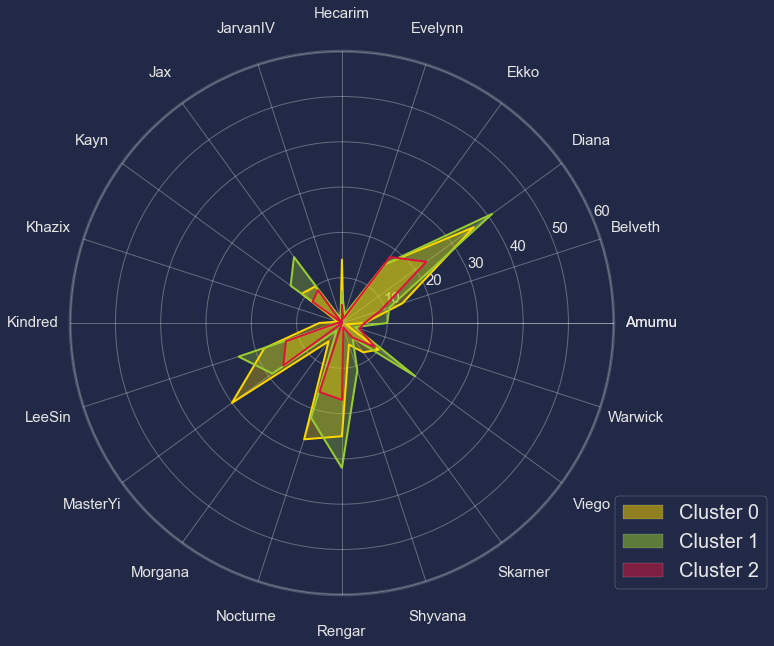

In [274]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
#### Clustering Blue Team Defeat

In [275]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region champion  timestamp  \
17203   EUW1_6280215883  Blue  anonymous 141   euw1    Amumu   6.896350   
17234   EUW1_6280215883  Blue  anonymous 141   euw1    Amumu  21.702650   
17244   EUW1_6280215883  Blue  anonymous 141   euw1    Amumu  27.226433   
17453   EUW1_6277855508  Blue  anonymous 141   euw1    Amumu  12.787850   
17460   EUW1_6277855508  Blue  anonymous 141   euw1    Amumu  15.402367   
...                 ...   ...            ...    ...      ...        ...   
631961  EUW1_6289738697  Blue   anonymous 79   euw1    Amumu  10.359383   
631967  EUW1_6289738697  Blue   anonymous 79   euw1    Amumu  13.603117   
631975  EUW1_6289738697  Blue   anonymous 79   euw1    Amumu  16.466783   
631978  EUW1_6289738697  Blue   anonymous 79   euw1    Amumu  17.698050   
631983  EUW1_6289738697  Blue   anonymous 79   euw1    Amumu  20.423133   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
17203        13288.0        4037.0    NaN            NaN  ...   
17234         3520.0        3612.0    NaN            NaN  ...   
17244         8008.0        7180.0    NaN            NaN  ...   
17453         3210.0       13350.0    NaN            NaN  ...   
17460        10109.0        4747.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
631961        7542.0        4806.0    NaN            NaN  ...   
631967       13834.0        3466.0    NaN            NaN  ...   
631975        7446.0        5106.0    NaN            NaN  ...   
631978        5771.0        6023.0    NaN            NaN  ...   
631983        4890.0        7513.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
17203               NaN    False      Death        NaN           NaN   NaN   
17234               NaN    False      Death        NaN           NaN   NaN   
17244               NaN    False      Death        NaN           NaN   NaN   
17453               NaN    False      Death        NaN           NaN   NaN   
17460               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
631961              NaN    False      Death        NaN           NaN   NaN   
631967              NaN    False      Death        NaN           NaN   NaN   
631975              NaN    False      Death        NaN           NaN   NaN   
631978              NaN    False      Death        NaN           NaN   NaN   
631983              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
17203       NaN       NaN  JUNGLE  Silver  
17234       NaN       NaN  JUNGLE  Silver  
17244       NaN       NaN  JUNGLE  Silver  
17453       NaN       NaN  JUNGLE  Silver  
17460       NaN       NaN  JUNGLE  Silver  
...         ...       ...     ...     ...  
631961      NaN       NaN  JUNGLE  Silver  
631967      NaN       NaN  JUNGLE  Silver  
631975      NaN       NaN  JUNGLE  Silver  
631978      NaN       NaN  JUNGLE  Silver  
631983      NaN       NaN  JUNGLE  Silver  

[909 rows x 56 columns]

In [276]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)].copy()

In [277]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 141 lost 9 matches on the blue side
anonymous 141 has an average of 6.777777777777778 deaths per game when losing on the blue side

anonymous 65 lost 8 matches on the blue side
anonymous 65 has an average of 8.375 deaths per game when losing on the blue side

anonymous 66 lost 20 matches on the blue side
anonymous 66 has an average of 8.35 deaths per game when losing on the blue side

anonymous 68 lost 15 matches on the blue side
anonymous 68 has an average of 8.533333333333333 deaths per game when losing on the blue side

anonymous 71 lost 11 matches on the blue side
anonymous 71 has an average of 10.727272727272727 deaths per game when losing on the blue side

anonymous 78 lost 17 matches on the blue side
anonymous 78 has an average of 5.823529411764706 deaths per game when losing on the blue side

anonymous 79 lost 13 matches on the blue side
anonymous 79 has an average of 8.846153846153847 deaths per game when losing on the blue side

anonymous 81 lost 18 matches on the b

In [278]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 111 matches in which the jungler died at least once
8 players died a total of 909 times on the blue side
Defeat games on blue side contains an average of 8.18918918918919 deaths per game


In [279]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
17203        13288.0        4037.0   6.896350
17234         3520.0        3612.0  21.702650
17244         8008.0        7180.0  27.226433
17453         3210.0       13350.0  12.787850
17460        10109.0        4747.0  15.402367
...              ...           ...        ...
631961        7542.0        4806.0  10.359383
631967       13834.0        3466.0  13.603117
631975        7446.0        5106.0  16.466783
631978        5771.0        6023.0  17.698050
631983        4890.0        7513.0  20.423133

[909 rows x 3 columns]

Time discretization

In [280]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [281]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [282]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [283]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [284]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
17203       1.738232     -0.781591         -1
17234      -1.043348     -0.908324          0
17244       0.234675      0.155631          1
17453      -1.131625      1.995485         -1
17460       0.832966     -0.569874          0
...              ...           ...        ...
631961      0.101975     -0.552281         -1
631967      1.893714     -0.951860         -1
631975      0.074638     -0.462823          0
631978     -0.402343     -0.189379          0
631983     -0.653220      0.254929          0

[909 rows x 3 columns]

In [285]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.28370352765228535
Silhouette score for k=3: 0.3061201556960568
Silhouette score for k=4: 0.33584608069378874
Silhouette score for k=5: 0.3183923997275152
Silhouette score for k=6: 0.3249738415873457
Silhouette score for k=7: 0.3332603143723821
Silhouette score for k=8: 0.32915215695701067
Silhouette score for k=9: 0.3298688595907946
Silhouette score for k=10: 0.33738240666202446
Silhouette score for k=11: 0.34442657441394
Silhouette score for k=12: 0.33720715580706745
Silhouette score for k=13: 0.3484990164302534
Silhouette score for k=14: 0.3502778050411295
Silhouette score for k=15: 0.3557497613181661
Silhouette score for k=16: 0.36713725215141924
Silhouette score for k=17: 0.3712238760487381
Silhouette score for k=18: 0.3786049775162591
Silhouette score for k=19: 0.37838611316411236
Silhouette score for k=20: 0.37852722984434184
Silhouette score for k=25: 0.38256662621504844


K-Means with k = 3

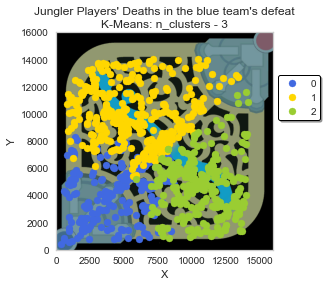

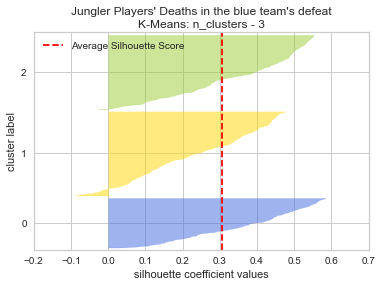

Silhouette score: 0.3061201556960568
1    368
2    324
0    217
Name: cluster, dtype: int64

Inertia: 1197.958187333555

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4461.797235   4236.672811   0.589862
1        1   5714.793478   9894.521739  -0.173913
2        2  10675.641975   4603.888889  -0.265432

In [286]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [287]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2214.804924   2025.505680   0.501140
1        1   2713.588405   2025.683557   0.798895
2        2   1828.209799   2024.754811   0.751896

In [288]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            9002.0             394.0            8276.0   
1        1           13395.0             824.0           14051.0   
2        2           14165.0            5886.0           11621.0   

   min coordinate_y  max timestamp  min timestamp  
0             461.0              1             -1  
1            5454.0              1             -1  
2             866.0              1             -1

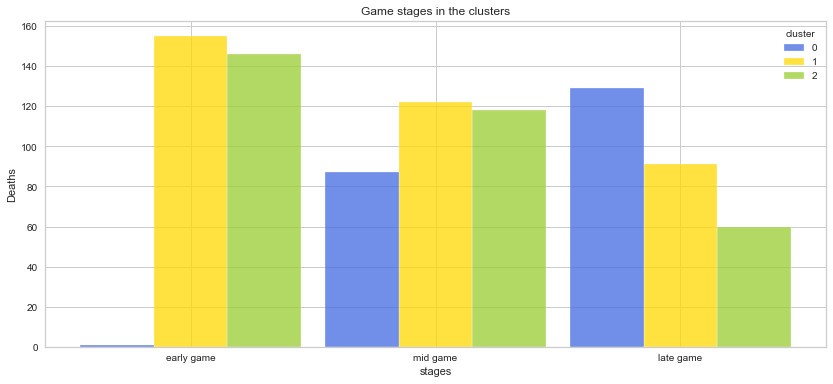

In [289]:
stagesPerClusterV2(blueSideDefeat_df, colors)

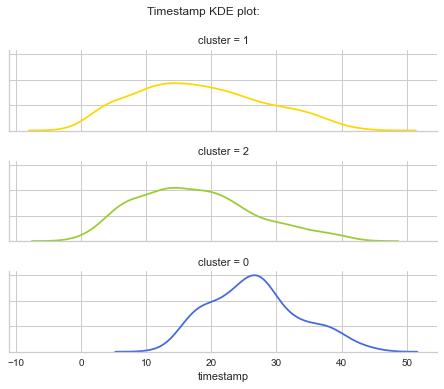

In [290]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [291]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Diana             17
Rengar            16
Nocturne          13
Jax               10
LeeSin             9
Shyvana            8
Amumu              6
Ekko               6
MasterYi           5
Belveth            4
Zac                3
Viego              1
Gragas             1
Mordekaiser        1
Kayn               1
Trundle            1
Khazix             1
Ivern              1
Evelynn            1
Rammus             1
Vi                 1
JarvanIV           1
Maokai             1
Elise              1
Taliyah            1

Deaths with each champion:

In [292]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Rengar         144
Diana          131
Nocturne       104
Jax            102
LeeSin          80
Shyvana         61
MasterYi        43
Ekko            40
Belveth         36
Amumu           35
Zac             18
Kayn            16
Vi              16
Viego           10
JarvanIV        10
Rammus           9
Mordekaiser      8
Maokai           7
Elise            7
Evelynn          6
Trundle          6
Gragas           5
Ivern            5
Khazix           5
Taliyah          5
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [293]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 25 champions when they won on the red side

Cluster 0 - died with 22 champions:
 ['Amumu' 'Belveth' 'Diana' 'Ekko' 'Elise' 'Evelynn' 'Gragas' 'Ivern'
 'JarvanIV' 'Jax' 'Kayn' 'LeeSin' 'Maokai' 'MasterYi' 'Mordekaiser'
 'Nocturne' 'Rammus' 'Rengar' 'Shyvana' 'Taliyah' 'Vi' 'Zac']
Rengar         42
Diana          25
Nocturne       24
Shyvana        20
LeeSin         17
Jax            14
MasterYi       12
Belveth        11
Ekko           10
Amumu           9
Zac             6
Vi              5
Mordekaiser     4
Kayn            4
Gragas          2
JarvanIV        2
Ivern           2
Rammus          2
Maokai          2
Taliyah         2
Elise           1
Evelynn         1
Name: champion, dtype: int64

Cluster 1 - died with 25 champions:
 ['Amumu' 'Belveth' 'Diana' 'Ekko' 'Elise' 'Evelynn' 'Gragas' 'Ivern'
 'JarvanIV' 'Jax' 'Kayn' 'Khazix' 'LeeSin' 'Maokai' 'MasterYi'
 'Mordekaiser' 'Nocturne' 'Rammus' 'Rengar' 'Shyvana' 'Taliyah' 'Trundle'
 'Vi' 'Viego' 'Zac']
Rengar 

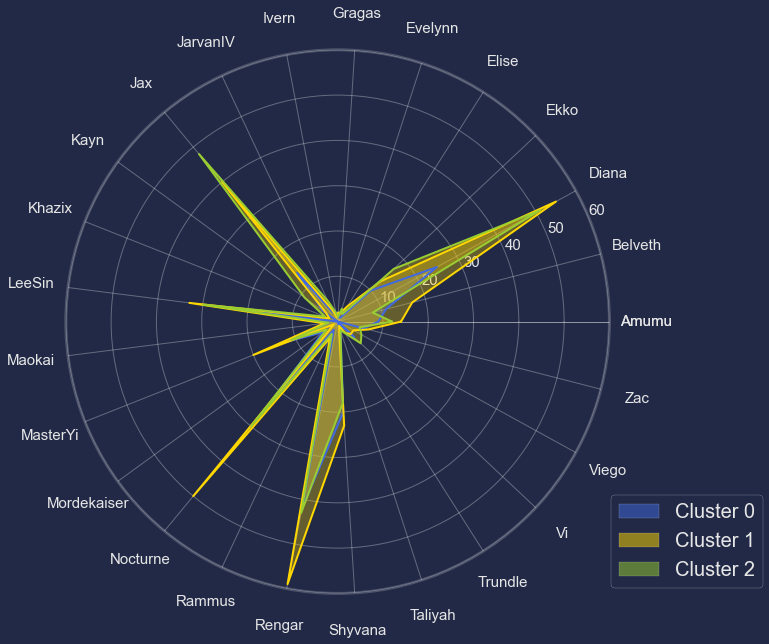

In [294]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
### Gold Players

#### Clustering Red Team Victory

In [295]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
3060    EUW1_6273443622  Red  anonymous 129   euw1    Elise  10.137967   
3165    EUW1_6273309297  Red  anonymous 129   euw1   Maokai   2.194633   
3167    EUW1_6273309297  Red  anonymous 129   euw1   Maokai   3.906483   
3169    EUW1_6273309297  Red  anonymous 129   euw1   Maokai   4.678950   
3188    EUW1_6273309297  Red  anonymous 129   euw1   Maokai  13.063800   
...                 ...  ...            ...    ...      ...        ...   
618242  EUW1_6287566776  Red  anonymous 172   euw1   Singed   8.078050   
618292  EUW1_6287566776  Red  anonymous 172   euw1   Singed  30.481917   
618296  EUW1_6287566776  Red  anonymous 172   euw1   Singed  32.250800   
618309  EUW1_6287566776  Red  anonymous 172   euw1   Singed  36.937917   
642948  EUW1_6289397856  Red  anonymous 172   euw1     Ekko  11.346367   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
3060          8142.0        6348.0    NaN            NaN  ...   
3165          7580.0       11652.0    NaN            NaN  ...   
3167          1263.0        9658.0    NaN            NaN  ...   
3169         10423.0        7698.0    NaN            NaN  ...   
3188          7051.0        7059.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
618242        8985.0        9907.0    NaN            NaN  ...   
618292        7334.0       10446.0    NaN            NaN  ...   
618296        7102.0        9438.0    NaN            NaN  ...   
618309        7009.0        1340.0    NaN            NaN  ...   
642948        5424.0       10756.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
3060                NaN     True      Death        NaN           NaN   NaN   
3165                NaN     True      Death        NaN           NaN   NaN   
3167                NaN     True      Death        NaN           NaN   NaN   
3169                NaN     True      Death        NaN           NaN   NaN   
3188                NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
618242              NaN     True      Death        NaN           NaN   NaN   
618292              NaN     True      Death        NaN           NaN   NaN   
618296              NaN     True      Death        NaN           NaN   NaN   
618309              NaN     True      Death        NaN           NaN   NaN   
642948              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
3060        NaN       NaN  JUNGLE  Gold  
3165        NaN       NaN  JUNGLE  Gold  
3167        NaN       NaN  JUNGLE  Gold  
3169        NaN       NaN  JUNGLE  Gold  
3188        NaN       NaN  JUNGLE  Gold  
...         ...       ...     ...   ...  
618242      NaN       NaN  JUNGLE  Gold  
618292      NaN       NaN  JUNGLE  Gold  
618296      NaN       NaN  JUNGLE  Gold  
618309      NaN       NaN  JUNGLE  Gold  
642948      NaN       NaN  JUNGLE  Gold  

[176 rows x 56 columns]

In [296]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)].copy()

In [297]:
redSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [298]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

37

In [299]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

39.361702127659576

In [300]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

2.80970625798212

In [301]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 129 won 4 matches on the red side
anonymous 129 has an average of 5.25 deaths per game when winning on the red side

anonymous 153 won 8 matches on the red side
anonymous 153 has an average of 8.0 deaths per game when winning on the red side

anonymous 172 won 15 matches on the red side
anonymous 172 has an average of 3.7333333333333334 deaths per game when winning on the red side

anonymous 173 won 9 matches on the red side
anonymous 173 has an average of 3.5555555555555554 deaths per game when winning on the red side

anonymous 179 won 1 matches on the red side
anonymous 179 has an average of 3.0 deaths per game when winning on the red side



In [302]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 37 matches in which the jungler died at least once
5 players died a total of 176 times on the red side
Victory games on red side contains an average of 4.756756756756757 deaths per game


In [303]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
3060          8142.0        6348.0  10.137967
3165          7580.0       11652.0   2.194633
3167          1263.0        9658.0   3.906483
3169         10423.0        7698.0   4.678950
3188          7051.0        7059.0  13.063800
...              ...           ...        ...
618242        8985.0        9907.0   8.078050
618292        7334.0       10446.0  30.481917
618296        7102.0        9438.0  32.250800
618309        7009.0        1340.0  36.937917
642948        5424.0       10756.0  11.346367

[176 rows x 3 columns]

Time discretization

In [304]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [305]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [306]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [307]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [308]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
3060        0.290354     -0.044160         -1
3165        0.125606      1.580739         -1
3167       -1.726196      0.969870         -1
3169        0.959020      0.369417         -1
3188       -0.029468      0.173657         -1
...              ...           ...        ...
618242      0.537476      1.046152         -1
618292      0.053492      1.211276          1
618296     -0.014517      0.902472          1
618309     -0.041780     -1.578378          1
642948     -0.506416      1.306246         -1

[176 rows x 3 columns]

In [309]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3116198204981125
Silhouette score for k=3: 0.340689888275204
Silhouette score for k=4: 0.3254184413052333
Silhouette score for k=5: 0.340046138056674
Silhouette score for k=6: 0.34223111882059026
Silhouette score for k=7: 0.36308002418851704
Silhouette score for k=8: 0.36955067884593523
Silhouette score for k=9: 0.3456228929549917
Silhouette score for k=10: 0.34697833122426824
Silhouette score for k=11: 0.3414162480589055
Silhouette score for k=12: 0.35403683613410203
Silhouette score for k=13: 0.37138543109382255
Silhouette score for k=14: 0.380507536195676
Silhouette score for k=15: 0.3919937187511339
Silhouette score for k=16: 0.37944999697684795
Silhouette score for k=17: 0.4089760247989338
Silhouette score for k=18: 0.41908499778929714
Silhouette score for k=19: 0.4271713081568123
Silhouette score for k=20: 0.4289898750699371
Silhouette score for k=25: 0.4315177520660943


K-Means with k = 3

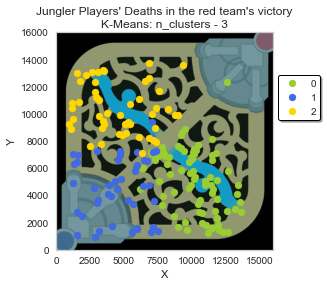

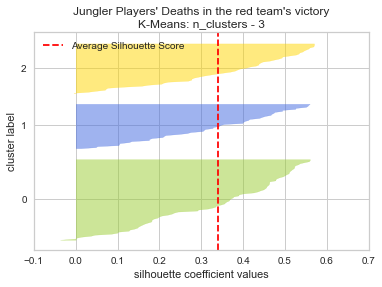

Silhouette score: 0.340689888275204
0    81
2    50
1    45
Name: cluster, dtype: int64

Inertia: 198.99981198535642

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10125.296296   5107.370370  -0.543210
1        1   4654.977778   4646.955556   0.444444
2        2   4580.900000  10396.160000  -0.560000

In [310]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "royalblue", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [311]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1829.687374   2262.826292   0.629509
1        1   1991.461512   2265.025660   0.496904
2        2   2329.164333   1783.605622   0.605310

In [312]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13649.0            6193.0           12330.0   
1        1            7512.0            1219.0            9438.0   
2        2            9382.0             968.0           13752.0   

   min coordinate_y  max timestamp  min timestamp  
0            1207.0              1             -1  
1             912.0              1              0  
2            7140.0              1             -1

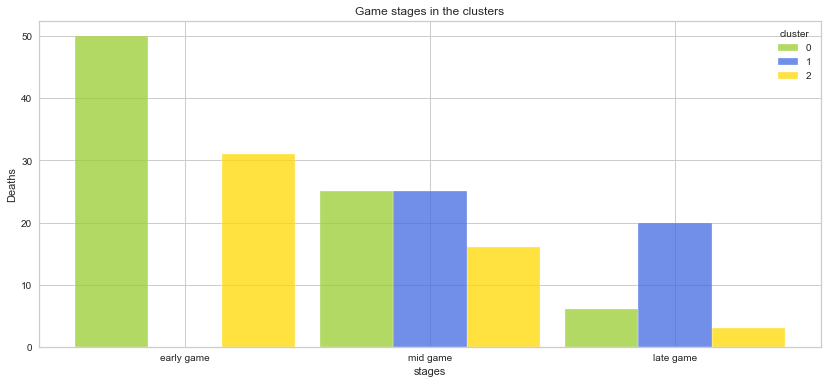

In [313]:
stagesPerClusterV2(redSideVictory_df, colors)

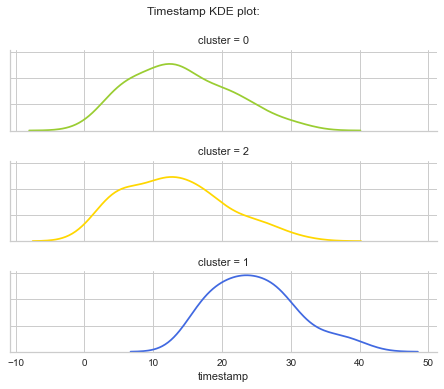

In [314]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [315]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Singed            7
Ekko              6
MonkeyKing        6
MasterYi          5
Belveth           3
Sylas             2
Evelynn           2
Maokai            1
Elise             1
Udyr              1
LeeSin            1
Jax               1
Zac               1

Deaths with each champion:

In [316]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



MasterYi      46
Ekko          26
Singed        20
Belveth       18
MonkeyKing    17
Sylas         15
Udyr          10
Maokai         8
Evelynn        8
LeeSin         3
Jax            2
Zac            2
Elise          1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [317]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 13 champions when they won on the red side

Cluster 0 - died with 13 champions:
 ['Belveth' 'Ekko' 'Elise' 'Evelynn' 'Jax' 'LeeSin' 'Maokai' 'MasterYi'
 'MonkeyKing' 'Singed' 'Sylas' 'Udyr' 'Zac']
MasterYi      18
Ekko          16
MonkeyKing     9
Belveth        8
Sylas          7
Udyr           6
Singed         4
Evelynn        4
Maokai         2
Jax            2
LeeSin         2
Zac            2
Elise          1
Name: champion, dtype: int64

Cluster 1 - died with 9 champions:
 ['Belveth' 'Ekko' 'Evelynn' 'Maokai' 'MasterYi' 'MonkeyKing' 'Singed'
 'Sylas' 'Udyr']
MasterYi      12
Singed         7
Ekko           6
Sylas          6
Maokai         3
Udyr           3
Belveth        3
Evelynn        3
MonkeyKing     2
Name: champion, dtype: int64

Cluster 2 - died with 10 champions:
 ['Belveth' 'Ekko' 'Evelynn' 'LeeSin' 'Maokai' 'MasterYi' 'MonkeyKing'
 'Singed' 'Sylas' 'Udyr']
MasterYi      16
Singed         9
Belveth        7
MonkeyKing     6
Ekko           4
Maoka

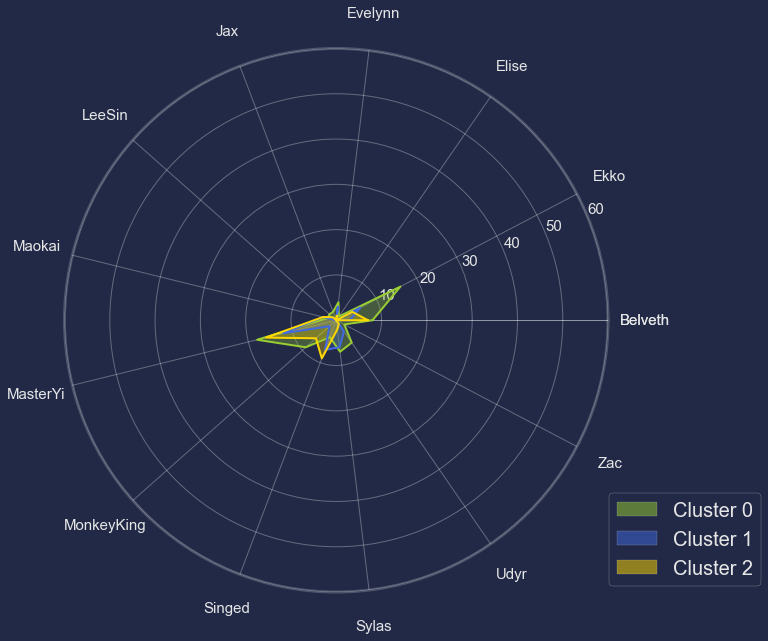

In [318]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
#### Clustering Red Team Defeat

In [319]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region    champion  timestamp  \
2889    EUW1_6274465314  Red  anonymous 129   euw1      Maokai  11.513217   
2920    EUW1_6274421335  Red  anonymous 129   euw1  MonkeyKing   8.982983   
2934    EUW1_6274421335  Red  anonymous 129   euw1  MonkeyKing  16.199850   
2940    EUW1_6274421335  Red  anonymous 129   euw1  MonkeyKing  19.408433   
2945    EUW1_6274421335  Red  anonymous 129   euw1  MonkeyKing  20.767800   
...                 ...  ...            ...    ...         ...        ...   
618691  EUW1_6287503036  Red  anonymous 172   euw1      Singed  31.602733   
618703  EUW1_6287503036  Red  anonymous 172   euw1      Singed  37.131050   
618744  EUW1_6287888157  Red  anonymous 173   euw1     Evelynn  22.854233   
618749  EUW1_6287888157  Red  anonymous 173   euw1     Evelynn  26.166817   
618753  EUW1_6287888157  Red  anonymous 173   euw1     Evelynn  28.940083   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
2889          6641.0        7209.0    NaN            NaN  ...   
2920          7920.0        7566.0    NaN            NaN  ...   
2934          7563.0       14015.0    NaN            NaN  ...   
2940          9840.0        5767.0    NaN            NaN  ...   
2945          9324.0        3640.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
618691        1396.0        6652.0    NaN            NaN  ...   
618703        4968.0        9572.0    NaN            NaN  ...   
618744       11768.0        3484.0    NaN            NaN  ...   
618749       10533.0        9783.0    NaN            NaN  ...   
618753        7887.0       13567.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
2889                NaN    False      Death        NaN           NaN   NaN   
2920                NaN    False      Death        NaN           NaN   NaN   
2934                NaN    False      Death        NaN           NaN   NaN   
2940                NaN    False      Death        NaN           NaN   NaN   
2945                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
618691              NaN    False      Death        NaN           NaN   NaN   
618703              NaN    False      Death        NaN           NaN   NaN   
618744              NaN    False      Death        NaN           NaN   NaN   
618749              NaN    False      Death        NaN           NaN   NaN   
618753              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
2889        NaN       NaN  JUNGLE  Gold  
2920        NaN       NaN  JUNGLE  Gold  
2934        NaN       NaN  JUNGLE  Gold  
2940        NaN       NaN  JUNGLE  Gold  
2945        NaN       NaN  JUNGLE  Gold  
...         ...       ...     ...   ...  
618691      NaN       NaN  JUNGLE  Gold  
618703      NaN       NaN  JUNGLE  Gold  
618744      NaN       NaN  JUNGLE  Gold  
618749      NaN       NaN  JUNGLE  Gold  
618753      NaN       NaN  JUNGLE  Gold  

[396 rows x 56 columns]

In [320]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)].copy()

In [321]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 129 lost 8 matches on the red side
anonymous 129 has an average of 5.375 deaths per game when losing on the red side

anonymous 153 lost 7 matches on the red side
anonymous 153 has an average of 10.714285714285714 deaths per game when losing on the red side

anonymous 172 lost 26 matches on the red side
anonymous 172 has an average of 6.615384615384615 deaths per game when losing on the red side

anonymous 173 lost 8 matches on the red side
anonymous 173 has an average of 5.125 deaths per game when losing on the red side

anonymous 179 lost 8 matches on the red side
anonymous 179 has an average of 8.125 deaths per game when losing on the red side



In [322]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 57 matches in which the jungler died at least once
5 players died a total of 396 times on the red side
Defeat games on red side contains an average of 6.947368421052632 deaths per game


In [323]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
2889          6641.0        7209.0  11.513217
2920          7920.0        7566.0   8.982983
2934          7563.0       14015.0  16.199850
2940          9840.0        5767.0  19.408433
2945          9324.0        3640.0  20.767800
...              ...           ...        ...
618691        1396.0        6652.0  31.602733
618703        4968.0        9572.0  37.131050
618744       11768.0        3484.0  22.854233
618749       10533.0        9783.0  26.166817
618753        7887.0       13567.0  28.940083

[396 rows x 3 columns]

Time discretization

In [324]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [325]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [326]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [327]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [328]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
2889       -0.594017     -0.160190         -1
2920       -0.177459     -0.049583         -1
2934       -0.293731      1.948467          0
2940        0.447866     -0.606955          0
2945        0.279810     -1.265949          0
...              ...           ...        ...
618691     -2.302263     -0.332761          1
618703     -1.138897      0.571923          1
618744      1.075797     -1.314281          0
618749      0.673570      0.637295          1
618753     -0.188207      1.809667          1

[396 rows x 3 columns]

In [329]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.2851760993051052
Silhouette score for k=3: 0.29306018049231713
Silhouette score for k=4: 0.3093339682393677
Silhouette score for k=5: 0.2977513856169874
Silhouette score for k=6: 0.30965227289871894
Silhouette score for k=7: 0.3142040625964216
Silhouette score for k=8: 0.31303994222780535
Silhouette score for k=9: 0.3221177892224582
Silhouette score for k=10: 0.3199777600885013
Silhouette score for k=11: 0.33708952080782983
Silhouette score for k=12: 0.3351660689477671
Silhouette score for k=13: 0.3441773016497813
Silhouette score for k=14: 0.349033459200487
Silhouette score for k=15: 0.3596237821047998
Silhouette score for k=16: 0.36087753289762575
Silhouette score for k=17: 0.36742137695508387
Silhouette score for k=18: 0.3640336718527755
Silhouette score for k=19: 0.3683015920261438
Silhouette score for k=20: 0.38704813614970623
Silhouette score for k=25: 0.4064677943413953


K-Means with k = 3

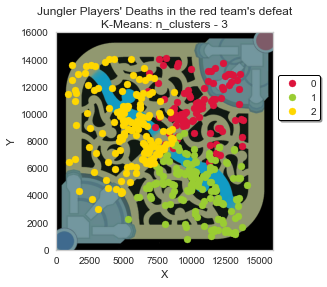

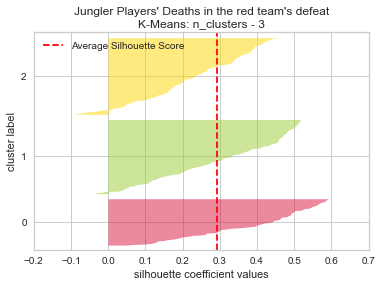

Silhouette score: 0.29306018049231713
2    154
1    149
0     93
Name: cluster, dtype: int64

Inertia: 524.2436852710568

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10496.569892  10536.021505   0.591398
1        1  10345.194631   4673.677852  -0.214765
2        2   5418.662338   8982.350649  -0.084416

In [330]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "yellowgreen", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [331]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1794.988528   1850.141808   0.512983
1        1   1903.231148   1845.835997   0.782045
2        2   1896.941709   2462.447501   0.772509

In [332]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           13800.0            6794.0           14138.0   
1        1           14094.0            5305.0            8625.0   
2        2            8708.0             903.0           14048.0   

   min coordinate_y  max timestamp  min timestamp  
0            6455.0              1             -1  
1             831.0              1             -1  
2            3004.0              1             -1

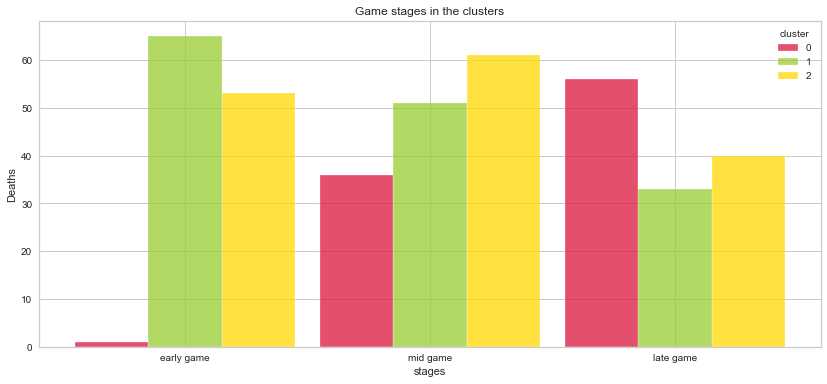

In [333]:
stagesPerClusterV2(redSideDefeat_df, colors)

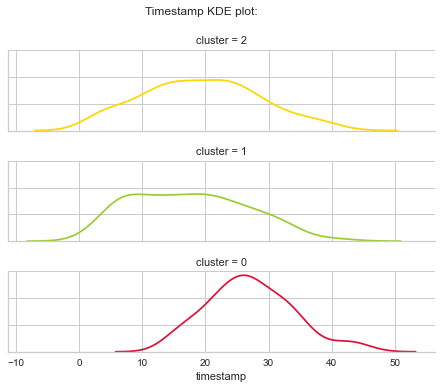

In [334]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [335]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Singed             16
Ekko                5
MonkeyKing          5
MasterYi            5
Maokai              4
Evelynn             3
Sylas               3
FiddleSticks        2
Udyr                2
Elise               2
JarvanIV            1
Belveth             1
Rammus              1
Talon               1
Zac                 1
Jax                 1
Nocturne            1
LeeSin              1
Vi                  1
Amumu               1

Deaths with each champion:

In [336]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Singed          94
MasterYi        58
Sylas           32
MonkeyKing      29
Ekko            28
Udyr            22
Maokai          18
Jax             14
Evelynn         12
Talon           12
FiddleSticks    11
Rammus          10
Nocturne         9
Belveth          9
JarvanIV         8
Elise            7
LeeSin           7
Vi               6
Amumu            6
Zac              4
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [337]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 20 champions when they won on the red side

Cluster 0 - died with 20 champions:
 ['Amumu' 'Belveth' 'Ekko' 'Elise' 'Evelynn' 'FiddleSticks' 'JarvanIV'
 'Jax' 'LeeSin' 'Maokai' 'MasterYi' 'MonkeyKing' 'Nocturne' 'Rammus'
 'Singed' 'Sylas' 'Talon' 'Udyr' 'Vi' 'Zac']
Singed          28
MasterYi        10
Evelynn          6
Sylas            6
MonkeyKing       5
Ekko             4
Talon            4
Maokai           3
LeeSin           3
Rammus           3
FiddleSticks     3
Jax              3
Zac              3
Udyr             3
Vi               2
JarvanIV         2
Amumu            2
Elise            1
Nocturne         1
Belveth          1
Name: champion, dtype: int64

Cluster 1 - died with 19 champions:
 ['Amumu' 'Belveth' 'Ekko' 'Elise' 'Evelynn' 'FiddleSticks' 'JarvanIV'
 'Jax' 'LeeSin' 'Maokai' 'MasterYi' 'MonkeyKing' 'Nocturne' 'Rammus'
 'Singed' 'Sylas' 'Talon' 'Udyr' 'Vi']
Singed          33
MasterYi        27
Ekko            12
Sylas           12
MonkeyKing 

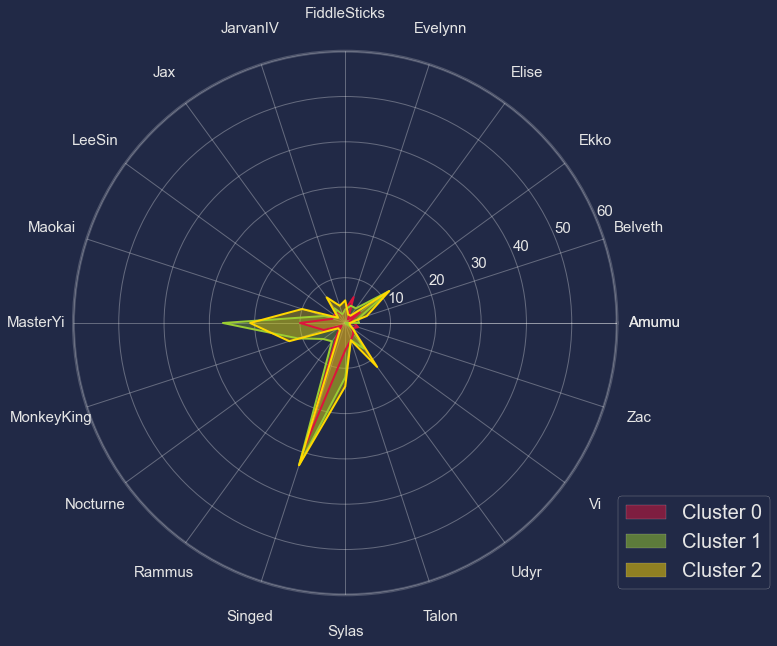

In [338]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
#### Clustering Blue Team Victory

In [339]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region  champion  timestamp  \
34674   EUW1_6279298775  Blue  anonymous 153   euw1  MasterYi   6.629333   
34681   EUW1_6279298775  Blue  anonymous 153   euw1  MasterYi   9.756967   
34687   EUW1_6279298775  Blue  anonymous 153   euw1  MasterYi  13.168867   
34697   EUW1_6279298775  Blue  anonymous 153   euw1  MasterYi  16.582467   
34702   EUW1_6279298775  Blue  anonymous 153   euw1  MasterYi  18.170617   
...                 ...   ...            ...    ...       ...        ...   
639065  EUW1_6289927839  Blue  anonymous 129   euw1     Elise  11.995317   
639069  EUW1_6289927839  Blue  anonymous 129   euw1     Elise  13.741617   
639073  EUW1_6289927839  Blue  anonymous 129   euw1     Elise  15.681267   
639096  EUW1_6289927839  Blue  anonymous 129   euw1     Elise  25.144567   
639168  EUW1_6289902488  Blue  anonymous 129   euw1    Maokai  22.222133   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
34674        13450.0        3265.0    NaN            NaN  ...   
34681         4858.0       10087.0    NaN            NaN  ...   
34687         6988.0        6406.0    NaN            NaN  ...   
34697         9933.0        6476.0    NaN            NaN  ...   
34702         7634.0        5713.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
639065         796.0       10384.0    NaN            NaN  ...   
639069       10721.0        4858.0    NaN            NaN  ...   
639073        9404.0        2395.0    NaN            NaN  ...   
639096       13636.0        8165.0    NaN            NaN  ...   
639168        6206.0       10446.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
34674               NaN     True      Death        NaN           NaN   NaN   
34681               NaN     True      Death        NaN           NaN   NaN   
34687               NaN     True      Death        NaN           NaN   NaN   
34697               NaN     True      Death        NaN           NaN   NaN   
34702               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
639065              NaN     True      Death        NaN           NaN   NaN   
639069              NaN     True      Death        NaN           NaN   NaN   
639073              NaN     True      Death        NaN           NaN   NaN   
639096              NaN     True      Death        NaN           NaN   NaN   
639168              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
34674       NaN       NaN  JUNGLE  Gold  
34681       NaN       NaN  JUNGLE  Gold  
34687       NaN       NaN  JUNGLE  Gold  
34697       NaN       NaN  JUNGLE  Gold  
34702       NaN       NaN  JUNGLE  Gold  
...         ...       ...     ...   ...  
639065      NaN       NaN  JUNGLE  Gold  
639069      NaN       NaN  JUNGLE  Gold  
639073      NaN       NaN  JUNGLE  Gold  
639096      NaN       NaN  JUNGLE  Gold  
639168      NaN       NaN  JUNGLE  Gold  

[246 rows x 56 columns]

In [340]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)].copy()

In [341]:
blueSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [342]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

52

In [343]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

57.77777777777777

In [344]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

4.322614654717976

In [345]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 129 won 4 matches on the blue side
anonymous 129 has an average of 3.75 deaths per game when winning on the blue side

anonymous 153 won 7 matches on the blue side
anonymous 153 has an average of 9.428571428571429 deaths per game when winning on the blue side

anonymous 172 won 21 matches on the blue side
anonymous 172 has an average of 3.8095238095238093 deaths per game when winning on the blue side

anonymous 173 won 13 matches on the blue side
anonymous 173 has an average of 3.4615384615384617 deaths per game when winning on the blue side

anonymous 179 won 7 matches on the blue side
anonymous 179 has an average of 5.714285714285714 deaths per game when winning on the blue side



In [346]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 52 matches in which the jungler died at least once
5 players died a total of 246 times on the blue side
Victory games on blue side contains an average of 4.730769230769231 deaths per game


In [347]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
34674        13450.0        3265.0   6.629333
34681         4858.0       10087.0   9.756967
34687         6988.0        6406.0  13.168867
34697         9933.0        6476.0  16.582467
34702         7634.0        5713.0  18.170617
...              ...           ...        ...
639065         796.0       10384.0  11.995317
639069       10721.0        4858.0  13.741617
639073        9404.0        2395.0  15.681267
639096       13636.0        8165.0  25.144567
639168        6206.0       10446.0  22.222133

[246 rows x 3 columns]

Time discretization

In [348]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [349]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [350]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [351]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [352]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
34674       1.425768     -1.413734         -1
34681      -1.178553      0.689635         -1
34687      -0.532929     -0.445296         -1
34697       0.359730     -0.423714          0
34702      -0.337120     -0.658963          0
...              ...           ...        ...
639065     -2.409786      0.781206         -1
639069      0.598581     -0.922578         -1
639073      0.199385     -1.681974          0
639096      1.482146      0.097041          1
639168     -0.769961      0.800322          0

[246 rows x 3 columns]

In [353]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.30218479768830087
Silhouette score for k=3: 0.35630426657575215
Silhouette score for k=4: 0.35279353886679654
Silhouette score for k=5: 0.3402364966028584
Silhouette score for k=6: 0.33003176237287596
Silhouette score for k=7: 0.32968769886936433
Silhouette score for k=8: 0.3244598578711943
Silhouette score for k=9: 0.34435993270817317
Silhouette score for k=10: 0.3498097217639488
Silhouette score for k=11: 0.3648083772766396
Silhouette score for k=12: 0.36829381014636564
Silhouette score for k=13: 0.3669542136092711
Silhouette score for k=14: 0.37213678968610653
Silhouette score for k=15: 0.3803351891722292
Silhouette score for k=16: 0.3906667663939252
Silhouette score for k=17: 0.37824089949013995
Silhouette score for k=18: 0.38211234336730976
Silhouette score for k=19: 0.3885465831771089
Silhouette score for k=20: 0.3969839066637472
Silhouette score for k=25: 0.4085116482914652


K-Means with k = 3

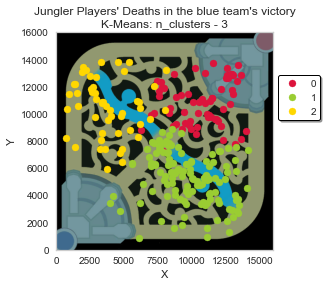

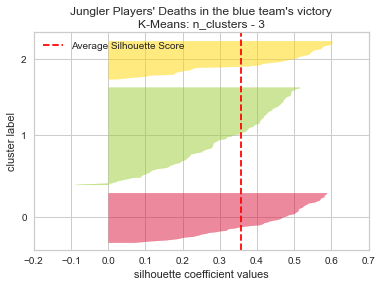

Silhouette score: 0.35630426657575215
1    129
0     66
2     51
Name: cluster, dtype: int64

Inertia: 287.92427943547676

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10702.696970  10789.409091   0.484848
1        1   9698.069767   5299.410853  -0.302326
2        2   3806.607843  10498.803922  -0.431373

In [354]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "yellowgreen", "gold"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [355]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1991.182662   1625.576597   0.499770
1        1   2211.242774   1828.866683   0.742974
2        2   1832.161106   2051.403833   0.693242

In [356]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14002.0            6227.0           13748.0   
1        1           14128.0            3988.0            8859.0   
2        2            8084.0             721.0           13832.0   

   min coordinate_y  max timestamp  min timestamp  
0            7241.0              1              0  
1             898.0              1             -1  
2            5976.0              1             -1

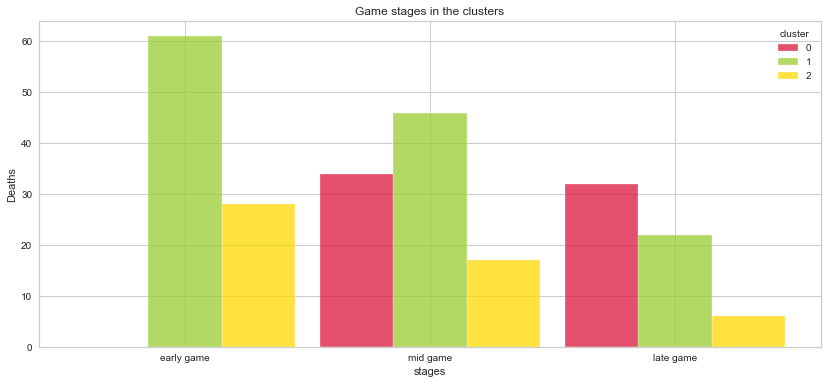

In [357]:
stagesPerClusterV2(blueSideVictory_df, colors)

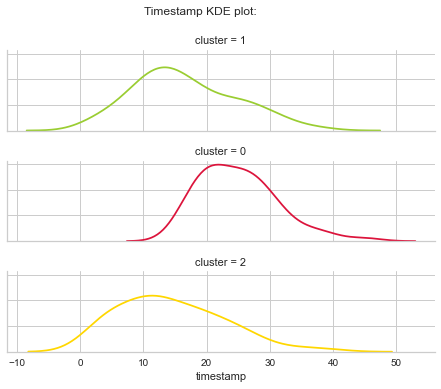

In [358]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [359]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Singed             12
MonkeyKing          7
MasterYi            6
Maokai              5
Ekko                4
Amumu               3
Sylas               2
Belveth             2
Evelynn             2
FiddleSticks        2
Elise               2
Vi                  1
LeeSin              1
Warwick             1
Talon               1
Nunu                1

Deaths with each champion:

In [360]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



MasterYi        56
Singed          43
Maokai          22
Ekko            18
MonkeyKing      17
Belveth         16
Amumu           14
Vi              10
FiddleSticks    10
Elise            9
Evelynn          8
Warwick          7
Sylas            7
LeeSin           4
Nunu             3
Talon            2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [361]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 16 champions when they won on the red side

Cluster 0 - died with 15 champions:
 ['Amumu' 'Belveth' 'Ekko' 'Elise' 'Evelynn' 'FiddleSticks' 'LeeSin'
 'Maokai' 'MasterYi' 'MonkeyKing' 'Nunu' 'Singed' 'Talon' 'Vi' 'Warwick']
Singed          16
MasterYi        12
Belveth          6
Maokai           6
MonkeyKing       6
Ekko             4
LeeSin           3
Vi               3
Talon            2
Evelynn          2
Amumu            2
Warwick          1
Nunu             1
FiddleSticks     1
Elise            1
Name: champion, dtype: int64

Cluster 1 - died with 15 champions:
 ['Amumu' 'Belveth' 'Ekko' 'Elise' 'Evelynn' 'FiddleSticks' 'LeeSin'
 'Maokai' 'MasterYi' 'MonkeyKing' 'Nunu' 'Singed' 'Sylas' 'Vi' 'Warwick']
MasterYi        34
Singed          22
Ekko            10
Maokai           9
MonkeyKing       8
Belveth          7
Amumu            7
Sylas            6
FiddleSticks     6
Evelynn          5
Elise            5
Warwick          4
Vi               4
LeeSin       

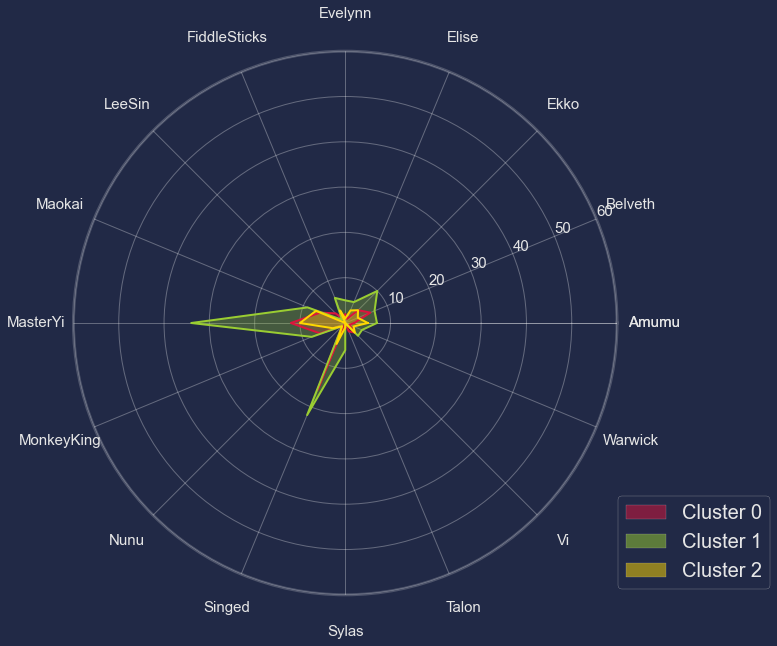

In [362]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
#### Clustering Blue Team Defeat

In [363]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region    champion  timestamp  \
3383    EUW1_6272896782  Blue  anonymous 129   euw1      LeeSin   6.302467   
3396    EUW1_6272896782  Blue  anonymous 129   euw1      LeeSin  13.837467   
3406    EUW1_6272896782  Blue  anonymous 129   euw1      LeeSin  18.453517   
3417    EUW1_6272896782  Blue  anonymous 129   euw1      LeeSin  22.972600   
3425    EUW1_6272896782  Blue  anonymous 129   euw1      LeeSin  26.447450   
...                 ...   ...            ...    ...         ...        ...   
618761  EUW1_6287575621  Blue  anonymous 173   euw1  MonkeyKing   1.004350   
618768  EUW1_6287575621  Blue  anonymous 173   euw1  MonkeyKing   4.335650   
618777  EUW1_6287575621  Blue  anonymous 173   euw1  MonkeyKing   9.514267   
618790  EUW1_6287575621  Blue  anonymous 173   euw1  MonkeyKing  15.933600   
618797  EUW1_6287575621  Blue  anonymous 173   euw1  MonkeyKing  19.284233   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
3383          7678.0        7550.0    NaN            NaN  ...   
3396          4684.0        8960.0    NaN            NaN  ...   
3406          7188.0       11508.0    NaN            NaN  ...   
3417          6200.0       10302.0    NaN            NaN  ...   
3425          7050.0        3032.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
618761        6562.0        4701.0    NaN            NaN  ...   
618768       11719.0        1117.0    NaN            NaN  ...   
618777        9344.0        6040.0    NaN            NaN  ...   
618790        5705.0        6296.0    NaN            NaN  ...   
618797        6481.0        2496.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
3383                NaN    False      Death        NaN           NaN   NaN   
3396                NaN    False      Death        NaN           NaN   NaN   
3406                NaN    False      Death        NaN           NaN   NaN   
3417                NaN    False      Death        NaN           NaN   NaN   
3425                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
618761              NaN    False      Death        NaN           NaN   NaN   
618768              NaN    False      Death        NaN           NaN   NaN   
618777              NaN    False      Death        NaN           NaN   NaN   
618790              NaN    False      Death        NaN           NaN   NaN   
618797              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
3383        NaN       NaN  JUNGLE  Gold  
3396        NaN       NaN  JUNGLE  Gold  
3406        NaN       NaN  JUNGLE  Gold  
3417        NaN       NaN  JUNGLE  Gold  
3425        NaN       NaN  JUNGLE  Gold  
...         ...       ...     ...   ...  
618761      NaN       NaN  JUNGLE  Gold  
618768      NaN       NaN  JUNGLE  Gold  
618777      NaN       NaN  JUNGLE  Gold  
618790      NaN       NaN  JUNGLE  Gold  
618797      NaN       NaN  JUNGLE  Gold  

[284 rows x 56 columns]

In [364]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)].copy()

In [365]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 129 lost 5 matches on the blue side
anonymous 129 has an average of 8.2 deaths per game when losing on the blue side

anonymous 153 lost 3 matches on the blue side
anonymous 153 has an average of 12.666666666666666 deaths per game when losing on the blue side

anonymous 172 lost 14 matches on the blue side
anonymous 172 has an average of 6.857142857142857 deaths per game when losing on the blue side

anonymous 173 lost 10 matches on the blue side
anonymous 173 has an average of 6.2 deaths per game when losing on the blue side

anonymous 179 lost 6 matches on the blue side
anonymous 179 has an average of 7.833333333333333 deaths per game when losing on the blue side



In [366]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 38 matches in which the jungler died at least once
5 players died a total of 284 times on the blue side
Defeat games on blue side contains an average of 7.473684210526316 deaths per game


In [367]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
3383          7678.0        7550.0   6.302467
3396          4684.0        8960.0  13.837467
3406          7188.0       11508.0  18.453517
3417          6200.0       10302.0  22.972600
3425          7050.0        3032.0  26.447450
...              ...           ...        ...
618761        6562.0        4701.0   1.004350
618768       11719.0        1117.0   4.335650
618777        9344.0        6040.0   9.514267
618790        5705.0        6296.0  15.933600
618797        6481.0        2496.0  19.284233

[284 rows x 3 columns]

Time discretization

In [368]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [369]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [370]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [371]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [372]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
3383        0.176482      0.338486         -1
3396       -0.813340      0.769082         -1
3406        0.014487      1.547209          0
3417       -0.312147      1.178912          0
3425       -0.031136     -1.041255          1
...              ...           ...        ...
618761     -0.192470     -0.531564         -1
618768      1.512444     -1.626072         -1
618777      0.727265     -0.122650         -1
618790     -0.475795     -0.044470          0
618797     -0.219248     -1.204943          0

[284 rows x 3 columns]

In [373]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.2954646745823332
Silhouette score for k=3: 0.30378229461627887
Silhouette score for k=4: 0.30164909586463334
Silhouette score for k=5: 0.3032248335455953
Silhouette score for k=6: 0.30272781360225826
Silhouette score for k=7: 0.2992882126209401
Silhouette score for k=8: 0.30478596597362834
Silhouette score for k=9: 0.3179890252595087
Silhouette score for k=10: 0.3218623493073069
Silhouette score for k=11: 0.3322535451521431
Silhouette score for k=12: 0.33088074029052933
Silhouette score for k=13: 0.33341283701434943
Silhouette score for k=14: 0.348511232222944
Silhouette score for k=15: 0.3662229994215098
Silhouette score for k=16: 0.36129371174337066
Silhouette score for k=17: 0.37161827858981006
Silhouette score for k=18: 0.37314019551592853
Silhouette score for k=19: 0.38276583328713115
Silhouette score for k=20: 0.3902292108962152
Silhouette score for k=25: 0.41020184818933575


K-Means with k = 3

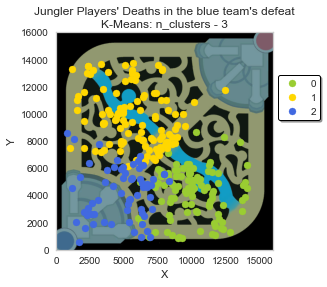

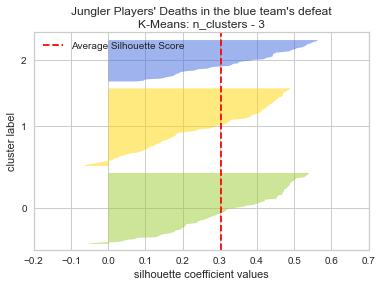

Silhouette score: 0.30378229461627887
1    116
0    106
2     62
Name: cluster, dtype: int64

Inertia: 361.49314628382405

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10011.716981   4245.283019  -0.245283
1        1   5765.267241   9637.913793  -0.224138
2        2   4821.516129   4216.483871   0.629032

In [374]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [375]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   1885.860695   1714.321598   0.749985
1        1   2203.991518   2093.642740   0.732099
2        2   1931.465495   1891.446398   0.483064

In [376]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           14067.0            6056.0            8697.0   
1        1           12410.0            1005.0           13777.0   
2        2            8344.0             834.0            8590.0   

   min coordinate_y  max timestamp  min timestamp  
0             846.0              1             -1  
1            6138.0              1             -1  
2             584.0              1              0

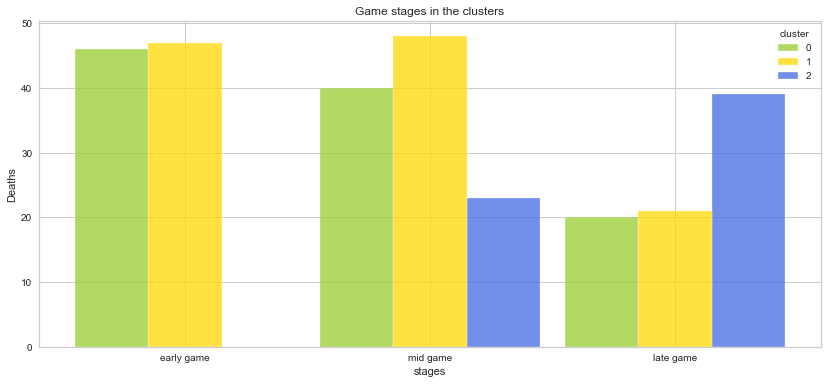

In [377]:
stagesPerClusterV2(blueSideDefeat_df, colors)

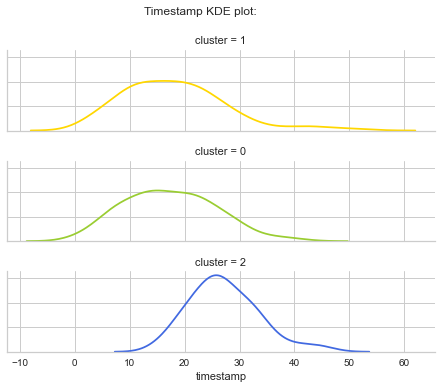

In [378]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [379]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Ekko                5
FiddleSticks        5
MonkeyKing          5
Singed              4
Sylas               3
Elise               3
Maokai              3
Zac                 2
LeeSin              2
Evelynn             2
MasterYi            1
Belveth             1
Amumu               1
Diana               1

Deaths with each champion:

In [380]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Ekko            40
Sylas           34
FiddleSticks    32
Elise           26
Zac             23
MonkeyKing      21
Singed          20
LeeSin          18
Maokai          18
Evelynn         16
MasterYi        14
Diana            9
Belveth          8
Amumu            5
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [381]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 14 champions when they won on the red side

Cluster 0 - died with 14 champions:
 ['Amumu' 'Belveth' 'Diana' 'Ekko' 'Elise' 'Evelynn' 'FiddleSticks'
 'LeeSin' 'Maokai' 'MasterYi' 'MonkeyKing' 'Singed' 'Sylas' 'Zac']
Sylas           16
Ekko            14
FiddleSticks    12
Elise           10
MonkeyKing      10
Zac              9
Singed           7
Maokai           6
MasterYi         5
Diana            5
Belveth          4
Evelynn          4
LeeSin           3
Amumu            1
Name: champion, dtype: int64

Cluster 1 - died with 14 champions:
 ['Amumu' 'Belveth' 'Diana' 'Ekko' 'Elise' 'Evelynn' 'FiddleSticks'
 'LeeSin' 'Maokai' 'MasterYi' 'MonkeyKing' 'Singed' 'Sylas' 'Zac']
Ekko            16
Sylas           13
Elise           12
FiddleSticks    12
Maokai          10
LeeSin           9
Evelynn          9
Singed           8
Zac              7
MasterYi         7
MonkeyKing       6
Belveth          3
Amumu            3
Diana            1
Name: champion, dtype: int64


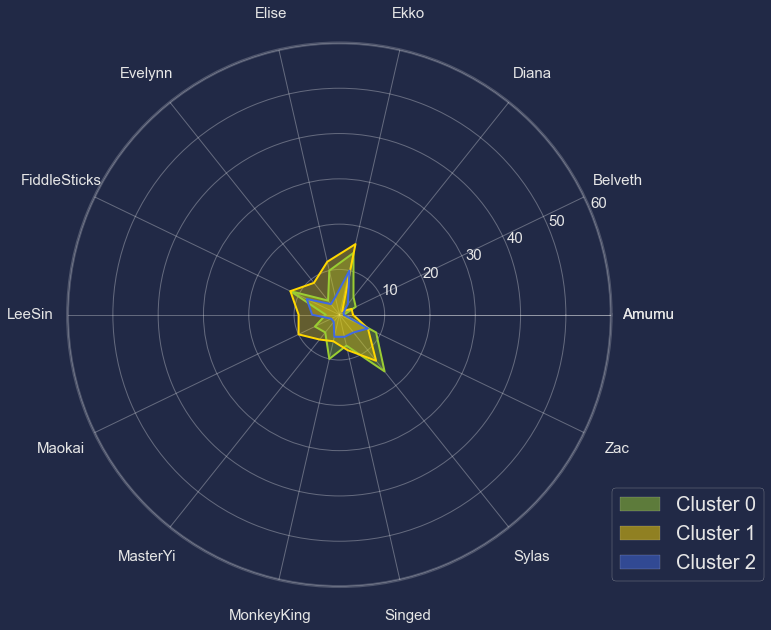

In [382]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
### Platinum Players

#### Clustering Red Team Victory

In [383]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
46050   EUW1_6279567031  Red  anonymous 161   euw1   Maokai   3.497233   
46061   EUW1_6279567031  Red  anonymous 161   euw1   Maokai   8.588183   
46067   EUW1_6279567031  Red  anonymous 161   euw1   Maokai  11.279200   
46089   EUW1_6279567031  Red  anonymous 161   euw1   Maokai  19.316217   
46110   EUW1_6279567031  Red  anonymous 161   euw1   Maokai  25.482300   
...                 ...  ...            ...    ...      ...        ...   
642176  EUW1_6289606636  Red  anonymous 165   euw1    Elise   5.202500   
642193  EUW1_6289606636  Red  anonymous 165   euw1    Elise  13.974000   
642197  EUW1_6289606636  Red  anonymous 165   euw1    Elise  15.285900   
642214  EUW1_6289606636  Red  anonymous 165   euw1    Elise  22.387483   
642223  EUW1_6289606636  Red  anonymous 165   euw1    Elise  25.254867   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
46050        13096.0        2573.0    NaN            NaN  ...   
46061        11403.0        1499.0    NaN            NaN  ...   
46067         8094.0       13220.0    NaN            NaN  ...   
46089         8739.0        5580.0    NaN            NaN  ...   
46110         3383.0        2106.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642176        3525.0       11256.0    NaN            NaN  ...   
642193        9367.0        7246.0    NaN            NaN  ...   
642197        9388.0        2367.0    NaN            NaN  ...   
642214        8022.0         758.0    NaN            NaN  ...   
642223        4321.0        1702.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
46050               NaN     True      Death        NaN           NaN   NaN   
46061               NaN     True      Death        NaN           NaN   NaN   
46067               NaN     True      Death        NaN           NaN   NaN   
46089               NaN     True      Death        NaN           NaN   NaN   
46110               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642176              NaN     True      Death        NaN           NaN   NaN   
642193              NaN     True      Death        NaN           NaN   NaN   
642197              NaN     True      Death        NaN           NaN   NaN   
642214              NaN     True      Death        NaN           NaN   NaN   
642223              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
46050       NaN       NaN  JUNGLE  Platinum  
46061       NaN       NaN  JUNGLE  Platinum  
46067       NaN       NaN  JUNGLE  Platinum  
46089       NaN       NaN  JUNGLE  Platinum  
46110       NaN       NaN  JUNGLE  Platinum  
...         ...       ...     ...       ...  
642176      NaN       NaN  JUNGLE  Platinum  
642193      NaN       NaN  JUNGLE  Platinum  
642197      NaN       NaN  JUNGLE  Platinum  
642214      NaN       NaN  JUNGLE  Platinum  
642223      NaN       NaN  JUNGLE  Platinum  

[634 rows x 56 columns]

In [384]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)].copy()

In [385]:
redSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [386]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

130

In [387]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

46.42857142857143

In [388]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

10.1213282247765

In [389]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 161 won 13 matches on the red side
anonymous 161 has an average of 4.615384615384615 deaths per game when winning on the red side

anonymous 165 won 18 matches on the red side
anonymous 165 has an average of 3.9444444444444446 deaths per game when winning on the red side

anonymous 21 won 9 matches on the red side
anonymous 21 has an average of 6.0 deaths per game when winning on the red side

anonymous 22 won 17 matches on the red side
anonymous 22 has an average of 3.6470588235294117 deaths per game when winning on the red side

anonymous 29 won 14 matches on the red side
anonymous 29 has an average of 3.4285714285714284 deaths per game when winning on the red side

anonymous 34 won 24 matches on the red side
anonymous 34 has an average of 5.666666666666667 deaths per game when winning on the red side

anonymous 36 won 5 matches on the red side
anonymous 36 has an average of 4.6 deaths per game when winning on the red side

anonymous 37 won 16 matches on the red side
anonym

In [390]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 130 matches in which the jungler died at least once
9 players died a total of 634 times on the red side
Victory games on red side contains an average of 4.876923076923077 deaths per game


In [391]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
46050        13096.0        2573.0   3.497233
46061        11403.0        1499.0   8.588183
46067         8094.0       13220.0  11.279200
46089         8739.0        5580.0  19.316217
46110         3383.0        2106.0  25.482300
...              ...           ...        ...
642176        3525.0       11256.0   5.202500
642193        9367.0        7246.0  13.974000
642197        9388.0        2367.0  15.285900
642214        8022.0         758.0  22.387483
642223        4321.0        1702.0  25.254867

[634 rows x 3 columns]

Time discretization

In [392]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [393]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [394]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [395]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [396]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
46050       1.759958     -1.109421         -1
46061       1.267014     -1.431435         -1
46067       0.303546      2.082831         -1
46089       0.491348     -0.207843          0
46110      -1.068137     -1.249440          1
...              ...           ...        ...
642176     -1.026791      1.493972         -1
642193      0.674200      0.291668         -1
642197      0.680315     -1.171186          0
642214      0.282582     -1.653606          0
642223     -0.795023     -1.370570          1

[634 rows x 3 columns]

In [397]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.30362072657241945
Silhouette score for k=3: 0.3327472026108766
Silhouette score for k=4: 0.33310149089032437
Silhouette score for k=5: 0.3148336870673505
Silhouette score for k=6: 0.3282113394877399
Silhouette score for k=7: 0.32009563998666923
Silhouette score for k=8: 0.3183755911334227
Silhouette score for k=9: 0.31744230376460164
Silhouette score for k=10: 0.3233895166767896
Silhouette score for k=11: 0.31681677393612445
Silhouette score for k=12: 0.32106116971609283
Silhouette score for k=13: 0.3234936391066846
Silhouette score for k=14: 0.3497057061795632
Silhouette score for k=15: 0.3425483936967543
Silhouette score for k=16: 0.3487302746501955
Silhouette score for k=17: 0.3600921935363427
Silhouette score for k=18: 0.36357755358655186
Silhouette score for k=19: 0.360673472292091
Silhouette score for k=20: 0.3684019169911477
Silhouette score for k=25: 0.3997874894840418


K-Means with k = 3

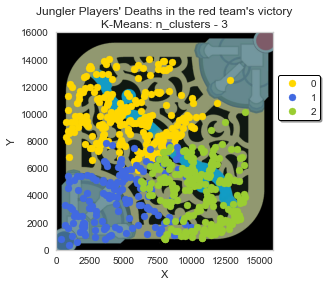

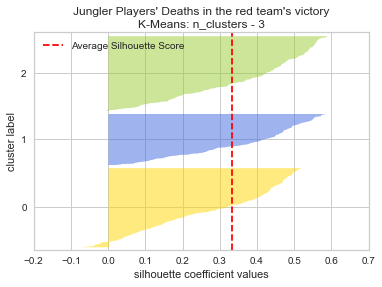

Silhouette score: 0.3327472026108766
0    245
2    231
1    158
Name: cluster, dtype: int64

Inertia: 762.4648727406775

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5362.159184   9676.020408  -0.273469
1        1   4747.677215   3875.841772   0.607595
2        2  10418.948052   4303.930736  -0.497835

In [398]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "royalblue", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [399]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2562.298532   1926.822171   0.730327
1        1   2372.745702   1866.979885   0.488286
2        2   1887.617536   2029.517484   0.643815

In [400]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           12826.0             744.0           14022.0   
1        1            9918.0             398.0            7885.0   
2        2           13942.0            6292.0           10109.0   

   min coordinate_y  max timestamp  min timestamp  
0            5859.0              1             -1  
1             374.0              1              0  
2             758.0              1             -1

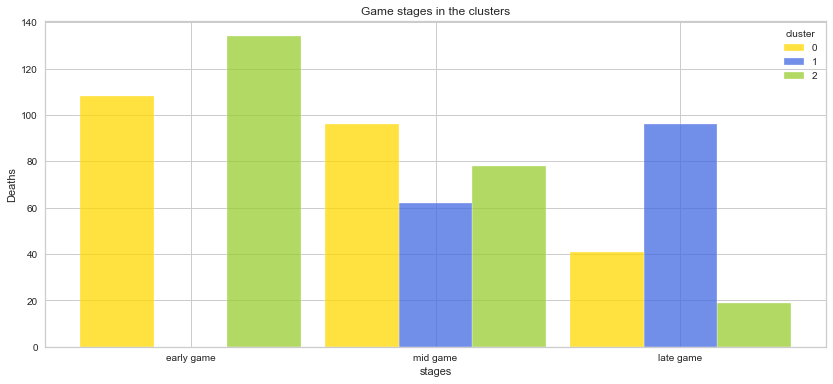

In [401]:
stagesPerClusterV2(redSideVictory_df, colors)

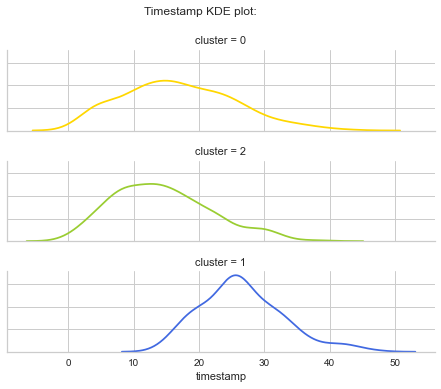

In [402]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [403]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Belveth            17
Udyr               17
Sejuani            15
JarvanIV           14
Sylas              11
Maokai              9
MonkeyKing          7
Ekko                6
Viego               5
Kayn                4
Vi                  3
Diana               2
Zed                 2
Zac                 2
Amumu               2
Evelynn             2
Lillia              1
Gragas              1
LeeSin              1
Nocturne            1
XinZhao             1
Hecarim             1
Rengar              1
Mordekaiser         1
FiddleSticks        1
Sion                1
Shyvana             1
Elise               1

Deaths with each champion:

In [404]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Udyr            109
Belveth          84
JarvanIV         69
Sylas            60
Sejuani          52
Maokai           40
Kayn             30
Ekko             29
MonkeyKing       21
Zed              17
Evelynn          16
Viego            16
Vi               11
Zac              10
Hecarim           8
Diana             7
Mordekaiser       7
FiddleSticks      6
Rengar            6
Nocturne          6
Gragas            6
Elise             6
Sion              4
LeeSin            4
Lillia            4
Amumu             3
Shyvana           2
XinZhao           1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [405]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 28 champions when they won on the red side

Cluster 0 - died with 28 champions:
 ['Amumu' 'Belveth' 'Diana' 'Ekko' 'Elise' 'Evelynn' 'FiddleSticks'
 'Gragas' 'Hecarim' 'JarvanIV' 'Kayn' 'LeeSin' 'Lillia' 'Maokai'
 'MonkeyKing' 'Mordekaiser' 'Nocturne' 'Rengar' 'Sejuani' 'Shyvana' 'Sion'
 'Sylas' 'Udyr' 'Vi' 'Viego' 'XinZhao' 'Zac' 'Zed']
Udyr            48
Belveth         39
JarvanIV        26
Sejuani         21
Sylas           18
Maokai          12
Ekko            12
Evelynn          7
Viego            7
Zed              6
Diana            5
Kayn             5
Rengar           5
MonkeyKing       5
Vi               4
Zac              3
Mordekaiser      3
Amumu            3
FiddleSticks     3
Sion             3
Hecarim          2
Gragas           2
XinZhao          1
Nocturne         1
LeeSin           1
Shyvana          1
Lillia           1
Elise            1
Name: champion, dtype: int64

Cluster 1 - died with 23 champions:
 ['Belveth' 'Diana' 'Ekko' 'Elise' 'Eve

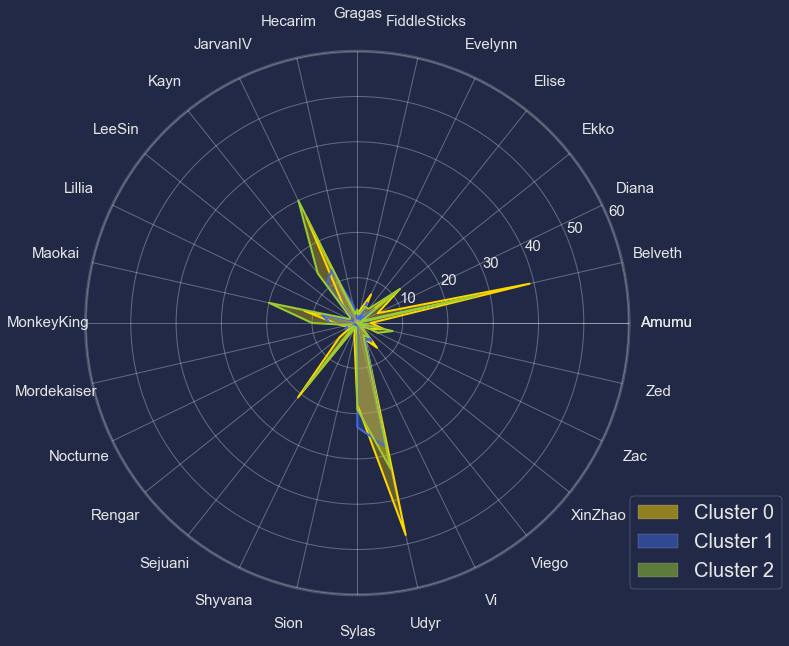

In [406]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
#### Clustering Red Team Defeat

In [407]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region champion  timestamp  \
45854   EUW1_6279888483  Red  anonymous 161   euw1       Vi   3.058550   
45858   EUW1_6279888483  Red  anonymous 161   euw1       Vi   5.382433   
45867   EUW1_6279888483  Red  anonymous 161   euw1       Vi   9.375100   
45871   EUW1_6279888483  Red  anonymous 161   euw1       Vi  11.742233   
45877   EUW1_6279888483  Red  anonymous 161   euw1       Vi  14.248350   
...                 ...  ...            ...    ...      ...        ...   
642082  EUW1_6289740836  Red  anonymous 165   euw1    Elise  10.368600   
642098  EUW1_6289740836  Red  anonymous 165   euw1    Elise  20.276033   
642100  EUW1_6289740836  Red  anonymous 165   euw1    Elise  21.832083   
642104  EUW1_6289740836  Red  anonymous 165   euw1    Elise  23.172017   
642108  EUW1_6289740836  Red  anonymous 165   euw1    Elise  25.895367   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
45854         1727.0       13059.0    NaN            NaN  ...   
45858         8271.0       10336.0    NaN            NaN  ...   
45867        11490.0        4658.0    NaN            NaN  ...   
45871        10558.0         926.0    NaN            NaN  ...   
45877        12116.0        6532.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642082        5393.0       13298.0    NaN            NaN  ...   
642098        8520.0        6559.0    NaN            NaN  ...   
642100        8166.0        5739.0    NaN            NaN  ...   
642104        7076.0        7662.0    NaN            NaN  ...   
642108        8436.0        7470.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
45854               NaN    False      Death        NaN           NaN   NaN   
45858               NaN    False      Death        NaN           NaN   NaN   
45867               NaN    False      Death        NaN           NaN   NaN   
45871               NaN    False      Death        NaN           NaN   NaN   
45877               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642082              NaN    False      Death        NaN           NaN   NaN   
642098              NaN    False      Death        NaN           NaN   NaN   
642100              NaN    False      Death        NaN           NaN   NaN   
642104              NaN    False      Death        NaN           NaN   NaN   
642108              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
45854       NaN       NaN  JUNGLE  Platinum  
45858       NaN       NaN  JUNGLE  Platinum  
45867       NaN       NaN  JUNGLE  Platinum  
45871       NaN       NaN  JUNGLE  Platinum  
45877       NaN       NaN  JUNGLE  Platinum  
...         ...       ...     ...       ...  
642082      NaN       NaN  JUNGLE  Platinum  
642098      NaN       NaN  JUNGLE  Platinum  
642100      NaN       NaN  JUNGLE  Platinum  
642104      NaN       NaN  JUNGLE  Platinum  
642108      NaN       NaN  JUNGLE  Platinum  

[1125 rows x 56 columns]

In [408]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)].copy()

In [409]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 161 lost 13 matches on the red side
anonymous 161 has an average of 7.923076923076923 deaths per game when losing on the red side

anonymous 165 lost 24 matches on the red side
anonymous 165 has an average of 5.75 deaths per game when losing on the red side

anonymous 21 lost 12 matches on the red side
anonymous 21 has an average of 7.333333333333333 deaths per game when losing on the red side

anonymous 22 lost 26 matches on the red side
anonymous 22 has an average of 7.884615384615385 deaths per game when losing on the red side

anonymous 29 lost 16 matches on the red side
anonymous 29 has an average of 5.875 deaths per game when losing on the red side

anonymous 34 lost 18 matches on the red side
anonymous 34 has an average of 8.277777777777779 deaths per game when losing on the red side

anonymous 36 lost 12 matches on the red side
anonymous 36 has an average of 7.75 deaths per game when losing on the red side

anonymous 37 lost 15 matches on the red side
anonymous 37 has

In [410]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 150 matches in which the jungler died at least once
9 players died a total of 1125 times on the red side
Defeat games on red side contains an average of 7.5 deaths per game


In [411]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
45854         1727.0       13059.0   3.058550
45858         8271.0       10336.0   5.382433
45867        11490.0        4658.0   9.375100
45871        10558.0         926.0  11.742233
45877        12116.0        6532.0  14.248350
...              ...           ...        ...
642082        5393.0       13298.0  10.368600
642098        8520.0        6559.0  20.276033
642100        8166.0        5739.0  21.832083
642104        7076.0        7662.0  23.172017
642108        8436.0        7470.0  25.895367

[1125 rows x 3 columns]

Time discretization

In [412]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [413]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [414]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [415]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [416]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
45854      -2.177949      1.567622         -1
45858      -0.170574      0.752428         -1
45867       0.816856     -0.947414         -1
45871       0.530965     -2.064676         -1
45877       1.008882     -0.386388         -1
...              ...           ...        ...
642082     -1.053402      1.639173         -1
642098     -0.094193     -0.378305          0
642100     -0.202783     -0.623792          0
642104     -0.537141     -0.048096          0
642108     -0.119960     -0.105576          1

[1125 rows x 3 columns]

In [417]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3205758650806468
Silhouette score for k=3: 0.3315156363942024
Silhouette score for k=4: 0.3256006919012713
Silhouette score for k=5: 0.30927934075751634
Silhouette score for k=6: 0.3190422285994205
Silhouette score for k=7: 0.31628636054663434
Silhouette score for k=8: 0.31744425442468055
Silhouette score for k=9: 0.3157408823051794
Silhouette score for k=10: 0.31245256308851865
Silhouette score for k=11: 0.3118683299352305
Silhouette score for k=12: 0.3209110043605272
Silhouette score for k=13: 0.3384768649981477
Silhouette score for k=14: 0.3428618845697061
Silhouette score for k=15: 0.34684387525326765
Silhouette score for k=16: 0.3374378880002013
Silhouette score for k=17: 0.3406766894535378
Silhouette score for k=18: 0.3452020760788995
Silhouette score for k=19: 0.3478447601075577
Silhouette score for k=20: 0.3660816836994939
Silhouette score for k=25: 0.37044663145184425


K-Means with k = 3

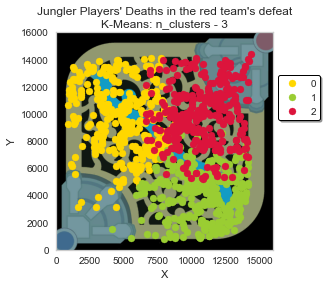

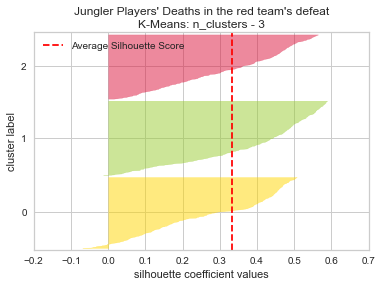

Silhouette score: 0.3315156363942024
1    399
0    381
2    345
Name: cluster, dtype: int64

Inertia: 1304.2345747049653

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5189.587927   9619.692913  -0.314961
1        1  10740.223058   4316.882206  -0.478697
2        2  10631.501449   9892.608696   0.486957

In [418]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [419]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2049.191227   2391.577523   0.702834
1        1   1948.934655   1719.386289   0.640271
2        2   1877.120918   2140.796108   0.544249

In [420]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            9387.0             855.0           14105.0   
1        1           14123.0            4158.0            8568.0   
2        2           14355.0            6602.0           14409.0   

   min coordinate_y  max timestamp  min timestamp  
0            3136.0              1             -1  
1             811.0              1             -1  
2            5243.0              1             -1

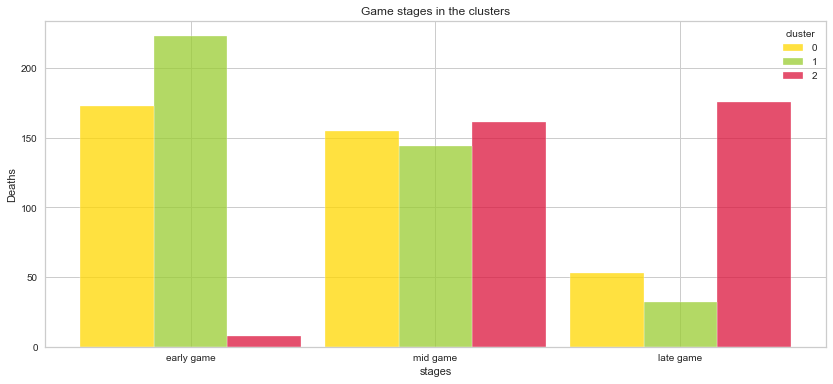

In [421]:
stagesPerClusterV2(redSideDefeat_df, colors)

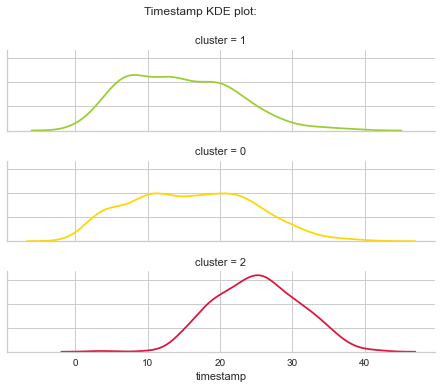

In [422]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [423]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
JarvanIV           21
Sejuani            15
Udyr               14
Belveth            14
Kayn               12
Sylas              11
Maokai             10
Ekko                6
Nunu                5
MonkeyKing          4
Viego               3
Zac                 3
Vi                  3
XinZhao             2
Gragas              2
Rammus              2
LeeSin              2
Hecarim             2
Diana               2
Lillia              2
Shyvana             2
Jax                 2
Trundle             1
Poppy               1
FiddleSticks        1
Tryndamere          1
Warwick             1
Mordekaiser         1
MasterYi            1
Shaco               1
RekSai              1
Evelynn             1
Elise               1

Deaths with each champion:

In [424]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



JarvanIV        147
Belveth         126
Udyr            112
Sylas            99
Sejuani          96
Kayn             92
Maokai           73
Ekko             40
Nunu             27
Vi               24
LeeSin           24
MonkeyKing       24
Rammus           21
Viego            19
XinZhao          18
Zac              16
Diana            16
Lillia           16
Hecarim          15
MasterYi         12
Tryndamere       11
Shaco            11
Gragas           10
Mordekaiser      10
Evelynn           9
Shyvana           9
Jax               9
RekSai            9
Elise             8
FiddleSticks      8
Warwick           7
Poppy             4
Trundle           3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [425]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 33 champions when they won on the red side

Cluster 0 - died with 33 champions:
 ['Belveth' 'Diana' 'Ekko' 'Elise' 'Evelynn' 'FiddleSticks' 'Gragas'
 'Hecarim' 'JarvanIV' 'Jax' 'Kayn' 'LeeSin' 'Lillia' 'Maokai' 'MasterYi'
 'MonkeyKing' 'Mordekaiser' 'Nunu' 'Poppy' 'Rammus' 'RekSai' 'Sejuani'
 'Shaco' 'Shyvana' 'Sylas' 'Trundle' 'Tryndamere' 'Udyr' 'Vi' 'Viego'
 'Warwick' 'XinZhao' 'Zac']
Udyr            47
JarvanIV        46
Sylas           40
Belveth         36
Kayn            31
Sejuani         27
Maokai          24
Rammus          11
MonkeyKing      10
Nunu             9
XinZhao          9
Ekko             9
Vi               8
Viego            8
Zac              7
LeeSin           6
Diana            6
Lillia           5
Gragas           5
RekSai           4
Hecarim          4
Jax              4
Tryndamere       3
Evelynn          3
FiddleSticks     3
Warwick          3
Elise            3
Mordekaiser      3
Shaco            2
Shyvana          2
MasterYi        

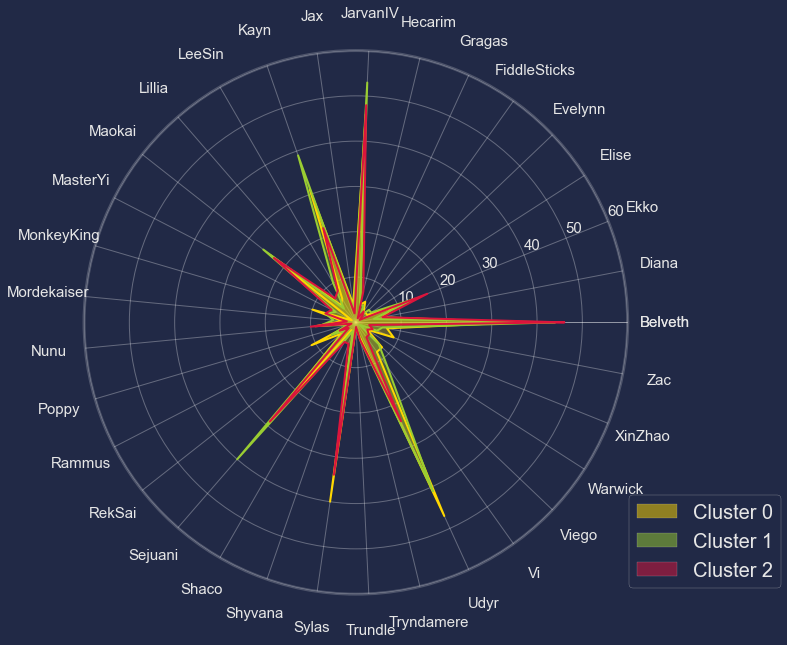

In [426]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
#### Clustering Blue Team Victory

In [427]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
46007   EUW1_6279628632  Blue  anonymous 161   euw1   Maokai  10.211733   
46373   EUW1_6278427437  Blue  anonymous 161   euw1   Maokai   3.844650   
46377   EUW1_6278427437  Blue  anonymous 161   euw1   Maokai   5.492933   
46388   EUW1_6278427437  Blue  anonymous 161   euw1   Maokai  11.081067   
46399   EUW1_6278427437  Blue  anonymous 161   euw1   Maokai  16.782667   
...                 ...   ...            ...    ...      ...        ...   
642390  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko   9.020917   
642404  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  16.234150   
642412  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  19.922367   
642417  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  21.353700   
642426  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  23.927567   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
46007         3050.0       12107.0    NaN            NaN  ...   
46373         3479.0        9351.0    NaN            NaN  ...   
46377         7542.0        7260.0    NaN            NaN  ...   
46388         7316.0        7942.0    NaN            NaN  ...   
46399        10339.0        2661.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642390       13136.0        1998.0    NaN            NaN  ...   
642404        1901.0       12644.0    NaN            NaN  ...   
642412       12026.0       10604.0    NaN            NaN  ...   
642417        7798.0       11952.0    NaN            NaN  ...   
642426       13506.0       13848.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
46007               NaN     True      Death        NaN           NaN   NaN   
46373               NaN     True      Death        NaN           NaN   NaN   
46377               NaN     True      Death        NaN           NaN   NaN   
46388               NaN     True      Death        NaN           NaN   NaN   
46399               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642390              NaN     True      Death        NaN           NaN   NaN   
642404              NaN     True      Death        NaN           NaN   NaN   
642412              NaN     True      Death        NaN           NaN   NaN   
642417              NaN     True      Death        NaN           NaN   NaN   
642426              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
46007       NaN       NaN  JUNGLE  Platinum  
46373       NaN       NaN  JUNGLE  Platinum  
46377       NaN       NaN  JUNGLE  Platinum  
46388       NaN       NaN  JUNGLE  Platinum  
46399       NaN       NaN  JUNGLE  Platinum  
...         ...       ...     ...       ...  
642390      NaN       NaN  JUNGLE  Platinum  
642404      NaN       NaN  JUNGLE  Platinum  
642412      NaN       NaN  JUNGLE  Platinum  
642417      NaN       NaN  JUNGLE  Platinum  
642426      NaN       NaN  JUNGLE  Platinum  

[591 rows x 56 columns]

In [428]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)].copy()

In [429]:
blueSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [430]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

121

In [431]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

49.1869918699187

In [432]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

10.384818133895624

In [433]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 161 won 17 matches on the blue side
anonymous 161 has an average of 4.117647058823529 deaths per game when winning on the blue side

anonymous 165 won 20 matches on the blue side
anonymous 165 has an average of 3.3 deaths per game when winning on the blue side

anonymous 21 won 14 matches on the blue side
anonymous 21 has an average of 6.285714285714286 deaths per game when winning on the blue side

anonymous 22 won 15 matches on the blue side
anonymous 22 has an average of 3.933333333333333 deaths per game when winning on the blue side

anonymous 29 won 10 matches on the blue side
anonymous 29 has an average of 4.2 deaths per game when winning on the blue side

anonymous 34 won 18 matches on the blue side
anonymous 34 has an average of 5.166666666666667 deaths per game when winning on the blue side

anonymous 36 won 6 matches on the blue side
anonymous 36 has an average of 5.666666666666667 deaths per game when winning on the blue side

anonymous 37 won 13 matches on the blu

In [434]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 121 matches in which the jungler died at least once
9 players died a total of 591 times on the blue side
Victory games on blue side contains an average of 4.884297520661157 deaths per game


In [435]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
46007         3050.0       12107.0  10.211733
46373         3479.0        9351.0   3.844650
46377         7542.0        7260.0   5.492933
46388         7316.0        7942.0  11.081067
46399        10339.0        2661.0  16.782667
...              ...           ...        ...
642390       13136.0        1998.0   9.020917
642404        1901.0       12644.0  16.234150
642412       12026.0       10604.0  19.922367
642417        7798.0       11952.0  21.353700
642426       13506.0       13848.0  23.927567

[591 rows x 3 columns]

Time discretization

In [436]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [437]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [438]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [439]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [440]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

coordinate_x  coordinate_y  timestamp
46007      -1.614347      1.375723         -1
46373      -1.488304      0.538783         -1
46377      -0.294569     -0.096210         -1
46388      -0.360970      0.110899         -1
46399       0.527207     -1.492831          0
...              ...           ...        ...
642390      1.348983     -1.694170         -1
642404     -1.951931      1.538798          0
642412      1.022858      0.919293          0
642417     -0.219355      1.328652          0
642426      1.457691      1.904428          0

[591 rows x 3 columns]

In [441]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.31407404743367934
Silhouette score for k=3: 0.33151685690972144
Silhouette score for k=4: 0.29819600032872895
Silhouette score for k=5: 0.31804415076823794
Silhouette score for k=6: 0.3308194407308811
Silhouette score for k=7: 0.34504795319891307
Silhouette score for k=8: 0.3381823047288273
Silhouette score for k=9: 0.3594618288712228
Silhouette score for k=10: 0.3514977456736211
Silhouette score for k=11: 0.3609275373167454
Silhouette score for k=12: 0.36031884624299576
Silhouette score for k=13: 0.34530150299653023
Silhouette score for k=14: 0.3468547190627987
Silhouette score for k=15: 0.3525468512772533
Silhouette score for k=16: 0.3579190816103989
Silhouette score for k=17: 0.35041901729936364
Silhouette score for k=18: 0.35544570539418335
Silhouette score for k=19: 0.36682881915300997
Silhouette score for k=20: 0.36787896267896875
Silhouette score for k=25: 0.3868354696483608


K-Means with k = 3

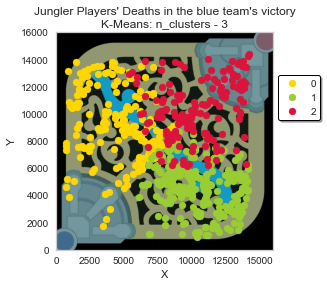

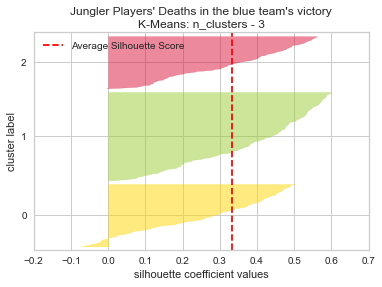

Silhouette score: 0.33151685690972144
1    257
0    182
2    152
Name: cluster, dtype: int64

Inertia: 717.2184781072855

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4530.780220   9237.148352  -0.285714
1        1  10358.112840   4770.120623  -0.513619
2        2  10284.342105  10334.315789   0.572368

In [442]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [443]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2078.246312   2588.351878   0.723023
1        1   2009.701830   1769.176749   0.636755
2        2   2272.444849   2150.220376   0.520652

In [444]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0            8634.0             717.0           13811.0   
1        1           14142.0            6136.0            8668.0   
2        2           14192.0            5410.0           14409.0   

   min coordinate_y  max timestamp  min timestamp  
0            1786.0              1             -1  
1             944.0              1             -1  
2            6173.0              1             -1

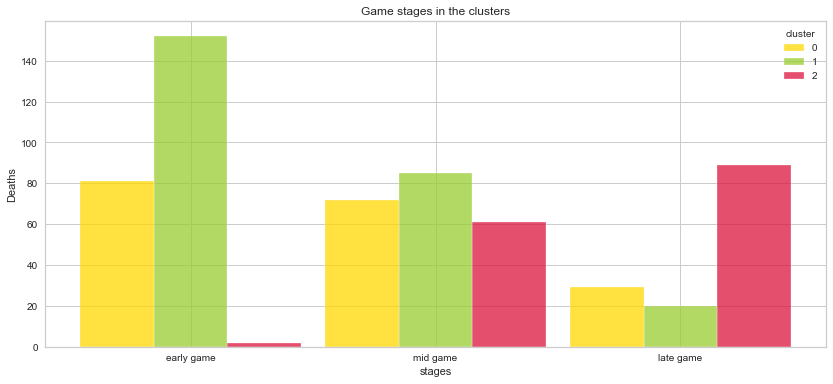

In [445]:
stagesPerClusterV2(blueSideVictory_df, colors)

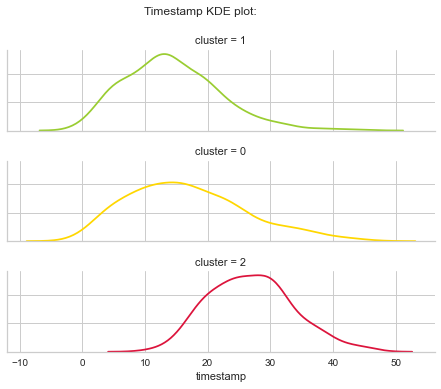

In [446]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [447]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Kayn               16
Sejuani            14
Udyr               14
Belveth            13
Maokai             12
JarvanIV           11
Ekko                8
MonkeyKing          5
Sylas               5
Lillia              3
Amumu               3
Elise               2
Zac                 2
Viego               2
Nunu                2
XinZhao             1
Hecarim             1
LeeSin              1
FiddleSticks        1
Nocturne            1
Poppy               1
AurelionSol         1
Jax                 1
Vi                  1

Deaths with each champion:

In [448]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Kayn            103
Udyr             81
Belveth          63
Sejuani          57
JarvanIV         46
Maokai           42
Ekko             39
Sylas            35
Amumu            20
Lillia           20
MonkeyKing       18
Viego            13
Hecarim           9
LeeSin            9
Jax               5
Nunu              5
XinZhao           5
Elise             4
Zac               4
Vi                4
AurelionSol       3
FiddleSticks      3
Poppy             2
Nocturne          1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [449]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 24 champions when they won on the red side

Cluster 0 - died with 17 champions:
 ['Amumu' 'Belveth' 'Ekko' 'FiddleSticks' 'Hecarim' 'JarvanIV' 'Kayn'
 'LeeSin' 'Lillia' 'Maokai' 'MonkeyKing' 'Nunu' 'Sejuani' 'Sylas' 'Udyr'
 'Vi' 'Viego']
Kayn            30
Belveth         25
Udyr            24
Sejuani         19
Ekko            17
Maokai          14
JarvanIV        14
Sylas           10
Lillia           8
Amumu            5
MonkeyKing       3
Viego            3
Hecarim          3
FiddleSticks     3
LeeSin           2
Nunu             1
Vi               1
Name: champion, dtype: int64

Cluster 1 - died with 22 champions:
 ['Amumu' 'AurelionSol' 'Belveth' 'Ekko' 'Elise' 'Hecarim' 'JarvanIV' 'Jax'
 'Kayn' 'LeeSin' 'Lillia' 'Maokai' 'MonkeyKing' 'Nunu' 'Poppy' 'Sejuani'
 'Sylas' 'Udyr' 'Vi' 'Viego' 'XinZhao' 'Zac']
Kayn           47
Udyr           34
Sejuani        29
Belveth        22
JarvanIV       19
Maokai         18
Sylas          13
Ekko           10
Lillia     

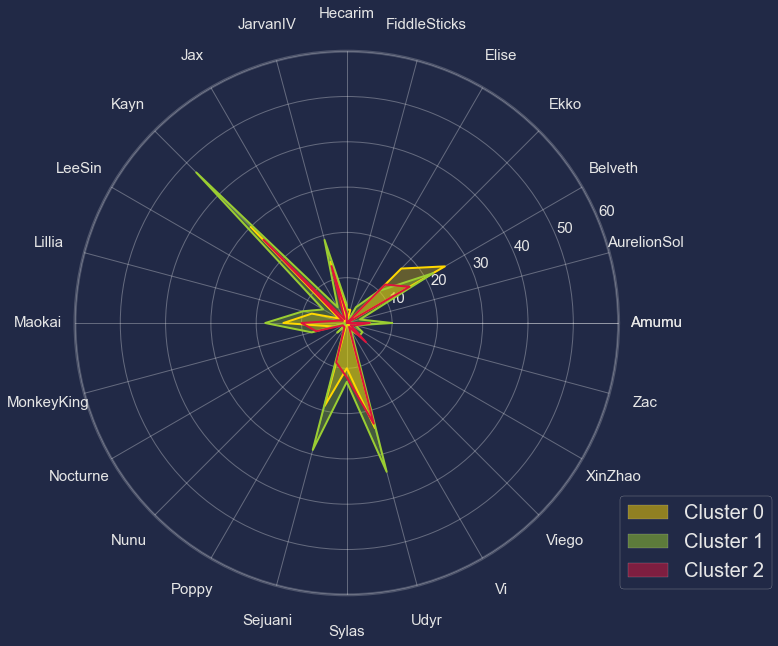

In [450]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
#### Clustering Blue Team Defeat

In [451]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region champion  timestamp  \
45922   EUW1_6279679771  Blue  anonymous 161   euw1   Maokai   4.026917   
45926   EUW1_6279679771  Blue  anonymous 161   euw1   Maokai   6.334817   
45933   EUW1_6279679771  Blue  anonymous 161   euw1   Maokai   9.051683   
45935   EUW1_6279679771  Blue  anonymous 161   euw1   Maokai  10.806633   
45940   EUW1_6279679771  Blue  anonymous 161   euw1   Maokai  12.463983   
...                 ...   ...            ...    ...      ...        ...   
641902  EUW1_6289891261  Blue  anonymous 165   euw1   Khazix   3.444700   
641907  EUW1_6289891261  Blue  anonymous 165   euw1   Khazix   5.515950   
641922  EUW1_6289891261  Blue  anonymous 165   euw1   Khazix  13.242633   
641926  EUW1_6289891261  Blue  anonymous 165   euw1   Khazix  15.539450   
641936  EUW1_6289891261  Blue  anonymous 165   euw1   Khazix  19.831550   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
45922         7368.0        6302.0    NaN            NaN  ...   
45926         9307.0        5908.0    NaN            NaN  ...   
45933        13701.0        3319.0    NaN            NaN  ...   
45935        13990.0        7799.0    NaN            NaN  ...   
45940         9986.0        1479.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
641902        6663.0        4821.0    NaN            NaN  ...   
641907        3130.0        7004.0    NaN            NaN  ...   
641922        9065.0        9342.0    NaN            NaN  ...   
641926        4665.0        8047.0    NaN            NaN  ...   
641936        2235.0        2381.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
45922               NaN    False      Death        NaN           NaN   NaN   
45926               NaN    False      Death        NaN           NaN   NaN   
45933               NaN    False      Death        NaN           NaN   NaN   
45935               NaN    False      Death        NaN           NaN   NaN   
45940               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
641902              NaN    False      Death        NaN           NaN   NaN   
641907              NaN    False      Death        NaN           NaN   NaN   
641922              NaN    False      Death        NaN           NaN   NaN   
641926              NaN    False      Death        NaN           NaN   NaN   
641936              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
45922       NaN       NaN  JUNGLE  Platinum  
45926       NaN       NaN  JUNGLE  Platinum  
45933       NaN       NaN  JUNGLE  Platinum  
45935       NaN       NaN  JUNGLE  Platinum  
45940       NaN       NaN  JUNGLE  Platinum  
...         ...       ...     ...       ...  
641902      NaN       NaN  JUNGLE  Platinum  
641907      NaN       NaN  JUNGLE  Platinum  
641922      NaN       NaN  JUNGLE  Platinum  
641926      NaN       NaN  JUNGLE  Platinum  
641936      NaN       NaN  JUNGLE  Platinum  

[980 rows x 56 columns]

In [452]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)].copy()

In [453]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 161 lost 16 matches on the blue side
anonymous 161 has an average of 6.3125 deaths per game when losing on the blue side

anonymous 165 lost 11 matches on the blue side
anonymous 165 has an average of 5.818181818181818 deaths per game when losing on the blue side

anonymous 21 lost 8 matches on the blue side
anonymous 21 has an average of 7.875 deaths per game when losing on the blue side

anonymous 22 lost 16 matches on the blue side
anonymous 22 has an average of 6.9375 deaths per game when losing on the blue side

anonymous 29 lost 17 matches on the blue side
anonymous 29 has an average of 7.705882352941177 deaths per game when losing on the blue side

anonymous 34 lost 21 matches on the blue side
anonymous 34 has an average of 7.9523809523809526 deaths per game when losing on the blue side

anonymous 36 lost 8 matches on the blue side
anonymous 36 has an average of 9.5 deaths per game when losing on the blue side

anonymous 37 lost 10 matches on the blue side
anonymous 37

In [454]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 125 matches in which the jungler died at least once
9 players died a total of 980 times on the blue side
Defeat games on blue side contains an average of 7.84 deaths per game


In [455]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
45922         7368.0        6302.0   4.026917
45926         9307.0        5908.0   6.334817
45933        13701.0        3319.0   9.051683
45935        13990.0        7799.0  10.806633
45940         9986.0        1479.0  12.463983
...              ...           ...        ...
641902        6663.0        4821.0   3.444700
641907        3130.0        7004.0   5.515950
641922        9065.0        9342.0  13.242633
641926        4665.0        8047.0  15.539450
641936        2235.0        2381.0  19.831550

[980 rows x 3 columns]

Time discretization

In [456]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [457]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [458]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [459]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [460]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

coordinate_x  coordinate_y  timestamp
45922       0.134204      0.119953         -1
45926       0.689176     -0.006464         -1
45933       1.946807     -0.837156         -1
45935       2.029523      0.600272         -1
45940       0.883516     -1.427527         -1
...              ...           ...        ...
641902     -0.067578     -0.355232         -1
641907     -1.078778      0.345192         -1
641922      0.619911      1.095350         -1
641926     -0.639437      0.679843          0
641936     -1.334941     -1.138117          0

[980 rows x 3 columns]

In [461]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.31204247886973485
Silhouette score for k=3: 0.3288497702004819
Silhouette score for k=4: 0.2929752883251707
Silhouette score for k=5: 0.3016646219329593
Silhouette score for k=6: 0.3127708198334508
Silhouette score for k=7: 0.320782160932621
Silhouette score for k=8: 0.31897745375893366
Silhouette score for k=9: 0.3346222610829892
Silhouette score for k=10: 0.3389857022667714
Silhouette score for k=11: 0.3365668316561764
Silhouette score for k=12: 0.3388795207601926
Silhouette score for k=13: 0.34401840380765375
Silhouette score for k=14: 0.3428135183401848
Silhouette score for k=15: 0.3474106484514578
Silhouette score for k=16: 0.35672378779515374
Silhouette score for k=17: 0.35097126857673194
Silhouette score for k=18: 0.3553039872472489
Silhouette score for k=19: 0.3648931975389274
Silhouette score for k=20: 0.3676595296281866
Silhouette score for k=25: 0.3862462171266389


K-Means with k = 3

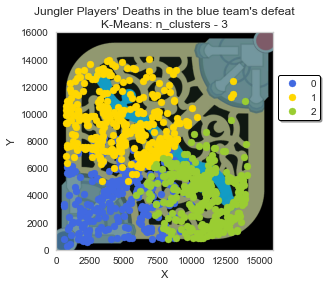

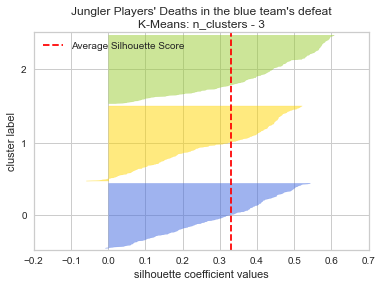

Silhouette score: 0.3288497702004819
1    353
2    322
0    305
Name: cluster, dtype: int64

Inertia: 1135.5891149314039

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5137.655738   4101.986885   0.557377
1        1   4978.563739   9165.609065  -0.390935
2        2  10673.012422   4108.748447  -0.555901

In [462]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [463]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2470.480741   1972.282348   0.496697
1        1   2492.166691   2050.564582   0.647617
2        2   1826.852076   1819.349562   0.577782

In [464]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           10222.0             557.0            8219.0   
1        1           13037.0             756.0           14022.0   
2        2           14053.0            5908.0           10980.0   

   min coordinate_y  max timestamp  min timestamp  
0             294.0              1              0  
1            5066.0              1             -1  
2             807.0              1             -1

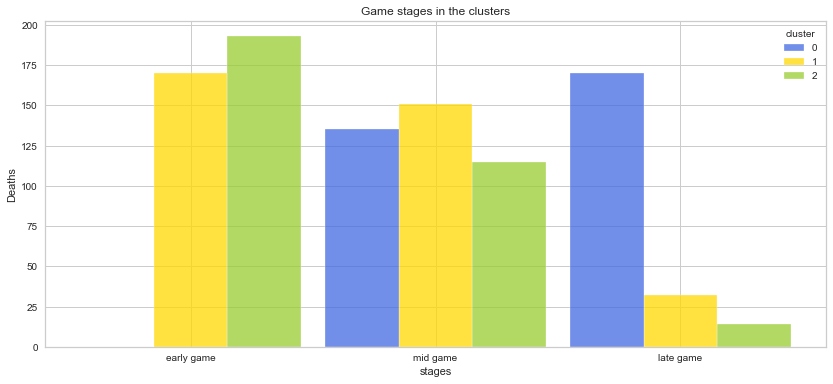

In [465]:
stagesPerClusterV2(blueSideDefeat_df, colors)

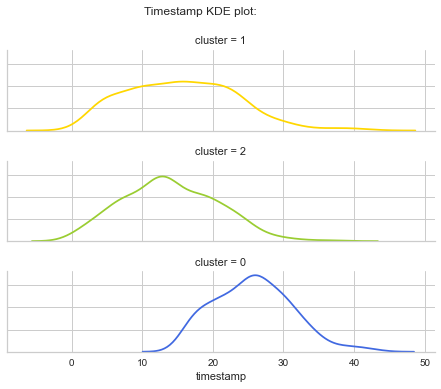

In [466]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [467]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



matches
Udyr             21
Sejuani          19
Belveth          14
Maokai           12
JarvanIV          9
Sylas             8
Viego             5
MonkeyKing        5
Hecarim           3
Kayn              3
Amumu             2
Ekko              2
LeeSin            2
XinZhao           2
Nunu              2
Diana             1
Warwick           1
Evelynn           1
Nautilus          1
Nidalee           1
Kassadin          1
Vi                1
Taliyah           1
Rengar            1
RekSai            1
DrMundo           1
Gragas            1
Nocturne          1
Kaisa             1
Poppy             1
Khazix            1

Deaths with each champion:

In [468]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Udyr          202
Sejuani       138
Belveth        94
Sylas          81
Maokai         75
JarvanIV       66
Viego          38
MonkeyKing     32
LeeSin         26
Hecarim        26
Kayn           25
XinZhao        19
Nunu           19
Amumu          17
Warwick        15
Ekko           10
Nautilus       10
Nidalee        10
Taliyah         9
Kaisa           9
Rengar          8
Evelynn         8
Vi              7
RekSai          6
Gragas          6
Khazix          5
Diana           4
DrMundo         4
Nocturne        4
Poppy           4
Kassadin        3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [469]:
print("Amateur players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

Amateur players played 31 champions when they won on the red side

Cluster 0 - died with 28 champions:
 ['Amumu' 'Belveth' 'Ekko' 'Evelynn' 'Gragas' 'Hecarim' 'JarvanIV' 'Kaisa'
 'Kayn' 'Khazix' 'LeeSin' 'Maokai' 'MonkeyKing' 'Nautilus' 'Nidalee'
 'Nocturne' 'Nunu' 'Poppy' 'RekSai' 'Rengar' 'Sejuani' 'Sylas' 'Taliyah'
 'Udyr' 'Vi' 'Viego' 'Warwick' 'XinZhao']
Sejuani       55
Udyr          55
Belveth       29
Maokai        25
JarvanIV      21
Sylas         20
Viego         13
MonkeyKing    11
Kayn          10
XinZhao       10
LeeSin         8
Amumu          6
Warwick        5
Hecarim        5
Nunu           5
Ekko           4
Kaisa          4
Gragas         3
Rengar         3
Nidalee        2
Vi             2
Taliyah        2
Poppy          2
Nautilus       1
Evelynn        1
Nocturne       1
RekSai         1
Khazix         1
Name: champion, dtype: int64

Cluster 1 - died with 30 champions:
 ['Amumu' 'Belveth' 'Diana' 'Ekko' 'Evelynn' 'Gragas' 'Hecarim' 'JarvanIV'
 'Kaisa' 'Kassadin' '

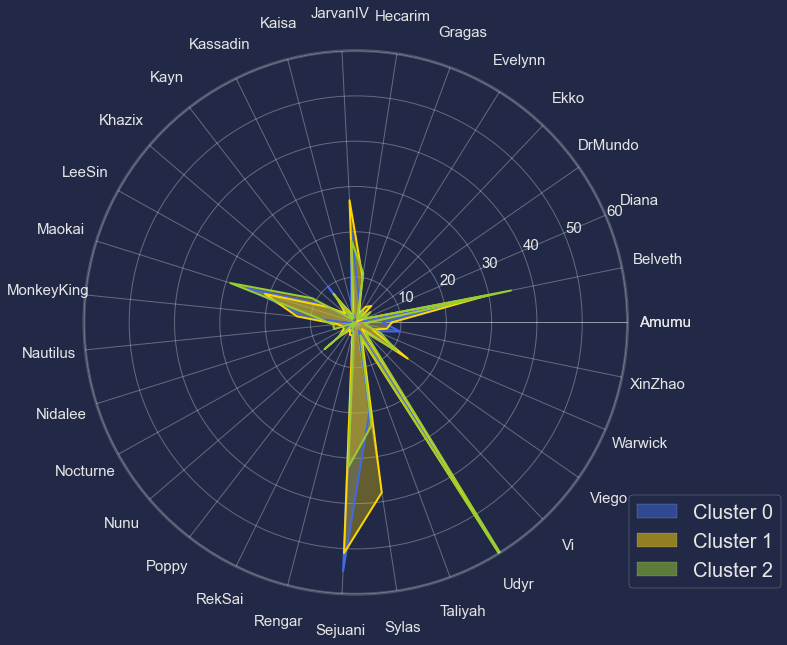

In [470]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---

### Blue Win Rate vs Red Win Rate

In [471]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]

wins_df = jungler_deaths_df[jungler_deaths_df["victory"] == True]
wins_df

gameId  team       summoner region champion  timestamp  \
3060    EUW1_6273443622   Red  anonymous 129   euw1    Elise  10.137967   
3165    EUW1_6273309297   Red  anonymous 129   euw1   Maokai   2.194633   
3167    EUW1_6273309297   Red  anonymous 129   euw1   Maokai   3.906483   
3169    EUW1_6273309297   Red  anonymous 129   euw1   Maokai   4.678950   
3188    EUW1_6273309297   Red  anonymous 129   euw1   Maokai  13.063800   
...                 ...   ...            ...    ...      ...        ...   
642404  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  16.234150   
642412  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  19.922367   
642417  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  21.353700   
642426  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  23.927567   
642948  EUW1_6289397856   Red  anonymous 172   euw1     Ekko  11.346367   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
3060          8142.0        6348.0    NaN            NaN  ...   
3165          7580.0       11652.0    NaN            NaN  ...   
3167          1263.0        9658.0    NaN            NaN  ...   
3169         10423.0        7698.0    NaN            NaN  ...   
3188          7051.0        7059.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642404        1901.0       12644.0    NaN            NaN  ...   
642412       12026.0       10604.0    NaN            NaN  ...   
642417        7798.0       11952.0    NaN            NaN  ...   
642426       13506.0       13848.0    NaN            NaN  ...   
642948        5424.0       10756.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
3060                NaN     True      Death        NaN           NaN   NaN   
3165                NaN     True      Death        NaN           NaN   NaN   
3167                NaN     True      Death        NaN           NaN   NaN   
3169                NaN     True      Death        NaN           NaN   NaN   
3188                NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642404              NaN     True      Death        NaN           NaN   NaN   
642412              NaN     True      Death        NaN           NaN   NaN   
642417              NaN     True      Death        NaN           NaN   NaN   
642426              NaN     True      Death        NaN           NaN   NaN   
642948              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
3060        NaN       NaN  JUNGLE      Gold  
3165        NaN       NaN  JUNGLE      Gold  
3167        NaN       NaN  JUNGLE      Gold  
3169        NaN       NaN  JUNGLE      Gold  
3188        NaN       NaN  JUNGLE      Gold  
...         ...       ...     ...       ...  
642404      NaN       NaN  JUNGLE  Platinum  
642412      NaN       NaN  JUNGLE  Platinum  
642417      NaN       NaN  JUNGLE  Platinum  
642426      NaN       NaN  JUNGLE  Platinum  
642948      NaN       NaN  JUNGLE      Gold  

[4574 rows x 56 columns]

In [472]:
wins = len(np.unique(wins_df["gameId"]))
wins

902

In [473]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 50.886917960088695 vs Blue: 49.11308203991131


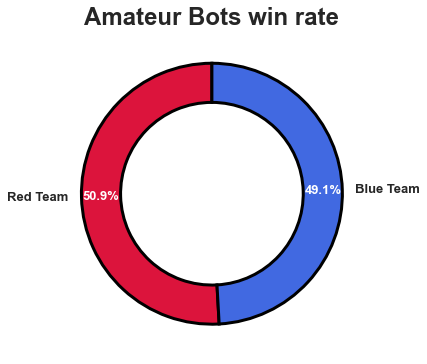

In [474]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(13)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Amateur Bots win rate', fontsize=24, loc='center', fontweight="bold")

plt.show()